In [1]:
# The code was removed by Watson Studio for sharing.

## Scenario - A web content management company is looking for an inexpensive city to be its headquarters location, while attracting top talent by emulating, as closely as possible, the quality of the neighborhoods housing the top-tier companies in the industry.

# Week 5 Battle of the Neighborhoods assignment

## Methodology 

### 1. Analyze Foursquare data from the neighborhoods of the US companies in the top 100 content management companies list.

### 2. Analyze Foursquare neighborhood data from US Cities in the top 10 results filtered from Best Places to Live

### 3. Build a model that locates neighborhoods in the less expensive US cities that most closely match the neighborhoods of the competitors

#### get venues for the US companies in the top100

In [2]:
#!conda install -c conda-forge beautifulsoup4 --yes
#!conda install -c conda-forge lxml --yes
#!conda install -c conda-forge html5lib --yes
#!conda install -c conda-forge requests --yes
#!conda install -c conda-forge folium=0.5.0 --yes 
#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge geocoder --yes
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
#from bs4 import BeautifulSoup
#import matplotlib.cm as cm
#import matplotlib.colors as colors
#from sklearn.cluster import KMeans
#import folium # map rendering library
import random
#from geopy.geocoders import Nominatim
#import geocoder
#from IPython.display import Image 
#from IPython.core.display import HTML 

In [9]:
 
#import geocoder
#from geopy.geocoders import Nominatim
#g = geocoder.geonames("53 State Street, Boston, MA")
#print(g.latlng)



### Unfortunately, automated retrieval of coordinates for top 100 companies and target neighborhoods was hampered by the following
###  - the geopy automation demonstrated in the Toronto exercise was still not working.
### However, the Nominatim function did work for most addresses.   
###  - exceptions: Adobe, Aptera, Facebook, Hortonworks, Lingotek, Revizzit, Taboola, Youappi.  These were manually retireved from Google Maps.
### Timeouts and no-match items hampered automation, so the top 100 were retrieved using the code in the following cell, and manually entered into a spreadsheet
### replicating the backup method from Toronto exercise of using a previously filled csv file.
### Within the top 100 list, Nielsen had the same street address as Sysmos, so only one record for that address was included in the training data.
###  Finally, this  method could only be used for street addresses, not to get coordinates of neighborhoods, so neighborhood names in the candidate cities
###  were manually entered into GoogleMaps and the coordinates copied.
###  For cases where neighborhoods could not be retrieved in this manner, alternate sites such as Trulia were used to locate an address approximately
###  central to the neighborhood, then that address' coordinates were located via GoogleMaps. 

In [128]:
#address = '1525 4th Avenue, Seattle, WA'

#print(address)
#geolocator = Nominatim(user_agent="foursquare_agent")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print(latitude)
#print(longitude)

1525 4th Avenue, Seattle, WA
47.6107426
-122.3375322


### US companies in the top 100 - these will be the positive examples in the training and test sets later

In [3]:
# Fetch the file
my_file = project.get_file("top100companies_US_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
df_top100_lat_lon= pd.read_csv(my_file)

In [4]:
df_top100_lat_lon.head()


rank                   name          street addr1 street addr2        city  \
0     1                 Acquia       53 State Street      10th fl      Boston   
1     2          Acquire Media      3 Becker Farm Rd         #401    Roseland   
2     3         Acroilinx GmbH  2400 District Avenue      Ste 105  Burlington   
3     4  Act-On Software, Inc.   121 SW Morrison St.   Suite 1600    Portland   
4     5                  Adobe       345 Park Avenue          NaN    San Jose   

  state  postal country        lat        long  
0    MA    2109     USA  42.358349  -71.056074  
1    NJ    7068     USA  40.818221  -74.304654  
2    MA    1803     USA  42.485218  -71.210892  
3    OR   97204     USA  45.517930 -122.673907  
4    CA   95110     USA  37.330764 -121.894495

In [5]:
#project.save_data("top100_lat_lon.csv", df_top100.to_csv(), overwrite=True)

### randomly chosen neighborhoods in the same cities as the top 100 - these will be the negative examples in the training and test sets later
### note that currently, the plan is to use SVM, which works well with equal numbers of positive and negative examples

In [3]:
# Fetch the file
my_file = project.get_file("top_not_100companies_US_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
df_not_top100_lat_lon= pd.read_csv(my_file)

In [5]:
df_not_top100_lat_lon

rank               notname                    street addr1 street addr2  \
0     65          not Proquest                Upper Water Hill          NaN   
1     47               not IBM              1 New Orchard Road          NaN   
2     26    not CognitiveScale             9500 Arboretum Blvd          L-1   
3     33               not DNN                401 Congress Ave   Suite 2650   
4     62           not Onespot               3305 Northland Dr    Suite 505   
5      1            not Acquia                 53 State Street      10th fl   
6     18        not Brightcove                 290 Congress St          NaN   
7      3    not Acroilinx GmbH            2400 District Avenue      Ste 105   
8      6            not Akamai                    150 Broadway          NaN   
9     46           not Hubspot                 25 First Street    2nd Floor   
10    95            not Wistia                 17 Tudor Street          NaN   
11    74               not SAS            100 SAS Campus Drive          NaN   
12    22            not Cision            130 East Randolph St       7th Fl   
13     8        not Apple, Inc                 1 Infinite Loop          NaN   
14    43         not Haivision               750 Estate Drive,    Suite 104   
15    30         not Crownpeak                    707 17th St.     Floor 38   
16    67             not Quark                1225 17th Street   Suite 2050   
17    69     not Reprints Desk              15821 Ventura Blvd    Suite 165   
18    10            not Aptara             2901 Telestar Court    Suite 522   
19    93        not welocalize             241 East 4th Street    Suite 207   
20    45      not Hortonworks             8115 Maple Lawn Blvd          NaN   
21    34             not Ebsco                 10 Estes Street          NaN   
22    52          not Lingotek          3400 North Ashton Blvd         #150   
23    38          not e-Spirit              One Cranberry Hill    Suite 300   
24    60           not Netflix           100 Winchester Circle          NaN   
25    94             not widen                6911 Mangrove Ln          NaN   
26    40          not Facebook                    1 Hacker Way          NaN   
27    17        not Bloomreach                  82 Pioneer Way          NaN   
28    42            not Google       1600 Amphitheatre Parkway          NaN   
29    53          not Linkedin             2029 Stierlin Court          NaN   
30    37         not Episerver             542A Amherst Street          NaN   
31     9          not Appnexus                    28 W 23rd St          NaN   
32    15    not Atypon Systems                     330 7th Ave    5th Floor   
33    21             not Ceros                    40 W 25th St     Floor 12   
34    41          not frame.io             45 West 27th Street   10th Floor   
35    48          not Impelsys            116 West 23rd Street    Suite 500   
36    57        not MarketMuse                   205 E 42nd St          NaN   
37    59              not Moat                    28 E 28th St          NaN   
38    61          not Newscred                  386 Park Ave S          NaN   
39    76            not Sizmek                  220 5th Avenue          NaN   
40    78         not smartling                   1375 Broadway   14th Floor   
41    81           not spotify               45 W. 18th Street    7th Floor   
42    82            not sysmos                     85 Broad St      #20-128   
43    83           not taboola          16 Madison Square West       7th fl   
44    84        not talkwalker                   205 E 42nd St          NaN   
45    88      not transperfect                   3 Park Avenue          NaN   
46    91             not Vimeo                   555 W 18th St          NaN   
47    96            not Wochit                    12 E 33rd St          NaN   
48    99          not Youvisit                   115 W 30th St          NaN   
49    14      not Attivio Inc.                275 Grov

In [7]:
#output_LL_DF = pd.DataFrame(columns = ['Company', 'Street', 'City', 'State', 'Latitude', 'Longitude'])
#for index, row in df_top100.iterrows():
#    company = row['name']
#    street = row['street addr1']
#    city = row['city']
#    state = row['state']
#    address = street + ', ' + city + ', ' + state
#    geolocator = Nominatim(user_agent="foursquare_agent")
#    location = geolocator.geocode(address)
#    latitude = location.latitude
#    longitude = location.longitude
#    output_LL_DF = output_LL_DF.append({
#             "Company": company,
#             "Street":  street,
#             "city": city, 
#             "state": state,
#             "Latitude": latitude,
#             "Longitude": longitude
#              }, ignore_index=True)
#output_LL_DF.head()

In [8]:
#address = 'arbor peaks, des moines, IA'

#geolocator = Nominatim(user_agent="foursquare_agent")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print(latitude, longitude)

In [71]:
df_top100_lat_lon

rank                   name                    street addr1 street addr2  \
0      1                 Acquia                 53 State Street      10th fl   
1      2          Acquire Media                3 Becker Farm Rd         #401   
2      3         Acroilinx GmbH            2400 District Avenue      Ste 105   
3      4  Act-On Software, Inc.             121 SW Morrison St.   Suite 1600   
4      5                  Adobe                 345 Park Avenue          NaN   
5      6                 Akamai                    150 Broadway          NaN   
6      7       Amazon.com, inc.                 410 Terry Ave N          NaN   
7      8             Apple, Inc                 1 Infinite Loop          NaN   
8      9               Appnexus                    28 W 23rd St          NaN   
9     10           Aptara, Inc.             2901 Telestar Court    Suite 522   
10    12      Aria Systems, Inc                 100 Pine Street   Suite 2450   
11    14           Attivio Inc.                275 Grove Street          NaN   
12    15   Atypon Systems, Inc.                     330 7th Ave    5th Floor   
13    16       Automattic, Inc.                  60 29th Street         #343   
14    17             Bloomreach                  82 Pioneer Way          NaN   
15    18             Brightcove                 290 Congress St          NaN   
16    19           Buffer, Inc.                    44 Tehama St          NaN   
17    21            Ceros, Inc.                    40 W 25th St     Floor 12   
18    22                 Cision            130 East Randolph St       7th Fl   
19    23            Clarabridge       11400 Commerce Park Drive    Suite 500   
20    24          Cloudera, Inc                395 Page Mill Rd          NaN   
21    25       Cloudwords, Inc.               201 California St   Suite 1350   
22    26         CognitiveScale             9500 Arboretum Blvd          L-1   
23    29       Crafter Software       1800 Alexander Bell Drive    Suite 400   
24    30              Crownpeak                    707 17th St.     Floor 38   
25    31                  csoft           580 California Street   Suite 1330   
26    32                 Curata              92 Montvale Avenue   Suite 2500   
27    33                    DNN                401 Congress Ave   Suite 2650   
28    34                  Ebsco                 10 Estes Street          NaN   
29    36                  Ephox                  2100 Geng Road    Suite 220   
30    37              Episerver             542A Amherst Street          NaN   
31    38               e-Spirit              One Cranberry Hill    Suite 300   
32    39               Evergage                  212 Elm Street    Suite 300   
33    40               Facebook                    1 Hacker Way          NaN   
34    41               frame.io             45 West 27th Street   10th Floor   
35    42                 Google       1600 Amphitheatre Parkway          NaN   
36    43              Haivision               750 Estate Drive,    Suite 104   
37    45           Hortonworks             8115 Maple Lawn Blvd          NaN   
38    46                Hubspot                 25 First Street    2nd Floor   
39    47                    IBM              1 New Orchard Road          NaN   
40    48               Impelsys            116 West 23rd Street    Suite 500   
41    49               Ingeniux                 1601 2nd Avenue   Suite 1010   
42    52               Lingotek          3400 North Ashton Blvd         #150   
43    53               Linkedin             2029 Stierlin Court          NaN   
44    54             Lionbridge              1050 Winter Street   Suite 2300   
45    55             Lucidworks                   717 Market St    Suite 800   
46    57             MarketMuse                   205 E 42nd St          NaN   
47    58              Marklogic                 999 Skyway Road    Suite 200   
48    59                   Moat                    28 E 28th St          NaN   
49  

### Define Foursquare Credentials and Version

In [83]:
CLIENT_ID = 'Redacted' # your Foursquare ID
CLIENT_SECRET = 'redacted' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Redacted
CLIENT_SECRET:redacted


### define the get_category_type function

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### define the get nearby venues function as was done in the New York notebook

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### use the function to make a dataframe of the venues for the top 100

In [13]:
competitor_venues_DF = getNearbyVenues(names=df_top100_lat_lon['name'],
                                   latitudes=df_top100_lat_lon['lat'],
                                   longitudes=df_top100_lat_lon['long']
                                  )

Acquia
Acquire Media
Acroilinx GmbH
Act-On Software, Inc.
Adobe
Akamai
Amazon.com, inc.
Apple, Inc
Appnexus
Aptara, Inc.
Aria Systems, Inc
Attivio Inc.
Atypon Systems, Inc.
Automattic, Inc.
Bloomreach
Brightcove
Buffer, Inc.
Ceros, Inc.
Cision
Clarabridge
Cloudera, Inc
Cloudwords, Inc.
CognitiveScale
Crafter Software
Crownpeak
csoft
Curata
DNN
Ebsco
Ephox
Episerver
e-Spirit
Evergage
Facebook
frame.io
Google
Haivision
Hortonworks 
Hubspot
IBM
Impelsys
Ingeniux
Lingotek
Linkedin
Lionbridge
Lucidworks
MarketMuse
Marklogic
Moat
Netflix
Newscred
Onespot
Oracle
Perfect Sense
Proquest
Quark
Reprints Desk
Revizzit
Salesforce
SAS
Sizmek
Skimlinks
smartling
snap
spotify
sysmos
taboola
talkwalker
techsmith
transperfect
twitter
viglink
Vimeo
webtrends
welocalize
widen
Wistia
Wochit
Youappi
Youvisit
Zumobi


In [18]:
#competitor_venues_DF


In [16]:
competitor_venues_DF.size


32627

#### saving the venue data as a csv so that it doesn't need to be recreated each time

In [17]:
project.save_data("top100_with_venues.csv", competitor_venues_DF.to_csv(), overwrite=True)

{'asset_id': '289ff873-7afc-4378-ac89-fb62be4dc37c',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'top100_with_venues.csv',
 'message': 'File saved to project storage.'}

### and repeat for the NOT top 100 - the negative examples

In [10]:
not_competitor_venues_DF = getNearbyVenues(names=df_not_top100_lat_lon['notname'],
                                   latitudes=df_not_top100_lat_lon['lat'],
                                   longitudes=df_not_top100_lat_lon['long']
                                  )

not Proquest
not IBM
not CognitiveScale
not DNN
not Onespot
not Acquia
not Brightcove
not Acroilinx GmbH
not Akamai
not Hubspot
not Wistia
not SAS
not Cision
not Apple, Inc
not Haivision
not Crownpeak
not Quark
not Reprints Desk
not Aptara
not welocalize
not Hortonworks 
not Ebsco
not Lingotek
not e-Spirit
not Netflix
not widen
not Facebook
not Bloomreach
not Google
not Linkedin
not Episerver
not Appnexus
not Atypon Systems
not Ceros
not frame.io
not Impelsys
not MarketMuse
not Moat
not Newscred
not Sizmek
not smartling
not spotify
not sysmos
not taboola
not talkwalker
not transperfect
not Vimeo
not Wochit
not Youvisit
not Attivio Inc.
not techsmith
not Cloudera
not Ephox
not Revizzit
not Act-On Software
not webtrends
not Oracle
not Clarabridge
not Crafter Software
not Perfect Sense
not Acquire Media
not Marklogic
not Aria Systems
not Automattic
not Buffer
not Cloudwords
not csoft
not Lucidworks
not Salesforce
not Skimlinks
not twitter
not viglink
not Youappi
not Adobe
not snap
not Ama

### and save the result

In [11]:
project.save_data("not_top100_with_venues.csv", not_competitor_venues_DF.to_csv(), overwrite=True)

{'asset_id': '71f711b5-2e4d-46f3-9008-91977984de2a',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'not_top100_with_venues.csv',
 'message': 'File saved to project storage.'}

In [12]:
not_competitor_venues_DF.size

22484

## Get venues for each of the top 10 cities

### Criteria for top 10 cities 
### - Population < 1,000,000
### - Average Rent < 1000.00.
### - Median Home Price < 390,000.00
### - Commute Time < 20 Minutes
### Top 10
### 1. Wichita KS
### 2. Des Moines IA
### 3. Madison WI
### 4. Boise ID
### 5. Omaha NE
### 6. Greenville SC
### 7. Lancaster PA
### 8. Albany NY
### 9. Fort Myers FL
### 10. Winston Salem NC
### note that only Wichita matched all criteria.  the other 9 cities matched on all but commute time
### for this reason, neighborhood data and coordinates for a "runner-up" city (the 11th on the list), Harrisburg PA, were collected.  To be used if Wichita proves to have too little Foursquare data
### One other thing to bear in mind later is that Madison, WI is home to one of the competitor companies.  It will be interesting to see how this affects the resulting recommendations.

### 1. Wichita, KS

In [39]:
# Fetch the file
my_file = project.get_file("Wichita_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_wichita_neighborhoods_lat_lon= pd.read_csv(my_file)
df_wichita_neighborhoods_lat_lon.head()

city state     neighborhood        lat       long
0  Wichita    KS  A Price Woodard  37.685237 -97.344734
1  Wichita    KS     Auburn Hills  37.667428 -97.506026
2  Wichita    KS   Benjamin Hills  37.728852 -97.378706
3  Wichita    KS      Brookhollow  37.690209 -97.243221
4  Wichita    KS     College Hill  37.686504 -97.298545

In [40]:
Wichita_venues_DF = getNearbyVenues(names=df_wichita_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_wichita_neighborhoods_lat_lon['lat'],
                                   longitudes=df_wichita_neighborhoods_lat_lon['long']
                                  )

A Price Woodard
Auburn Hills
Benjamin Hills
Brookhollow
College Hill
Cottonwood Village
Country Overlook
Courtland
Crestview Heights
Crown Heights North
Crown Heights South
Delano
Delano Township
Downtown
East Front
East Mt. Vernon
Eastridge
El Pueblo
The Elm
Fabrique
Fairmount
Forest Hills
Fox Ridge
Grandview Heights
Hilltop
The Hyde
Indian Hills
Indian Hills Riverbend
Ken-Mar
K-15
La Placita Park
Lambsdale
Linwood
Longview
MacDonald
Matlock Heights
McAdams
McCormick
Mead
Meadowlark
Midtown
Murdock
New Salem
North Riverside
Northeast Heights
Northeast Millair
Northwest Big River
Oakview
Orchard Breeze
Orchard Park
Park Meadows
Planeview United
Power
Riverside
Riverview
Rockhurst
Schweiter
Schweiter East
Sherwood Glen
Sleepy Hollow
South Area
South Central
South City
South Seneca
Southwest Wichita
Southwest Village
Stanley/Aley
Sunflower
Sunnybrook
Sunnyside
Uptown
Westlink


In [43]:
Wichita_venues_DF.size


3143

#### save the Wichita Venues to a csv

In [44]:
project.save_data("Wichita_venues.csv", Wichita_venues_DF.to_csv(), overwrite=True)

{'asset_id': 'b0544277-4337-4e51-b8cb-03e1aff7035c',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Wichita_venues.csv',
 'message': 'File saved to project storage.'}

### 2. Des Moines, IA

In [27]:
# Fetch the file
my_file = project.get_file("Des_Moines_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_des_moines_neighborhoods_lat_lon= pd.read_csv(my_file)
df_des_moines_neighborhoods_lat_lon

city state                neighborhood        lat       long
0   Des Moines    IA                      Accent  41.606384 -93.574942
1   Des Moines    IA                  Beaverdale  41.616638 -93.680696
2   Des Moines    IA            Bloomfield-Allen  41.533394 -93.588118
3   Des Moines    IA                Capitol East  41.593539 -93.599243
4   Des Moines    IA                Capitol Park  41.601276 -93.611955
5   Des Moines    IA          Capitol View South  41.581539 -93.610605
6   Des Moines    IA                   Carpenter  41.602039 -93.648912
7   Des Moines    IA             Chautauqua Park  41.613089 -93.637612
8   Des Moines    IA                Cheatom Park  41.597136 -93.634265
9   Des Moines    IA               Douglas Acres  41.634036 -93.568017
10  Des Moines    IA         Downtown Des Moines  41.581582 -93.636582
11  Des Moines    IA                       Drake  41.602913 -93.657492
12  Des Moines    IA                  Drake Park  41.597539 -93.648912
13  Des Moines    IA                East Village  41.590539 -93.611705
14  Des Moines    IA                  Fairground  41.599553 -93.557354
15  Des Moines    IA               Fairmont Park  41.615238 -93.573642
16  Des Moines    IA                Frisbie Park  41.572788 -93.704208
17  Des Moines    IA                 Garton West  41.618589 -93.583254
18  Des Moines    IA                Gray's Woods  41.607839 -93.548211
19  Des Moines    IA          Greater South Side  41.554040 -93.668997
20  Des Moines    IA                   Greenwood  41.578532 -93.668847
21  Des Moines    IA               Highland Park  41.631023 -93.626354
22  Des Moines    IA             Indianola Hills  41.564439 -93.620093
23  Des Moines    IA              Ingersoll Park  41.588039 -93.682457
24  Des Moines    IA                 Jordan Park  41.531899 -93.606501
25  Des Moines    IA               Kirkwood Glen  41.607545 -93.653656
26  Des Moines    IA                 Laurel Hill  41.583939 -93.557691
27  Des Moines    IA              Linden Heights  41.574239 -93.682907
28  Des Moines    IA                Lower Beaver  41.636838 -93.669096
29  Des Moines    IA               Magnolia Park  41.544489 -93.615655
30  Des Moines    IA  Martin Luther King Jr Park  41.601789 -93.596054
31  Des Moines    IA             McKinley School  41.574189 -93.613505
32  Des Moines    IA                    Meredith  41.638734 -93.696842
33  Des Moines    IA                   Merle Hay  41.618437 -93.713423
34  Des Moines    IA        Mondamin Presidentia  41.610239 -93.644706
35  Des Moines    IA                  New Vision  41.598139 -93.633506
36  Des Moines    IA              North Of Grand  41.588739 -93.671257
37  Des Moines    IA                    Oak Park  41.626986 -93.643494
38  Des Moines    IA                  River Bend  41.608874 -93.632986
39  Des Moines    IA              Salisbury Oaks  41.576989 -93.680837
40  Des Moines    IA                Sherman Hill  41.590789 -93.645356
41  Des Moines    IA                    Somerset  41.523389 -93.611975
42  Des Moines    IA                  South Park  41.547939 -93.610481
43  Des Moines    IA          Southwestern Hills  41.547338 -93.691621
44  Des Moines    IA                  Union Park  41.614588 -93.614643
45  Des Moines    IA           Valley High Manor  41.595239 -93.539153
46  Des Moines    IA                   Waterbury  41.587739 -93.704362
47  Des Moines    IA               Waveland Park  41.601189 -93.692896
48  Des Moines    IA              Waveland Woods  41.596439 -93.703208
49  Des Moines    IA                    Westwood  41.577739 -93.699145
50  Des Moines    IA            Woodland Heights  41.590639 -93.655907

In [45]:
Des_Moines_venues_DF = getNearbyVenues(names=df_des_moines_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_des_moines_neighborhoods_lat_lon['lat'],
                                   longitudes=df_des_moines_neighborhoods_lat_lon['long']
                                  )
Des_Moines_venues_DF.head()

Accent
Beaverdale
Bloomfield-Allen
Capitol East
Capitol Park
Capitol View South
Carpenter
Chautauqua Park
Cheatom Park
Douglas Acres
Downtown Des Moines
Drake
Drake Park
East Village
Fairground
Fairmont Park
Frisbie Park
Garton West
Gray's Woods
Greater South Side
Greenwood
Highland Park
Indianola Hills
Ingersoll Park
Jordan Park
Kirkwood Glen
Laurel Hill
Linden Heights
Lower Beaver
Magnolia Park
Martin Luther King Jr Park
McKinley School
Meredith
Merle Hay
Mondamin Presidentia
New Vision
North Of Grand
Oak Park
River Bend
Salisbury Oaks
Sherman Hill
Somerset
South Park
Southwestern Hills
Union Park
Valley High Manor
Waterbury
Waveland Park
Waveland Woods
Westwood
Woodland Heights


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       Accent              41.606384              -93.574942   
1       Accent              41.606384              -93.574942   
2       Accent              41.606384              -93.574942   
3       Accent              41.606384              -93.574942   
4       Accent              41.606384              -93.574942   

                       Venue  Venue Latitude  Venue Longitude  \
0  big al's bbq and catering       41.602454       -93.575736   
1      Hy-Vee Wine & Spirits       41.604571       -93.574035   
2                Cheap Seats       41.603763       -93.574191   
3                   QuikTrip       41.606268       -93.572663   
4     Caseys Bait and Tackle       41.605228       -93.576793   

        Venue Category  
0            BBQ Joint  
1         Liquor Store  
2           Sports Bar  
3    Convenience Store  
4  Sporting Goods Shop

In [47]:
Des_Moines_venues_DF.size

2828

In [48]:
project.save_data("Des_Moines_venues.csv", Des_Moines_venues_DF.to_csv(), overwrite=True)

{'asset_id': '4c54c754-e533-4ee4-af84-c889054cd92b',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Des_Moines_venues.csv',
 'message': 'File saved to project storage.'}

### combining the Foursquare and file save steps for the remaining cities

### 3. Madison, WI

In [28]:
# Fetch the file
my_file = project.get_file("Madison_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_madison_neighborhoods_lat_lon= pd.read_csv(my_file)
df_madison_neighborhoods_lat_lon

city state                      neighborhood        lat       long
0   Madison    WI                  Allied Community  43.028284 -89.462874
1   Madison    WI                       Arbor Hills  43.029302 -89.431991
2   Madison    WI                         Bay Creek  43.054092 -89.395413
3   Madison    WI                           Bayview  43.066802 -89.399994
4   Madison    WI                      Berkley Oaks  43.129748 -89.364740
5   Madison    WI                         Blackhawk  43.080013 -89.451831
6   Madison    WI                   Bram's Addition  43.045501 -89.395984
7   Madison    WI                 Brentwood Village  43.122567 -89.373070
8   Madison    WI                Broadway-Lakepoint  43.045612 -89.345910
9   Madison    WI                     Burke Heights  43.110132 -89.313356
10  Madison    WI                         Burr Oaks  43.040445 -89.401154
11  Madison    WI                           Capitol  43.074695 -89.386364
12  Madison    WI              Capitol View Heights  43.043349 -89.387997
13  Madison    WI                Carpenter-Ridgeway  43.110147 -89.340140
14  Madison    WI                   Cherokee Garden  43.153929 -89.378003
15  Madison    WI                     Cherokee Park  43.150857 -89.380199
16  Madison    WI                     Country Grove  43.012023 -89.515345
17  Madison    WI                    Dudgeon-Monroe  43.059568 -89.436731
18  Madison    WI                      Dunn's Marsh  43.032330 -89.455243
19  Madison    WI                        East Bluff  43.132189 -89.367259
20  Madison    WI                      East Buckeye  43.073578 -89.283939
21  Madison    WI                       Eastmorland  43.096245 -89.322524
22  Madison    WI                         Eken Park  43.107683 -89.355552
23  Madison    WI                          Elvehjem  43.078734 -89.294206
24  Madison    WI                      Emerson East  43.099516 -89.364440
25  Madison    WI                         Faircrest  43.061303 -89.488973
26  Madison    WI                     Glacier Ridge  43.009299 -89.519096
27  Madison    WI                    Glen Oak Hills  43.071041 -89.477303
28  Madison    WI                          Glendale  43.054917 -89.314180
29  Madison    WI                         Greenbush  43.062153 -89.408788
30  Madison    WI                         Greentree  43.042437 -89.494451
31  Madison    WI                    Hawk's Landing  43.036744 -89.556695
32  Madison    WI                          Heistand  43.099767 -89.311096
33  Madison    WI                  Heritage Heights  43.088029 -89.297899
34  Madison    WI                     High Crossing  43.137948 -89.292409
35  Madison    WI                High Point Estates  43.045610 -89.515017
36  Madison    WI                    Highland Manor  43.031108 -89.360207
37  Madison    WI             Hill Farms-University  43.066977 -89.467020
38  Madison    WI                    Indian Springs  43.028416 -89.377336
39  Madison    WI                    Junction Ridge  43.062786 -89.528508
40  Madison    WI                   Kennedy Heights  43.139901 -89.387066
41  Madison    WI                         Lake Edge  43.079917 -89.323059
42  Madison    WI                    Lake View Hill  43.137304 -89.377047
43  Madison    WI                           Leopold  43.026461 -89.423277
44  Madison    WI                      Lerdahl Park  43.134048 -89.391351
45  Madison    WI                        Maple Wood  43.113202 -89.367039
46  Madison    WI                     Maple-Prairie  43.018218 -89.494810
47  Madison    WI                          Marbella  43.060871 -89.492821
48  Madison    WI                         Marquette  43.087407 -89.370963
49  Madison    WI                      Mayfair Park  43.114367 -89.317031
50  Madison    WI                    McClellan Park  43.088476 -89.272374
51  Madison    WI                         Meadowood  43.032316 -89.489973
52  Madison    WI                     Mendota Hills  43.131947 -89.380860
53  Madison

In [49]:
Madison_venues_DF = getNearbyVenues(names=df_madison_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_madison_neighborhoods_lat_lon['lat'],
                                   longitudes=df_madison_neighborhoods_lat_lon['long']
                                  )

project.save_data("Madison_venues.csv", Madison_venues_DF.to_csv(), overwrite=True)

Allied Community
Arbor Hills
Bay Creek
Bayview
Berkley Oaks
Blackhawk
Bram's Addition
Brentwood Village
Broadway-Lakepoint
Burke Heights
Burr Oaks
Capitol
Capitol View Heights
Carpenter-Ridgeway
Cherokee Garden
Cherokee Park
Country Grove
Dudgeon-Monroe
Dunn's Marsh
East Bluff
East Buckeye
Eastmorland
Eken Park
Elvehjem
Emerson East
Faircrest
Glacier Ridge
Glen Oak Hills
Glendale
Greenbush
Greentree
Hawk's Landing
Heistand
Heritage Heights
High Crossing
High Point Estates
Highland Manor
Hill Farms-University
Indian Springs
Junction Ridge
Kennedy Heights
Lake Edge
Lake View Hill
Leopold
Lerdahl Park
Maple Wood
Maple-Prairie
Marbella
Marquette
Mayfair Park
McClellan Park
Meadowood
Mendota Hills
Midvale Heights Community
Millstone
Moorland-Rimrock
Nakoma
Newberry Heights
Nobel Park
Norman Acres
North Lake Mendota
Oakbridge
Oakwood Village
Old Middleton Greenway
Orchard Ridge
Park Ridge
Parkwood Hills
Radio Park
Reston Heights
Ridgewood
Rolling Meadows
Sauk Creek
Schenk-Atwood
Schenk-Atwoo

{'asset_id': 'e0e45d07-a1ae-46cf-b982-11f877f44bcb',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Madison_venues.csv',
 'message': 'File saved to project storage.'}

In [51]:
Madison_venues_DF.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Allied Community              43.028284              -89.462874   
1  Allied Community              43.028284              -89.462874   
2  Allied Community              43.028284              -89.462874   
3  Allied Community              43.028284              -89.462874   
4  Allied Community              43.028284              -89.462874   

                              Venue  Venue Latitude  Venue Longitude  \
0        Arthur Murray Dance Studio       43.025286       -89.463481   
1  Bennett's Meadowood Country Club       43.031971       -89.460413   
2                          Speedway       43.031054       -89.461933   
3              Kehl School Of Dance       43.026392       -89.465942   
4                         Floor 360       43.026106       -89.466045   

           Venue Category  
0   General Entertainment  
1                Dive Bar  
2             Gas Station  
3            Dance Studio  
4  Furniture / Home Store

### 4. Boise, ID

In [29]:
# Fetch the file
my_file = project.get_file("Boise_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_boise_neighborhoods_lat_lon= pd.read_csv(my_file)
df_boise_neighborhoods_lat_lon

city state          neighborhood        lat        long
0   Boise    ID         Boise Heights  43.632093 -116.189733
1   Boise    ID         Central Bench  43.596965 -116.252057
2   Boise    ID           Central Rim  43.614989 -116.239790
3   Boise    ID             Collister  43.672981 -116.258606
4   Boise    ID           Depot Bench  43.600561 -116.226456
5   Boise    ID              Downtown  43.614140 -116.215524
6   Boise    ID              East End  43.603471 -116.187607
7   Boise    ID     Franklin Randolph  43.592447 -116.278901
8   Boise    ID          Harris Ranch  43.581481 -116.145076
9   Boise    ID         Harrison Blvd  43.632863 -116.210564
10  Boise    ID             Highlands  43.645999 -116.202484
11  Boise    ID             Hillcrest  43.580864 -116.246946
12  Boise    ID  Maple Grove-Franklin  43.601153 -116.304633
13  Boise    ID           Morris Hill  43.611089 -116.252207
14  Boise    ID             North End  43.633167 -116.224011
15  Boise    ID             Northwest  43.600785 -116.303938
16  Boise    ID               Pioneer  43.586918 -116.283491
17  Boise    ID           Quail Ridge  43.662725 -116.241517
18  Boise    ID        Riverland East  43.553497 -116.123432
19  Boise    ID   South Boise Village  43.586750 -116.208499
20  Boise    ID       Southeast Boise  43.574665 -116.191782
21  Boise    ID         Southwest Ada  43.562077 -116.342456
22  Boise    ID         Stewart Gulch  43.676612 -116.224899
23  Boise    ID           Sunrise Rim  43.571990 -116.213742
24  Boise    ID                Sunset  43.643589 -116.236757
25  Boise    ID         Veterans Park  43.635711 -116.255298
26  Boise    ID                 Vista  43.605832 -116.216297
27  Boise    ID  Warm Springs Estates  43.598653 -116.168868
28  Boise    ID     Warm Springs Mesa  43.585956 -116.159174
29  Boise    ID            West Bench  43.636869 -116.293564
30  Boise    ID       West Cloverdale  43.639432 -116.343591
31  Boise    ID           West Valley  43.641126 -116.331683
32  Boise    ID         Winstead Park  43.626397 -116.264325

In [52]:
Boise_venues_DF = getNearbyVenues(names=df_boise_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_boise_neighborhoods_lat_lon['lat'],
                                   longitudes=df_boise_neighborhoods_lat_lon['long']
                                  )

project.save_data("Boise_venues.csv", Boise_venues_DF.to_csv(), overwrite=True)

Boise Heights
Central Bench
Central Rim
Collister
Depot Bench
Downtown
East End
Franklin Randolph
Harris Ranch
Harrison Blvd
Highlands
Hillcrest
Maple Grove-Franklin
Morris Hill
North End
Northwest
Pioneer
Quail Ridge
Riverland East
South Boise Village
Southeast Boise
Southwest Ada
Stewart Gulch
Sunrise Rim
Sunset
Veterans Park
Vista
Warm Springs Estates
Warm Springs Mesa
West Bench
West Cloverdale
West Valley
Winstead Park


{'asset_id': '08405084-8b1e-47a8-81b6-448d1e53f845',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Boise_venues.csv',
 'message': 'File saved to project storage.'}

In [53]:
Boise_venues_DF.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Central Bench              43.596965             -116.252057   
1  Central Bench              43.596965             -116.252057   
2    Central Rim              43.614989             -116.239790   
3    Central Rim              43.614989             -116.239790   
4    Central Rim              43.614989             -116.239790   

                Venue  Venue Latitude  Venue Longitude      Venue Category  
0  Idaho PC Solutions       43.599694      -116.254020         IT Services  
1         Inner Moods       43.600667      -116.253013                 Spa  
2         Golden Star       43.614874      -116.242796  Chinese Restaurant  
3    Chiang Mai House       43.612337      -116.242711     Thai Restaurant  
4      Bosnia Express       43.612160      -116.241703      Sandwich Place

In [54]:
Boise_venues_DF.size

1316

### 5. Omaha, NE

In [30]:
# Fetch the file
my_file = project.get_file("Omaha_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_omaha_neighborhoods_lat_lon= pd.read_csv(my_file)
df_omaha_neighborhoods_lat_lon

city state                                neighborhood        lat  \
0   Omaha    NE                       Aksarben/Elmwood Park  41.245148   
1   Omaha    NE                            Aksarben Village  41.238056   
2   Omaha    NE                                   Applewood  41.194409   
3   Omaha    NE                                 Baker Place  41.301249   
4   Omaha    NE                                  Bemis Park  41.270096   
5   Omaha    NE                                  Bennington  41.327942   
6   Omaha    NE                                      Benson  41.281638   
7   Omaha    NE                                  Bent Creek  41.270755   
8   Omaha    NE                                     Midtown  41.255096   
9   Omaha    NE                                   Boys Town  41.256501   
10  Omaha    NE                                 Briar Hills  41.270560   
11  Omaha    NE                                  Bridlewood  41.299581   
12  Omaha    NE                                  Brookhaven  41.194606   
13  Omaha    NE                             Burlington Road  41.217910   
14  Omaha    NE                              Burnt District  41.263718   
15  Omaha    NE                                 Carter Lake  41.295775   
16  Omaha    NE                                      Chalco  41.121237   
17  Omaha    NE                             Conestoga Place  41.276105   
18  Omaha    NE                                Country Club  41.329939   
19  Omaha    NE                                     Dahlman  41.242973   
20  Omaha    NE                                   Deer Park  41.226551   
21  Omaha    NE                                      Dundee  41.262339   
22  Omaha    NE                                     Elkhorn  41.270684   
23  Omaha    NE                                Elmwood Park  41.245148   
24  Omaha    NE                                   Fairacres  41.262357   
25  Omaha    NE                                    Florence  41.337485   
26  Omaha    NE                                  Field Club  41.245242   
27  Omaha    NE                First National Business Park  41.266568   
28  Omaha    NE                                Gifford Park  41.263943   
29  Omaha    NE                                Hanscom Park  41.233045   
30  Omaha    NE                                Hillsborough  41.299317   
31  Omaha    NE                             Huntington Park  41.280116   
32  Omaha    NE                                   Irvington  41.321108   
33  Omaha    NE                                    Keystone  41.295792   
34  Omaha    NE                               Kountze Place  41.295775   
35  Omaha    NE                                    La Vista  41.177803   
36  Omaha    NE                                 Leavenworth  41.253622   
37  Omaha    NE                              Little Bohemia  41.244759   
38  Omaha    NE                                Little Italy  41.245482   
39  Omaha    NE                               Maple Village  41.291813   
40  Omaha    NE                               Meridian Park  41.170629   
41  Omaha    NE                            Midtown Crossing  41.258219   
42  Omaha    NE                                     Millard  41.206338   
43  Omaha    NE                                 Miller Park  41.312943   
44  Omaha    NE                              Morton Meadows  41.246879   
45  Omaha    NE                         Mockingbird Heights  41.208509   
46  Omaha    NE                             Near North Side  41.312088   
47  Omaha    NE                                 Oak Heights  41.200516   
48  Omaha    NE                Old Market Historic District  41.255990   
49  Omaha    NE                                  Omaha View  41.283074   
50  Omaha    NE                                Orchard Hill  41.275120   
51  Omaha    NE                                   Papillion  41.153583   
52  Omaha    NE                                 Park Avenue  41.248793   
53  Omaha

In [56]:
Omaha_venues_DF = getNearbyVenues(names=df_omaha_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_omaha_neighborhoods_lat_lon['lat'],
                                   longitudes=df_omaha_neighborhoods_lat_lon['long']
                                  )

project.save_data("Omaha_venues.csv", Omaha_venues_DF.to_csv(), overwrite=True)

Aksarben/Elmwood Park
Aksarben Village
Applewood
Baker Place
Bemis Park
Bennington
Benson
Bent Creek
Midtown
Boys Town
Briar Hills
Bridlewood
Brookhaven
Burlington Road
Burnt District
Carter Lake
Chalco
Conestoga Place
Country Club
Dahlman
Deer Park
Dundee
Elkhorn
Elmwood Park
Fairacres
Florence
Field Club
First National Business Park
Gifford Park
Hanscom Park
Hillsborough
Huntington Park
Irvington
Keystone
Kountze Place
La Vista
Leavenworth
Little Bohemia
Little Italy
Maple Village
Meridian Park
Midtown Crossing
Millard
Miller Park
Morton Meadows
Mockingbird Heights
Near North Side
Oak Heights
Old Market Historic District
Omaha View
Orchard Hill
Papillion
Park Avenue
Park East
Prospect Hill
Ralston
Raven Oaks
Roanoke
Robin Hill
Royalwood Estates
Regency
Roxbury
Saratoga
South Omaha
Sporting District
Spring Lake
Sunny Slope
Trendwood
Valley
Vinton Street Commercial Historic District
Walnut Hill
Waterloo
West Farnam neighborhood
Westgate
Westside


{'asset_id': '1345cb9f-c2b5-4ca2-bc2d-5d065754089e',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Omaha_venues.csv',
 'message': 'File saved to project storage.'}

In [57]:
Omaha_venues_DF.size

4291

### 6. Greenville, SC

In [58]:
# Fetch the file
my_file = project.get_file("Greenville_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_greenville_neighborhoods_lat_lon= pd.read_csv(my_file)
df_greenville_neighborhoods_lat_lon

city state           neighborhood        lat       long
0   Greenville    SC        West Greenville  34.847513 -82.425435
1   Greenville    SC       Cherrydale Point  34.889004 -82.405163
2   Greenville    SC         Travelers Rest  34.966994 -82.460282
3   Greenville    SC               Downtown  34.848491 -82.402206
4   Greenville    SC           Augusta Road  34.648814 -82.390251
5   Greenville    SC           Haywood Road  34.851161 -82.338820
6   Greenville    SC    Roper Mountain Road  34.846143 -82.306594
7   Greenville    SC            Pelham Road  34.859842 -82.295276
8   Greenville    SC          Woodruff Road  34.836391 -82.320409
9   Greenville    SC           Simpsonville  34.738227 -82.287751
10  Greenville    SC  Greenline-Spartanburg  34.860135 -82.384229
11  Greenville    SC           Viola Street  34.859690 -82.402672
12  Greenville    SC          Arcadia Hills  34.851647 -82.374555
13  Greenville    SC         Haynie-Sirrine  34.836652 -82.403737
14  Greenville    SC           Green Avenue  34.837425 -82.415551
15  Greenville    SC            Payne-Logan  34.844349 -82.413039
16  Greenville    SC             Nicholtown  34.840395 -82.379987
17  Greenville    SC        Pleasant Valley  34.804895 -82.394303
18  Greenville    SC           Southernside  34.855981 -82.421854
19  Greenville    SC             Park Place  34.869561 -82.417488
20  Greenville    SC              Overbrook  34.859839 -82.386653
21  Greenville    SC       Greater Sullivan  34.832686 -82.412910
22  Greenville    SC                Welcome  34.817240 -82.478092
23  Greenville    SC                 Judson  34.831533 -82.434603
24  Greenville    SC                 Dunean  34.817331 -82.439854
25  Greenville    SC             Brutontown  34.874007 -82.402688
26  Greenville    SC             Sans Souci  34.890635 -82.442097
27  Greenville    SC              City View  34.863113 -82.429318

In [59]:
Greenville_venues_DF = getNearbyVenues(names=df_greenville_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_greenville_neighborhoods_lat_lon['lat'],
                                   longitudes=df_greenville_neighborhoods_lat_lon['long']
                                  )

project.save_data("Greenville_venues.csv", Greenville_venues_DF.to_csv(), overwrite=True)

West Greenville
Cherrydale Point
Travelers Rest
Downtown
Augusta Road
Haywood Road
Roper Mountain Road
Pelham Road
Woodruff Road
Simpsonville
Greenline-Spartanburg
Viola Street
Arcadia Hills
Haynie-Sirrine
Green Avenue
Payne-Logan
Nicholtown
Pleasant Valley
Southernside
Park Place
Overbrook
Greater Sullivan
Welcome
Judson
Dunean
Brutontown
Sans Souci
City View


{'asset_id': '2d9f4a2d-4c1f-4543-a77e-ffe976109737',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Greenville_venues.csv',
 'message': 'File saved to project storage.'}

In [60]:
Greenville_venues_DF.size

2156

### 7. Lancaster, PA

In [32]:
# Fetch the file
my_file = project.get_file("Lancaster_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_lancaster_neighborhoods_lat_lon= pd.read_csv(my_file)
df_lancaster_neighborhoods_lat_lon

city state               neighborhood        lat       long
0   Lancaster     PA               Cabbage Hill  40.025591 -76.317861
1   Lancaster     PA  Central Business District  40.039875 -76.307569
2   Lancaster     PA              Chestnut Hill  40.040309 -76.318483
3   Lancaster     PA                Churchtowne  40.032075 -76.304278
4   Lancaster     PA               College Park  40.048429 -76.340546
5   Lancaster     PA          Conestoga Heights  40.031073 -76.281938
6   Lancaster     PA                  East Side  40.045084 -76.287757
7   Lancaster     PA                Musser Park  40.042853 -76.304545
8   Lancaster     PA                 Mussertown  40.036197 -76.302898
9   Lancaster     PA           Prospect Heights  40.015734 -76.340085
10  Lancaster     PA                       Ross  40.051232 -76.306268
11  Lancaster     PA                 South Side  40.028827 -76.310238
12  Lancaster     PA           Stadium District  40.063185 -76.325898
13  Lancaster     PA                    Stevens  40.213304 -76.170589
14  Lancaster     PA                   West End  40.031344 -76.339935

In [61]:
Lancaster_venues_DF = getNearbyVenues(names=df_lancaster_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_lancaster_neighborhoods_lat_lon['lat'],
                                   longitudes=df_lancaster_neighborhoods_lat_lon['long']
                                  )

project.save_data("Lancaster_venues.csv", Lancaster_venues_DF.to_csv(), overwrite=True)

Cabbage Hill
Central Business District
Chestnut Hill
Churchtowne
College Park
Conestoga Heights
East Side
Musser Park
Mussertown
Prospect Heights
Ross
South Side
Stadium District
Stevens
West End


{'asset_id': '378b0627-c83e-48b4-9c58-bd9a457702f4',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Lancaster_venues.csv',
 'message': 'File saved to project storage.'}

In [62]:
Lancaster_venues_DF.size

1890

### 8. Albany, NY

In [34]:
# Fetch the file
my_file = project.get_file("Albany_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_albany_neighborhoods_lat_lon= pd.read_csv(my_file)
df_albany_neighborhoods_lat_lon

city state                           neighborhood        lat       long
0   Albany    NY                             Arbor Hill  42.662279 -73.761176
1   Albany    NY                              Beverwyck  42.667578 -73.784842
2   Albany    NY                          Bishop's Gate  42.677199 -73.763286
3   Albany    NY                        Buckingham Lake  42.663199 -73.815055
4   Albany    NY                          Center Square  42.653379 -73.766704
5   Albany    NY                        Downtown Albany  42.647533 -73.756168
6   Albany    NY                             Eagle Hill  42.674893 -73.814817
7   Albany    NY                             Helderberg  42.651329 -73.800043
8   Albany    NY                            Hudson/Park  42.653379 -73.766704
9   Albany    NY                      Manning Boulevard  42.665121 -73.799402
10  Albany    NY                                Melrose  42.673931 -73.804430
11  Albany    NY                  New Scotland/Woodlawn  42.658460 -73.800644
12  Albany    NY                            Normanskill  42.649228 -73.840365
13  Albany    NY                           Normansville  42.634245 -73.806377
14  Albany    NY                           North Albany  42.673631 -73.746418
15  Albany    NY                             Park South  42.654229 -73.778034
16  Albany    NY                             Pine Hills  42.662201 -73.795606
17  Albany    NY                        Sheridan Hollow  42.657420 -73.762387
18  Albany    NY                              South End  42.640049 -73.763138
19  Albany    NY                        Delaware Avenue  42.640003 -73.792269
20  Albany    NY                             Krank Park  42.635749 -73.766510
21  Albany    NY                       Mansion District  42.644992 -73.760582
22  Albany    NY                             Mount Hope  42.630594 -73.772542
23  Albany    NY                               Pastures  42.643903 -73.755933
24  Albany    NY                          Second Avenue  42.636955 -73.771999
25  Albany    NY                              The Dunes  42.702308 -73.869826
26  Albany    NY  Rapp Road Community Historic District  42.695058 -73.856113
27  Albany    NY                     University Heights  42.649775 -73.783390
28  Albany    NY                Upper Washington Avenue  42.678131 -73.797706
29  Albany    NY                        Washington Park  42.657179 -73.775792
30  Albany    NY                      Washington Square  42.709245 -73.867083
31  Albany    NY                            West Albany  42.683134 -73.787209
32  Albany    NY                              West Hill  42.667336 -73.776720
33  Albany    NY                              Whitehall  42.647122 -73.809840

In [63]:
Albany_venues_DF = getNearbyVenues(names=df_albany_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_albany_neighborhoods_lat_lon['lat'],
                                   longitudes=df_albany_neighborhoods_lat_lon['long']
                                  )

project.save_data("Albany_venues.csv", Albany_venues_DF.to_csv(), overwrite=True)

Arbor Hill
Beverwyck
Bishop's Gate
Buckingham Lake
Center Square
Downtown Albany
Eagle Hill
Helderberg
Hudson/Park
Manning Boulevard
Melrose
New Scotland/Woodlawn
Normanskill
Normansville
North Albany
Park South
Pine Hills
Sheridan Hollow
South End
Delaware Avenue
Krank Park
Mansion District
Mount Hope
Pastures
Second Avenue
The Dunes
Rapp Road Community Historic District
University Heights
Upper Washington Avenue
Washington Park
Washington Square
West Albany
West Hill
Whitehall


{'asset_id': '286883d8-42e4-495e-b7a2-a510d5de2df3',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Albany_venues.csv',
 'message': 'File saved to project storage.'}

In [64]:
Albany_venues_DF.size

2597

### 9. Fort Myers, FL

In [35]:
# Fetch the file
my_file = project.get_file("Fort_Myers_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_fort_myers_neighborhoods_lat_lon= pd.read_csv(my_file)
df_fort_myers_neighborhoods_lat_lon

city state                   neighborhood        lat       long
0   Fort Myers    FL                  Coconut Grove  26.620378 -81.886587
1   Fort Myers    FL                 Botanica Lakes  26.579943 -81.790922
2   Fort Myers    FL                   Harlem Lakes  26.639291 -81.839240
3   Fort Myers    FL                    East Dunbar  26.634987 -81.848709
4   Fort Myers    FL    Dean Park Historic District  26.649672 -81.860831
5   Fort Myers    FL                 Olympia Pointe  26.623996 -81.764981
6   Fort Myers    FL                 Riverside Park  26.615208 -81.889806
7   Fort Myers    FL                      Belle Vue  26.652506 -81.834681
8   Fort Myers    FL                    Harbor East  26.666356 -81.831475
9   Fort Myers    FL  Edison Park Historic District  26.630852 -81.879884
10  Fort Myers    FL                  Palm Lee Park  26.607575 -81.880043
11  Fort Myers    FL                Poinsettia Park  26.654305 -81.816885
12  Fort Myers    FL                    Serena Park  26.610502 -81.836821
13  Fort Myers    FL               Piedmont Gardens  26.666363 -81.828725
14  Fort Myers    FL           Boardwalk Park Place  26.593268 -81.877861
15  Fort Myers    FL               Eastwood Village  26.626774 -81.828504
16  Fort Myers    FL                  Bowling Green  26.592472 -81.880011
17  Fort Myers    FL                      Arborwood  26.569326 -81.793830
18  Fort Myers    FL                        Shriver  26.629069 -81.885331
19  Fort Myers    FL                      Brookhill  26.651254 -81.843991
20  Fort Myers    FL                  Colonial Oaks  26.604010 -81.847807
21  Fort Myers    FL                          Palms  26.623741 -81.871305
22  Fort Myers    FL                 Altamont Manor  26.635203 -81.875738
23  Fort Myers    FL                Castlebar Court  26.656955 -81.821418
24  Fort Myers    FL                        Winkler  26.604469 -81.869745
25  Fort Myers    FL                Velasco Village  26.644552 -81.859079
26  Fort Myers    FL                  Cypress Court  26.664145 -81.840937
27  Fort Myers    FL                 Campbell Acres  26.662428 -81.816424
28  Fort Myers    FL                         Argyle  26.587914 -81.890103
29  Fort Myers    FL              Southward Village  26.631919 -81.851224
30  Fort Myers    FL                 Rainbow Groves  26.673161 -81.833571
31  Fort Myers    FL                       Edgewood  26.658203 -81.853104
32  Fort Myers    FL                West 1st Street  26.639095 -81.879469
33  Fort Myers    FL                         Towles  26.643804 -81.864425
34  Fort Myers    FL                     Sable Palm  26.644333 -81.837601
35  Fort Myers    FL                East 1st Street  26.650798 -81.862442
36  Fort Myers    FL     Downtown Historic District  26.644901 -81.872913
37  Fort Myers    FL                     New Street  26.669799 -81.826936
38  Fort Myers    FL                Broadway Circle  26.612852 -81.866871
39  Fort Myers    FL                    Lagg Avenue  26.599123 -81.877612
40  Fort Myers    FL                 Hope's Gardens  26.632916 -81.849332
41  Fort Myers    FL                     Beach Club  26.606808 -81.838579
42  Fort Myers    FL                    Sunset Park  26.622304 -81.878412
43  Fort Myers    FL                  Franklin Park  26.635838 -81.849470
44  Fort Myers    FL               Michigan Housing  26.647922 -81.829463
45  Fort Myers    FL                 Poinciana Park  26.626605 -81.884608
46  Fort Myers    FL                  Michigan Park  26.648107 -81.830914
47  Fort Myers    FL                   Country Club  26.648102 -81.864839

In [65]:
Fort_Myers_venues_DF = getNearbyVenues(names=df_fort_myers_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_fort_myers_neighborhoods_lat_lon['lat'],
                                   longitudes=df_fort_myers_neighborhoods_lat_lon['long']
                                  )

project.save_data("Fort_Myers_venues.csv", Fort_Myers_venues_DF.to_csv(), overwrite=True)

Coconut Grove
Botanica Lakes
Harlem Lakes
East Dunbar
Dean Park Historic District
Olympia Pointe
Riverside Park
Belle Vue
Harbor East
Edison Park Historic District
Palm Lee Park
Poinsettia Park
Serena Park
Piedmont Gardens
Boardwalk Park Place
Eastwood Village
Bowling Green
Arborwood
Shriver
Brookhill
Colonial Oaks
Palms
Altamont Manor
Castlebar Court
Winkler
Velasco Village
Cypress Court
Campbell Acres
Argyle
Southward Village
Rainbow Groves
Edgewood
West 1st Street
Towles
Sable Palm
East 1st Street
Downtown Historic District
New Street
Broadway Circle
Lagg Avenue
Hope's Gardens
Beach Club
Sunset Park
Franklin Park
Michigan Housing
Poinciana Park
Michigan Park
Country Club


{'asset_id': '5fd40795-4ddd-4f6e-a2f8-1e4e42590e5d',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Fort_Myers_venues.csv',
 'message': 'File saved to project storage.'}

In [66]:
Fort_Myers_venues_DF.size

1904

### 10. Winston-Salem, NC

In [36]:
# Fetch the file
my_file = project.get_file("Winston_Salem_neighborhoods_lat_lon.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
df_winston_salem_neighborhoods_lat_lon= pd.read_csv(my_file)
df_winston_salem_neighborhoods_lat_lon

city state              neighborhood        lat       long
0   Winston-Salem    NC                     Salem  36.083748 -80.255193
1   Winston-Salem    NC                 Waughtown  36.069084 -80.212300
2   Winston-Salem    NC  Old Town, Forsyth County  36.151044 -80.295023
3   Winston-Salem    NC                   Oldtown  36.166242 -80.342676
4   Winston-Salem    NC              Atwood Acres  36.049303 -80.314084
5   Winston-Salem    NC                  Wilshire  36.022359 -80.266583
6   Winston-Salem    NC                  Westview  36.100137 -80.301028
7   Winston-Salem    NC                   Ardmore  36.081284 -80.282142
8   Winston-Salem    NC                West Salem  36.083192 -80.260749
9   Winston-Salem    NC                 West Oaks  36.075136 -80.312140
10  Winston-Salem    NC            West Highlands  36.098470 -80.281583
11  Winston-Salem    NC              Stanleyville  36.202359 -80.289638
12  Winston-Salem    NC               Mount Tabor  36.119025 -80.328251
13  Winston-Salem    NC                   Arcadia  36.070970 -80.254638
14  Winston-Salem    NC                Woodbridge  36.095970 -80.173801
15  Winston-Salem    NC       Williamsburg Square  36.063192 -80.312140
16  Winston-Salem    NC                    Atwood  36.049859 -80.335196
17  Winston-Salem    NC                  Alspaugh  36.145415 -80.264360

In [67]:
Winston_Salem_venues_DF = getNearbyVenues(names=df_winston_salem_neighborhoods_lat_lon['neighborhood'],
                                   latitudes=df_winston_salem_neighborhoods_lat_lon['lat'],
                                   longitudes=df_winston_salem_neighborhoods_lat_lon['long']
                                  )

project.save_data("Winston_Salem_venues.csv", Winston_Salem_venues_DF.to_csv(), overwrite=True)

Salem
Waughtown
Old Town, Forsyth County
Oldtown
Atwood Acres
Wilshire
Westview
Ardmore
West Salem
West Oaks
West Highlands
Stanleyville
Mount Tabor
Arcadia
Woodbridge
Williamsburg Square
Atwood
Alspaugh


{'asset_id': 'c60ce1d5-85cb-4853-84b9-e810a6f4be19',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Winston_Salem_venues.csv',
 'message': 'File saved to project storage.'}

In [68]:
Winston_Salem_venues_DF.size


679

### At this point all the Foursquare data we need has been retrieved and saved to csv files.
### Going forward, these csv files will simply be loaded rather than calling the Foursquare API again.
### we now have the ability to create data for:
### 1. Positive examples in training and test sets ("competitor" top 100)
### 2. Negative examples in training and test stes ("not competitor" top 100)
### 3. city / neighborhood data to run through the model for evaluation

### Next Steps:
### 1. format both the training / test data and the candidate city data.
### 2. train a model to recognize the type of neighborhood that a top 100 company is located in
### 3. validate with the test set
### 4. run the candidate city / neigborhood data through the model to get ratings for each neigborhood
### 5. recommend the top 10 neighborhoods

#### Steps to bring in the saved csv files

In [ ]:
#### 1. read the 12 csv files into dataframes of venues for Positive Examples, Negative Examples, and Each candidate city
#### 2. group the venues by neighborhood
#### 3. get the total number of categories in each dataframe - these will need to match later in the analysis
#### 4. do the one-hot encoding and rearrange as in the toronto exercise
#### 5. confirm the shape of each dataframe - critical for the matrix operations of the machine learning model used later
#### 6. group by neighborhood with mean ferquency of occurance of each category
#### 7. Size of the grouped dataframe
#### 8. function to sort venues in descending order
#### 9. dataframe with top 10 venues for each neighborhood
#### 10. save top 10 results to csv files so that they can be the starting point of the next step

In [ ]:
#  1 read 

#  2. group
toronto_venues_DF.groupby('Neighborhood').count()

#  3. total categories
print('There are {} uniques categories.'.format(len(toronto_venues_DF['Venue Category'].unique())))

#  4. one-hot
toronto_onehot = pd.get_dummies(toronto_venues_DF[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues_DF['Neighborhood'] 

# move neighborhood column to the first column
neighborhood = toronto_onehot['Neighborhood']
toronto_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
toronto_onehot.insert(0, 'Neighborhood', neighborhood)
toronto_onehot.head()

#  5. shapes
toronto_onehot.shape

#  6. group
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

#  7. size of grouped dataframe
toronto_grouped.shape

#  8. function to sort venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#  9. dataframe with top 10 venues by neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

#  10 save each to a csv 


In [17]:
#Read positives (competitor) csv

# Fetch the file
my_file = project.get_file("top100_with_venues.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
competitor_venues_DF= pd.read_csv(my_file)
competitor_venues_DF.head()


Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0       Acquia              42.358349              -71.056074   
1           1       Acquia              42.358349              -71.056074   
2           2       Acquia              42.358349              -71.056074   
3           3       Acquia              42.358349              -71.056074   
4           4       Acquia              42.358349              -71.056074   

                      Venue  Venue Latitude  Venue Longitude  \
0  Faneuil Hall Marketplace       42.359978       -71.056410   
1                        Zo       42.359196       -71.055467   
2             Quincy Market       42.360095       -71.054730   
3  Boston Massacre Monument       42.358955       -71.056971   
4    Al's State Street Cafe       42.359071       -71.054804   

        Venue Category  
0        Historic Site  
1     Greek Restaurant  
2        Historic Site  
3  Monument / Landmark  
4       Sandwich Place

### make the one-hot matrix for the competitors

In [18]:
competitor_onehot = pd.get_dummies(competitor_venues_DF[['Venue Category']], prefix="", prefix_sep="")
competitor_onehot.head()

ATM  Acai House  Accessories Store  African Restaurant  Airport Service  \
0    0           0                  0                   0                0   
1    0           0                  0                   0                0   
2    0           0                  0                   0                0   
3    0           0                  0                   0                0   
4    0           0                  0                   0                0   

   American Restaurant  Amphitheater  Antique Shop  Arcade  Art Gallery  \
0                    0             0             0       0            0   
1                    0             0             0       0            0   
2                    0             0             0       0            0   
3                    0             0             0       0            0   
4                    0             0             0       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Australian Restaurant  Auto Garage  Auto Workshop  BBQ Joint  Baby Store  \
0                      0            0              0          0           0   
1                      0            0              0          0           0   
2                      0            0              0          0           0   
3                      0            0              0          0           0   
4                      0            0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Stadium  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0                   0                0         0            0           0   
1                   0                0         0            0           0   
2                   0                0         0            0           0   
3                   0                0         0            0           0   
4                   0                0         0            0           0   

   Belgian Restaurant  Big Box Store  Bike Rental / Bike Share  Bike Shop  \
0                   0              0                         0          0   
1                   0              0                         0          0   
2                   0              0                         0          0   
3                   0              0                         0          0   
4                   0              0                         0          0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Botanical Garden  Boutique  \
0       0           0              0          0                 0         0   
1       0           0              0          0                 0         0   
2       0           0              0          0                 0         0   
3       0           0              0          0                 0         0   
4       0           0              0          0                 0         0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0           0                     0               0        0   
1              0           0                     0               0        0   
2              0           0                     0               0        0   
3            

In [7]:
print('There are {} unique categories.'.format(len(competitor_venues_DF['Venue Category'].unique())))

There are 347 unique categories.


### fill in the neighborhood names

In [19]:
competitor_onehot['Neighborhood'] = competitor_venues_DF['Neighborhood'] 
competitor_onehot.head()

ATM  Acai House  Accessories Store  African Restaurant  Airport Service  \
0    0           0                  0                   0                0   
1    0           0                  0                   0                0   
2    0           0                  0                   0                0   
3    0           0                  0                   0                0   
4    0           0                  0                   0                0   

   American Restaurant  Amphitheater  Antique Shop  Arcade  Art Gallery  \
0                    0             0             0       0            0   
1                    0             0             0       0            0   
2                    0             0             0       0            0   
3                    0             0             0       0            0   
4                    0             0             0       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Australian Restaurant  Auto Garage  Auto Workshop  BBQ Joint  Baby Store  \
0                      0            0              0          0           0   
1                      0            0              0          0           0   
2                      0            0              0          0           0   
3                      0            0              0          0           0   
4                      0            0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Stadium  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0                   0                0         0            0           0   
1                   0                0         0            0           0   
2                   0                0         0            0           0   
3                   0                0         0            0           0   
4                   0                0         0            0           0   

   Belgian Restaurant  Big Box Store  Bike Rental / Bike Share  Bike Shop  \
0                   0              0                         0          0   
1                   0              0                         0          0   
2                   0              0                         0          0   
3                   0              0                         0          0   
4                   0              0                         0          0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Botanical Garden  Boutique  \
0       0           0              0          0                 0         0   
1       0           0              0          0                 0         0   
2       0           0              0          0                 0         0   
3       0           0              0          0                 0         0   
4       0           0              0          0                 0         0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0           0                     0               0        0   
1              0           0                     0               0        0   
2              0           0                     0               0        0   
3            

### move the neighborhood names to the first column

In [20]:
neighborhood = competitor_onehot['Neighborhood']
competitor_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
competitor_onehot.insert(0, 'Neighborhood', neighborhood)
competitor_onehot.head()


Neighborhood  ATM  Acai House  Accessories Store  African Restaurant  \
0       Acquia    0           0                  0                   0   
1       Acquia    0           0                  0                   0   
2       Acquia    0           0                  0                   0   
3       Acquia    0           0                  0                   0   
4       Acquia    0           0                  0                   0   

   Airport Service  American Restaurant  Amphitheater  Antique Shop  Arcade  \
0                0                    0             0             0       0   
1                0                    0             0             0       0   
2                0                    0             0             0       0   
3                0                    0             0             0       0   
4                0                    0             0             0       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Australian Restaurant  Auto Garage  Auto Workshop  \
0                   0                      0            0              0   
1                   0                      0            0              0   
2                   0                      0            0              0   
3                   0                      0            0              0   
4                   0                      0            0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Basketball Court  Basketball Stadium  Bed & Breakfast  Beer Bar  \
0                 0                   0                0         0   
1                 0                   0                0         0   
2                 0                   0                0         0   
3                 0                   0                0         0   
4                 0                   0                0         0   

   Beer Garden  Beer Store  Belgian Restaurant  Big Box Store  \
0            0           0                   0              0   
1            0           0                   0              0   
2            0           0                   0              0   
3            0           0                   0              0   
4            0           0                   0              0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         0          0       0           0              0   
1                         0          0       0           0              0   
2                         0          0       0           0              0   
3                         0          0       0           0              0   
4                         0          0       0           0              0   

   Bookstore  Botanical Garden  Boutique  Bowling Alley  Boxing Gym  \
0          0                 0         0              0           0   
1          0                 0         0              0           0   
2          0                 0         0              0           0   
3          0                 0         0              0           0   
4          0                 0         0              0           0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal 

In [9]:
competitor_onehot.shape

(4661, 347)

### group the competitor data by company

In [22]:
competitor_grouped = competitor_onehot.groupby('Neighborhood').mean().reset_index()
competitor_grouped

Neighborhood       ATM  Acai House  Accessories Store  \
0                  Acquia  0.000000        0.00           0.000000   
1           Acquire Media  0.000000        0.00           0.000000   
2          Acroilinx GmbH  0.000000        0.00           0.055556   
3   Act-On Software, Inc.  0.000000        0.00           0.000000   
4                   Adobe  0.000000        0.00           0.000000   
5                  Akamai  0.000000        0.00           0.000000   
6        Amazon.com, inc.  0.000000        0.00           0.000000   
7              Apple, Inc  0.000000        0.00           0.000000   
8                Appnexus  0.000000        0.00           0.000000   
9            Aptara, Inc.  0.000000        0.00           0.000000   
10      Aria Systems, Inc  0.000000        0.01           0.000000   
11           Attivio Inc.  0.000000        0.00           0.000000   
12   Atypon Systems, Inc.  0.000000        0.00           0.000000   
13       Automattic, Inc.  0.000000        0.00           0.000000   
14             Bloomreach  0.000000        0.00           0.000000   
15             Brightcove  0.000000        0.00           0.000000   
16           Buffer, Inc.  0.000000        0.00           0.000000   
17            Ceros, Inc.  0.000000        0.00           0.000000   
18                 Cision  0.000000        0.00           0.000000   
19            Clarabridge  0.000000        0.00           0.000000   
20          Cloudera, Inc  0.000000        0.00           0.000000   
21       Cloudwords, Inc.  0.000000        0.01           0.000000   
22         CognitiveScale  0.000000        0.00           0.035714   
23       Crafter Software  0.000000        0.00           0.000000   
24              Crownpeak  0.000000        0.00           0.000000   
25                 Curata  0.000000        0.00           0.000000   
26                    DNN  0.000000        0.00           0.010000   
27                  Ebsco  0.000000        0.00           0.000000   
28                  Ephox  0.000000        0.00           0.000000   
29              Episerver  0.000000        0.00           0.000000   
30               Evergage  0.000000        0.00           0.000000   
31               Facebook  0.000000        0.00           0.000000   
32                 Google  0.000000        0.00           0.000000   
33              Haivision  0.000000        0.00           0.000000   
34           Hortonworks   0.000000        0.00           0.000000   
35                Hubspot  0.000000        0.00           0.000000   
36                    IBM  0.000000        0.00           0.000000   
37               Impelsys  0.000000        0.00           0.000000   
38               Ingeniux  0.000000        0.00           0.000000   
39               Lingotek  0.000000        0.00           0.000000   
40               Linkedin  0.000000        0.00           0.000000   
41             Lionbridge  0.000000        0.00           0.000000   
42             Lucidworks  0.000000        0.00           0.000000   
43             MarketMuse  0.000000        0.00           0.000000   
44              Marklogic  0.000000        0.00           0.000000   
45                   Moat  0.000000        0.00           0.000000   
46                Netflix  0.000000        0.00           0.000000   
47               Newscred  0.000000        0.00           0.000000   
48                Onespot  0.000000        0.00           0.000000   
49                 Oracle  0.000000        0.00           0.000000   
50          Perfect Sense  0.000000        0.00           0.000000   
51               Proquest  0.000000        0.00           0.000000   
52                  Quark  0.000000        0.00           0.000000   
53          Reprints Desk  0.047619        0.00           0.000000   
54               Revizzit  0.000000        0.00           0.000000   
55                    SAS  0.000000        0.00           0.000000   
56             Salesfor

In [11]:
competitor_grouped.shape

(2, 347)

### save this grouped data to a csv for later use

In [25]:
project.save_data("Competitor_grouped_full.csv", competitor_grouped.to_csv(index=False), overwrite=True)

{'asset_id': 'f9e534e3-70f3-4d66-97b8-5ad15beba39e',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Competitor_grouped_full.csv',
 'message': 'File saved to project storage.'}

### later, read in the grouped positives csv

In [4]:
#Read positives (competitor) csv

# Fetch the file
my_file = project.get_file("Competitor_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
competitor_grouped = pd.read_csv(my_file)
competitor_grouped.head()


Neighborhood  ATM  Acai House  Accessories Store  \
0                 Acquia  0.0         0.0           0.000000   
1          Acquire Media  0.0         0.0           0.000000   
2         Acroilinx GmbH  0.0         0.0           0.055556   
3  Act-On Software, Inc.  0.0         0.0           0.000000   
4                  Adobe  0.0         0.0           0.000000   

   African Restaurant  Airport Service  American Restaurant  Amphitheater  \
0                 0.0              0.0             0.060000           0.0   
1                 0.0              0.0             0.000000           0.0   
2                 0.0              0.0             0.013889           0.0   
3                 0.0              0.0             0.030000           0.0   
4                 0.0              0.0             0.000000           0.0   

   Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.0     0.0          0.0         0.0                  0.0   
1           0.0     0.0          0.0         0.0                  0.0   
2           0.0     0.0          0.0         0.0                  0.0   
3           0.0     0.0          0.0         0.0                  0.0   
4           0.0     0.0          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  Auto Garage  \
0              0.01                 0.0                    0.0          0.0   
1              0.00                 0.0                    0.0          0.0   
2              0.00                 0.0                    0.0          0.0   
3              0.01                 0.0                    0.0          0.0   
4              0.00                 0.0                    0.0          0.0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop    Bakery      Bank   Bar  \
0            0.0        0.0         0.0         0.0  0.020000  0.000000  0.02   
1            0.0        0.0         0.0         0.0  0.000000  0.000000  0.00   
2            0.0        0.0         0.0         0.0  0.013889  0.013889  0.00   
3            0.0        0.0         0.0         0.0  0.000000  0.000000  0.00   
4            0.0        0.0         0.0         0.0  0.033333  0.000000  0.00   

   Baseball Field  Basketball Court  Basketball Stadium  Bed & Breakfast  \
0             0.0               0.0                 0.0              0.0   
1             0.0               0.0                 0.0              0.0   
2             0.0               0.0                 0.0              0.0   
3             0.0               0.0                 0.0              0.0   
4             0.0               0.0                 0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  Big Box Store  \
0      0.01         0.02         0.0                0.01            0.0   
1      0.00         0.00         0.0                0.00            0.0   
2      0.00         0.00         0.0                0.00            0.0   
3      0.00         0.00         0.0                0.00            0.0   
4      0.00         0.00         0.0                0.00            0.0   

   Bike Rental / Bike Share  Bike Shop    Bistro  Board Shop  Boat or Ferry  \
0                       0.0        0.0  0.000000         0.0            0.0   
1                       0.0        0.0  0.000000         0.0            0.0   
2                       0.0        0.0  0.013889         0.0            0.0   
3                       0.0        0.0  0.000000         0.0            0.0   
4                       0.0        0.0  0.000000         0.0            0.0   

   Bookstore  Botanical Garden  Boutique  Bowling Alley  Boxing Gym  \
0        0.0               0.0  0.000000            0.0        0.01   
1        0.0               0.0  0.000000            0.0        0.00   
2        0.0               0.0  0.041667            0.0        0.00   
3        0.0               0.0  0.010000            0.0        0.00   
4        0.0             

In [5]:
competitor_grouped.shape

(81, 347)

### This dataframe is in the same format as the data used in the classification exercise, with the identifier "Neighborhood"
### being filled by the competior company name.  So it can be fed to 
### any of the classification models we developed in that exercise.  The only problem is the size.
### we can live with 87 positive examples (rows), but
### we can't feed a training set with over 300 features (columns) to our algorithm - it's a bad idea to have so many features, and especially so
### with the limited processing power of a free Watson Studio account.
### for further analysis, I downloaded the .csv and opened it in Excel on my local machine.
### when I counted nonzero values in each column what was immediately clear was the large number of columns where 
### only a handful of the 87 examples had an entry.  These would hardly be representative of a "typical" competitor neighborhood.
### I decided to sort left-to-right on the column counts and take the top 25 venues.
### These would represent the 25 most frequently occurring venues across all competitor neighborhoods, Note: this is as opposed to the 
### breakdown done in the exercises, where we found the N most common venues for each row (neighborhood).
### These 25 venues will then be the standard list of venues (standard columns) for the negative examples, and therefore the training and test sets
### as well as the candidate city data.   
### if a candidate city has no column for a particular venue, one will be added with zero in each row.
### Since this is a python exercise, I resisted the temptation to simply upload my finished .csv, and will transform the data using python.
### first we need the count of nonzero entries for each column:

In [6]:
count_array = np.count_nonzero(competitor_grouped, axis=0)
count_array

array([81,  1,  4,  6,  1,  1, 56,  1,  8,  4,  9,  5, 13, 19,  2,  1,  1,
        1, 20,  2,  9, 43,  6, 33,  2,  1,  2,  2, 10,  6,  2,  1,  2,  2,
        3,  1,  2,  1, 23,  1, 17,  3,  8,  7, 22, 11,  5,  9,  1,  3, 31,
        2, 12,  2,  1,  6,  4,  6, 54,  4,  1,  7,  9,  2,  4,  5, 18,  5,
        8,  1,  2,  2, 27,  1, 32, 58,  1,  1,  1,  1,  9,  2,  5,  2,  4,
        2, 10,  1, 25,  1,  2,  1,  8,  6, 23,  9, 25, 11, 24,  6, 20,  6,
        6,  4, 22,  1,  3,  1,  7,  2,  7,  1,  1,  3,  1, 12, 12,  2,  1,
        5,  1,  6,  1, 11, 10, 15,  3,  3, 39,  2, 18,  6,  7, 16,  1, 10,
        1,  1, 12,  3,  6,  5, 18,  7,  3,  1, 21, 13, 24, 54, 42,  1,  1,
        2,  3,  5,  1,  3,  6,  2,  3,  2,  2, 44, 21,  1,  1,  1, 25, 23,
        5, 10,  2,  1,  2,  6,  1, 47,  7, 28, 11,  7,  2, 28,  2,  3,  2,
       19,  1,  1, 11,  2,  1,  3,  6,  2,  3,  9,  5,  3, 27,  2,  3,  8,
        9, 10,  7,  1, 36, 15,  1, 37, 13, 12,  6,  1,  1,  5,  3,  2,  6,
        2, 14,  2,  1, 14

In [6]:
count_array.size

347

### That comes out as an array, so we need to make it a one-row dataframe before appending it to the main dataframe

In [7]:
count_DF = pd.DataFrame((count_array).reshape(-1,len(count_array)), columns = competitor_grouped.columns)
count_DF

Neighborhood  ATM  Acai House  Accessories Store  African Restaurant  \
0            81    1           4                  6                   1   

   Airport Service  American Restaurant  Amphitheater  Antique Shop  Arcade  \
0                1                   56             1             8       4   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            9           5                   13                19   

   Athletics & Sports  Australian Restaurant  Auto Garage  Auto Workshop  \
0                   2                      1            1              1   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0         20           2           9      43     6   33               2   

   Basketball Court  Basketball Stadium  Bed & Breakfast  Beer Bar  \
0                 1                   2                2        10   

   Beer Garden  Beer Store  Belgian Restaurant  Big Box Store  \
0            6           2                   1              2   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         2          3       1           2              1   

   Bookstore  Botanical Garden  Boutique  Bowling Alley  Boxing Gym  \
0         23                 1        17              3           8   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     7              22       11            5   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burmese Restaurant  \
0                9       1         3            31                   2   

   Burrito Place  Bus Station  Bus Stop  Business Service  Butcher  Cafeteria  \
0             12            2         1                 6        4          6   

   Café  Cajun / Creole Restaurant  Cambodian Restaurant  Camera Store  \
0    54                          4                     1             7   

   Candy Store  Cantonese Restaurant  Caribbean Restaurant  Cheese Shop  \
0            9                     2                     4            5   

   Chinese Restaurant  Chiropractor  Chocolate Shop  Church  Churrascaria  \
0                  18             5               8       1             2   

   Climbing Gym  Clothing Store  Club House  Cocktail Bar  Coffee Shop  \
0             2              27           1            32           58   

   College Bookstore  College Engineering Building  College Gym  \
0                  1                             1            1   

   Colombian Restaurant  Comedy Club  Comfort Food Restaurant  Comic Shop  \
0                     1            9                        2           5   

   Community Center  Concert Hall  Construction & Landscaping  \
0                 2             4                           2   

   Convenience Store  Cooking School  Cosmetics Shop  Coworking Space  \
0                 10               1              25                1   

   Creperie  Cruise  Cuban Restaurant  Cupcake Shop  Cycle Studio  \
0         2       1                 8             6            23   

   Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
0             9             25                11            24   

   Dim Sum Restaurant  Diner  Discount Store  Dive Bar  Dog Run  Donut Shop  \
0                   6     20               6         6        4          22   

   Dry Cleaner  Dumpling Restaurant  Eastern European Restaurant  \
0            1                    3                            1   

   Electronics Store  Ethiopian Restaurant  Event Space  Exhibit  Fabric Shop  \
0                  7                     2            7        1            1   

   Falafel Restaurant  Farm  Farmers Market  Fast Food Restaurant  \
0                   3     1              12                    12   

   Filipino Restaurant  Financial or Legal Service  Fish Market  Flea Market  \
0                    2                           1            5            1   

   Flower Shop  Fondue Restaurant 

In [8]:
competitor_grouped_count = competitor_grouped.append(count_DF, ignore_index = True)
competitor_grouped_count.tail()

Neighborhood  ATM  Acai House  Accessories Store  African Restaurant  \
77      viglink  0.0         0.0                0.0                 0.0   
78    webtrends  0.0         0.0                0.0                 0.0   
79   welocalize  0.0         0.0                0.0                 0.0   
80        widen  0.0         0.0                0.0                 0.0   
81           81  1.0         4.0                6.0                 1.0   

    Airport Service  American Restaurant  Amphitheater  Antique Shop  Arcade  \
77              0.0             0.050000           0.0      0.000000    0.00   
78              0.0             0.030000           0.0      0.000000    0.01   
79              0.0             0.042553           0.0      0.021277    0.00   
80              0.0             0.000000           0.0      0.000000    0.00   
81              1.0            56.000000           1.0      8.000000    4.00   

    Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
77     0.000000         0.0                  0.0              0.00   
78     0.000000         0.0                  0.0              0.01   
79     0.021277         0.0                  0.0              0.00   
80     0.000000         0.0                  0.0              0.00   
81     9.000000         5.0                 13.0             19.00   

    Athletics & Sports  Australian Restaurant  Auto Garage  Auto Workshop  \
77                 0.0                    0.0          0.0          0.025   
78                 0.0                    0.0          0.0          0.000   
79                 0.0                    0.0          0.0          0.000   
80                 0.0                    0.0          0.0          0.000   
81                 2.0                    1.0          1.0          1.000   

    BBQ Joint  Baby Store  Bagel Shop     Bakery  Bank        Bar  \
77        0.0         0.0         0.0   0.000000   0.0   0.000000   
78        0.0         0.0         0.0   0.010000   0.0   0.000000   
79        0.0         0.0         0.0   0.042553   0.0   0.042553   
80        0.0         0.0         0.0   0.000000   0.0   0.000000   
81       20.0         2.0         9.0  43.000000   6.0  33.000000   

    Baseball Field  Basketball Court  Basketball Stadium  Bed & Breakfast  \
77             0.0               0.0                 0.0              0.0   
78             0.0               0.0                 0.0              0.0   
79             0.0               0.0                 0.0              0.0   
80             0.0               0.0                 0.0              0.0   
81             2.0               1.0                 2.0              2.0   

    Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  Big Box Store  \
77       0.0          0.0    0.000000                 0.0            0.0   
78       0.0          0.0    0.000000                 0.0            0.0   
79       0.0          0.0    0.021277                 0.0            0.0   
80       0.0          0.0    0.000000                 0.0            0.0   
81      10.0          6.0    2.000000                 1.0            2.0   

    Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
77                       0.0       0.00     0.0    0.000000            0.1   
78                       0.0       0.01     0.0    0.000000            0.0   
79                       0.0       0.00     0.0    0.021277            0.0   
80                       0.0       0.00     0.0    0.000000            0.0   
81                       2.0       3.00     1.0    2.000000            1.0   

    Bookstore  Botanical Garden   Boutique  Bowling Alley  Boxing Gym  \
77       0.00               0.0   0.025000            0.0         0.0   
78       0.04               0.0   0.010000            0.0         0.0   
79       0.00               0.0   0.021277            0.0         0.0   
80       0.00               0.0   0.000000            0.0         0.0   
81      23.00     

### next, sort the columns from left-to-right descending so that we can find the 25 with the highest counts in row 81

In [9]:
competitor_grouped_count_sort = competitor_grouped_count.sort_values(by=81,axis=1,ascending=False)
competitor_grouped_count_sort.tail()

Neighborhood  Coffee Shop  American Restaurant    Café   Gym  \
77      viglink     0.025000             0.050000   0.025   0.0   
78    webtrends     0.070000             0.030000   0.010   0.0   
79   welocalize     0.042553             0.042553   0.000   0.0   
80        widen     0.000000             0.000000   0.000   0.0   
81           81    58.000000            56.000000  54.000  54.0   

    Italian Restaurant  Pizza Place  Sandwich Place  Hotel     Bakery  \
77            0.025000     0.000000           0.025   0.00   0.000000   
78            0.000000     0.010000           0.030   0.08   0.010000   
79            0.021277     0.021277           0.000   0.00   0.042553   
80            0.000000     0.000000           0.000   0.00   0.000000   
81           47.000000    46.000000          45.000  44.00  43.000000   

    Gym / Fitness Center  Food Truck  Mexican Restaurant  \
77                 0.025       0.075            0.000000   
78                 0.000       0.060            0.030000   
79                 0.000       0.000            0.021277   
80                 0.000       0.000            0.000000   
81                42.000      39.000           37.000000   

    Mediterranean Restaurant  New American Restaurant       Park        Bar  \
77                       0.0                      0.0   0.050000   0.000000   
78                       0.0                      0.0   0.000000   0.000000   
79                       0.0                      0.0   0.021277   0.042553   
80                       0.0                      0.0   0.000000   0.000000   
81                      36.0                     34.0  34.000000  33.000000   

    Seafood Restaurant  Cocktail Bar  Burger Joint  Restaurant  \
77               0.025          0.00          0.00        0.00   
78               0.010          0.02          0.04        0.01   
79               0.000          0.00          0.00        0.00   
80               0.000          0.00          0.00        0.00   
81              32.000         32.00         31.00       31.00   

    Sushi Restaurant  Vegetarian / Vegan Restaurant  Salad Place  Yoga Studio  \
77              0.00                       0.000000          0.0         0.00   
78              0.01                       0.020000          0.0         0.01   
79              0.00                       0.021277          0.0         0.00   
80              0.00                       0.000000          0.0         0.00   
81             31.00                      30.000000         29.0        29.00   

    Juice Bar  Japanese Restaurant  Clothing Store  Lounge   Spa  \
77        0.0                  0.0            0.00    0.00   0.0   
78        0.0                  0.0            0.01    0.02   0.0   
79        0.0                  0.0            0.00    0.00   0.0   
80        0.0                  0.0            0.00    0.00   0.0   
81       28.0                 28.0           27.00   27.00  26.0   

    Cosmetics Shop  Ice Cream Shop  Deli / Bodega  Grocery Store  Wine Bar  \
77             0.0        0.000000          0.025            0.0      0.00   
78             0.0        0.010000          0.000            0.0      0.01   
79             0.0        0.021277          0.000            0.0      0.00   
80             0.0        0.000000          0.000            0.0      0.00   
81            25.0       25.000000         25.000           24.0     24.00   

    Dessert Shop  Cycle Studio  Indian Restaurant  Wine Shop  Bookstore  \
77      0.000000         0.025               0.00        0.0       0.00   
78      0.010000         0.000               0.01        0.0       0.04   
79      0.021277         0.000               0.00        0.0       0.00   
80      0.000000         0.000               0.00        0.0       0.00   
81     24.000000        23.000              23.00       23.0      23.00   

    Donut Shop  Breakfast Spot  Hotel Bar  Gourmet Shop  BBQ Joint  Diner  \
77    0.000000            0.00     

In [10]:
competitor_grouped_count_sort.shape

(82, 347)

### Keep the neighborhood column and the 25 most frequent venue columns (25 columns left to right, since these are already sorted)

In [12]:
#### 
competitor_top_25=competitor_grouped_count_sort
competitor_top_25.drop(competitor_top_25.iloc[:,26:347],inplace=True, axis=1)
competitor_top_25



Neighborhood  Coffee Shop  American Restaurant       Café  \
0                  Acquia     0.060000             0.060000   0.010000   
1           Acquire Media     0.000000             0.000000   0.250000   
2          Acroilinx GmbH     0.027778             0.013889   0.027778   
3   Act-On Software, Inc.     0.070000             0.030000   0.010000   
4                   Adobe     0.066667             0.000000   0.066667   
5                  Akamai     0.020833             0.041667   0.062500   
6        Amazon.com, inc.     0.212121             0.040404   0.030303   
7              Apple, Inc     0.000000             0.142857   0.000000   
8                Appnexus     0.020000             0.020000   0.010000   
9            Aptara, Inc.     0.016129             0.016129   0.016129   
10      Aria Systems, Inc     0.110000             0.010000   0.050000   
11           Attivio Inc.     0.000000             0.000000   0.111111   
12   Atypon Systems, Inc.     0.060000             0.010000   0.020000   
13       Automattic, Inc.     0.049383             0.024691   0.024691   
14             Bloomreach     0.000000             0.000000   0.000000   
15             Brightcove     0.090000             0.030000   0.030000   
16           Buffer, Inc.     0.100000             0.030000   0.040000   
17            Ceros, Inc.     0.030000             0.010000   0.020000   
18                 Cision     0.040000             0.050000   0.000000   
19            Clarabridge     0.142857             0.142857   0.000000   
20          Cloudera, Inc     0.036364             0.018182   0.018182   
21       Cloudwords, Inc.     0.110000             0.010000   0.060000   
22         CognitiveScale     0.035714             0.000000   0.035714   
23       Crafter Software     0.000000             0.000000   0.200000   
24              Crownpeak     0.030000             0.060000   0.010000   
25                 Curata     0.000000             0.000000   0.000000   
26                    DNN     0.060000             0.020000   0.000000   
27                  Ebsco     0.050000             0.100000   0.000000   
28                  Ephox     0.100000             0.000000   0.200000   
29              Episerver     0.000000             0.000000   0.000000   
30               Evergage     0.027397             0.027397   0.013699   
31               Facebook     0.066667             0.000000   0.000000   
32                 Google     0.000000             0.000000   0.000000   
33              Haivision     0.000000             0.000000   0.000000   
34           Hortonworks      0.047619             0.000000   0.000000   
35                Hubspot     0.023810             0.071429   0.023810   
36                    IBM     0.000000             0.250000   0.000000   
37               Impelsys     0.020000             0.000000   0.010000   
38               Ingeniux     0.060000             0.010000   0.010000   
39               Lingotek     0.000000             0.000000   0.000000   
40               Linkedin     0.166667             0.000000   0.000000   
41             Lionbridge     0.000000             0.000000   0.142857   
42             Lucidworks     0.050000             0.020000   0.040000   
43             MarketMuse     0.000000             0.000000   0.000000   
44              Marklogic     0.153846             0.000000   0.000000   
45                   Moat     0.030000             0.050000   0.030000   
46                Netflix     0.000000             0.090909   0.090909   
47               Newscred     0.020000             0.050000   0.030000   
48                Onespot     0.062500             0.000000   0.000000   
49                 Oracle     0.000000             0.000000   0.400000   
50          Perfect Sense     0.200000             0.066667   0.000000   
51               Proquest     0.000000             0.000000   0.000000   
52                  Quark     0.030000             0.030000   0.010000   
53          Repri

### These are the positive examples.  Note that "Widen" has none of the 25 most common venues - drop it as an outlier

In [13]:
indexNames = competitor_top_25[ competitor_top_25['Neighborhood'] == 'widen' ].index

In [14]:
competitor_top_25.drop(indexNames , inplace=True)
competitor_top_25

Neighborhood  Coffee Shop  American Restaurant       Café  \
0                  Acquia     0.060000             0.060000   0.010000   
1           Acquire Media     0.000000             0.000000   0.250000   
2          Acroilinx GmbH     0.027778             0.013889   0.027778   
3   Act-On Software, Inc.     0.070000             0.030000   0.010000   
4                   Adobe     0.066667             0.000000   0.066667   
5                  Akamai     0.020833             0.041667   0.062500   
6        Amazon.com, inc.     0.212121             0.040404   0.030303   
7              Apple, Inc     0.000000             0.142857   0.000000   
8                Appnexus     0.020000             0.020000   0.010000   
9            Aptara, Inc.     0.016129             0.016129   0.016129   
10      Aria Systems, Inc     0.110000             0.010000   0.050000   
11           Attivio Inc.     0.000000             0.000000   0.111111   
12   Atypon Systems, Inc.     0.060000             0.010000   0.020000   
13       Automattic, Inc.     0.049383             0.024691   0.024691   
14             Bloomreach     0.000000             0.000000   0.000000   
15             Brightcove     0.090000             0.030000   0.030000   
16           Buffer, Inc.     0.100000             0.030000   0.040000   
17            Ceros, Inc.     0.030000             0.010000   0.020000   
18                 Cision     0.040000             0.050000   0.000000   
19            Clarabridge     0.142857             0.142857   0.000000   
20          Cloudera, Inc     0.036364             0.018182   0.018182   
21       Cloudwords, Inc.     0.110000             0.010000   0.060000   
22         CognitiveScale     0.035714             0.000000   0.035714   
23       Crafter Software     0.000000             0.000000   0.200000   
24              Crownpeak     0.030000             0.060000   0.010000   
25                 Curata     0.000000             0.000000   0.000000   
26                    DNN     0.060000             0.020000   0.000000   
27                  Ebsco     0.050000             0.100000   0.000000   
28                  Ephox     0.100000             0.000000   0.200000   
29              Episerver     0.000000             0.000000   0.000000   
30               Evergage     0.027397             0.027397   0.013699   
31               Facebook     0.066667             0.000000   0.000000   
32                 Google     0.000000             0.000000   0.000000   
33              Haivision     0.000000             0.000000   0.000000   
34           Hortonworks      0.047619             0.000000   0.000000   
35                Hubspot     0.023810             0.071429   0.023810   
36                    IBM     0.000000             0.250000   0.000000   
37               Impelsys     0.020000             0.000000   0.010000   
38               Ingeniux     0.060000             0.010000   0.010000   
39               Lingotek     0.000000             0.000000   0.000000   
40               Linkedin     0.166667             0.000000   0.000000   
41             Lionbridge     0.000000             0.000000   0.142857   
42             Lucidworks     0.050000             0.020000   0.040000   
43             MarketMuse     0.000000             0.000000   0.000000   
44              Marklogic     0.153846             0.000000   0.000000   
45                   Moat     0.030000             0.050000   0.030000   
46                Netflix     0.000000             0.090909   0.090909   
47               Newscred     0.020000             0.050000   0.030000   
48                Onespot     0.062500             0.000000   0.000000   
49                 Oracle     0.000000             0.000000   0.400000   
50          Perfect Sense     0.200000             0.066667   0.000000   
51               Proquest     0.000000             0.000000   0.000000   
52                  Quark     0.030000             0.030000   0.010000   
53          Repri

In [15]:
competitor_top_25.reset_index()

index           Neighborhood  Coffee Shop  American Restaurant       Café  \
0       0                 Acquia     0.060000             0.060000   0.010000   
1       1          Acquire Media     0.000000             0.000000   0.250000   
2       2         Acroilinx GmbH     0.027778             0.013889   0.027778   
3       3  Act-On Software, Inc.     0.070000             0.030000   0.010000   
4       4                  Adobe     0.066667             0.000000   0.066667   
5       5                 Akamai     0.020833             0.041667   0.062500   
6       6       Amazon.com, inc.     0.212121             0.040404   0.030303   
7       7             Apple, Inc     0.000000             0.142857   0.000000   
8       8               Appnexus     0.020000             0.020000   0.010000   
9       9           Aptara, Inc.     0.016129             0.016129   0.016129   
10     10      Aria Systems, Inc     0.110000             0.010000   0.050000   
11     11           Attivio Inc.     0.000000             0.000000   0.111111   
12     12   Atypon Systems, Inc.     0.060000             0.010000   0.020000   
13     13       Automattic, Inc.     0.049383             0.024691   0.024691   
14     14             Bloomreach     0.000000             0.000000   0.000000   
15     15             Brightcove     0.090000             0.030000   0.030000   
16     16           Buffer, Inc.     0.100000             0.030000   0.040000   
17     17            Ceros, Inc.     0.030000             0.010000   0.020000   
18     18                 Cision     0.040000             0.050000   0.000000   
19     19            Clarabridge     0.142857             0.142857   0.000000   
20     20          Cloudera, Inc     0.036364             0.018182   0.018182   
21     21       Cloudwords, Inc.     0.110000             0.010000   0.060000   
22     22         CognitiveScale     0.035714             0.000000   0.035714   
23     23       Crafter Software     0.000000             0.000000   0.200000   
24     24              Crownpeak     0.030000             0.060000   0.010000   
25     25                 Curata     0.000000             0.000000   0.000000   
26     26                    DNN     0.060000             0.020000   0.000000   
27     27                  Ebsco     0.050000             0.100000   0.000000   
28     28                  Ephox     0.100000             0.000000   0.200000   
29     29              Episerver     0.000000             0.000000   0.000000   
30     30               Evergage     0.027397             0.027397   0.013699   
31     31               Facebook     0.066667             0.000000   0.000000   
32     32                 Google     0.000000             0.000000   0.000000   
33     33              Haivision     0.000000             0.000000   0.000000   
34     34           Hortonworks      0.047619             0.000000   0.000000   
35     35                Hubspot     0.023810             0.071429   0.023810   
36     36                    IBM     0.000000             0.250000   0.000000   
37     37               Impelsys     0.020000             0.000000   0.010000   
38     38               Ingeniux     0.060000             0.010000   0.010000   
39     39               Lingotek     0.000000             0.000000   0.000000   
40     40               Linkedin     0.166667             0.000000   0.000000   
41     41             Lionbridge     0.000000             0.000000   0.142857   
42     42             Lucidworks     0.050000             0.020000   0.040000   
43     43             MarketMuse     0.000000             0.000000   0.000000   
44     44              Marklogic     0.153846             0.000000   0.000000   
45     45                   Moat     0.030000             0.050000   0.030000   
46     46                Netflix     0.000000             0.090909   0.090909   
47     47               Newscred     0.020000             0.050000   0.030000   
48     48                Onespot   

### add the column for indicator showing these are the positive examples

In [16]:
competitor_top_25['Indicator'] = 1
competitor_top_25

Neighborhood  Coffee Shop  American Restaurant       Café  \
0                  Acquia     0.060000             0.060000   0.010000   
1           Acquire Media     0.000000             0.000000   0.250000   
2          Acroilinx GmbH     0.027778             0.013889   0.027778   
3   Act-On Software, Inc.     0.070000             0.030000   0.010000   
4                   Adobe     0.066667             0.000000   0.066667   
5                  Akamai     0.020833             0.041667   0.062500   
6        Amazon.com, inc.     0.212121             0.040404   0.030303   
7              Apple, Inc     0.000000             0.142857   0.000000   
8                Appnexus     0.020000             0.020000   0.010000   
9            Aptara, Inc.     0.016129             0.016129   0.016129   
10      Aria Systems, Inc     0.110000             0.010000   0.050000   
11           Attivio Inc.     0.000000             0.000000   0.111111   
12   Atypon Systems, Inc.     0.060000             0.010000   0.020000   
13       Automattic, Inc.     0.049383             0.024691   0.024691   
14             Bloomreach     0.000000             0.000000   0.000000   
15             Brightcove     0.090000             0.030000   0.030000   
16           Buffer, Inc.     0.100000             0.030000   0.040000   
17            Ceros, Inc.     0.030000             0.010000   0.020000   
18                 Cision     0.040000             0.050000   0.000000   
19            Clarabridge     0.142857             0.142857   0.000000   
20          Cloudera, Inc     0.036364             0.018182   0.018182   
21       Cloudwords, Inc.     0.110000             0.010000   0.060000   
22         CognitiveScale     0.035714             0.000000   0.035714   
23       Crafter Software     0.000000             0.000000   0.200000   
24              Crownpeak     0.030000             0.060000   0.010000   
25                 Curata     0.000000             0.000000   0.000000   
26                    DNN     0.060000             0.020000   0.000000   
27                  Ebsco     0.050000             0.100000   0.000000   
28                  Ephox     0.100000             0.000000   0.200000   
29              Episerver     0.000000             0.000000   0.000000   
30               Evergage     0.027397             0.027397   0.013699   
31               Facebook     0.066667             0.000000   0.000000   
32                 Google     0.000000             0.000000   0.000000   
33              Haivision     0.000000             0.000000   0.000000   
34           Hortonworks      0.047619             0.000000   0.000000   
35                Hubspot     0.023810             0.071429   0.023810   
36                    IBM     0.000000             0.250000   0.000000   
37               Impelsys     0.020000             0.000000   0.010000   
38               Ingeniux     0.060000             0.010000   0.010000   
39               Lingotek     0.000000             0.000000   0.000000   
40               Linkedin     0.166667             0.000000   0.000000   
41             Lionbridge     0.000000             0.000000   0.142857   
42             Lucidworks     0.050000             0.020000   0.040000   
43             MarketMuse     0.000000             0.000000   0.000000   
44              Marklogic     0.153846             0.000000   0.000000   
45                   Moat     0.030000             0.050000   0.030000   
46                Netflix     0.000000             0.090909   0.090909   
47               Newscred     0.020000             0.050000   0.030000   
48                Onespot     0.062500             0.000000   0.000000   
49                 Oracle     0.000000             0.000000   0.400000   
50          Perfect Sense     0.200000             0.066667   0.000000   
51               Proquest     0.000000             0.000000   0.000000   
52                  Quark     0.030000             0.030000   0.010000   
53          Repri

### finally, drop the counter in row 81.  it's no longer needed

In [17]:
competitor_top_25.drop([81], inplace = True, axis=0)
competitor_top_25

Neighborhood  Coffee Shop  American Restaurant      Café  \
0                  Acquia     0.060000             0.060000  0.010000   
1           Acquire Media     0.000000             0.000000  0.250000   
2          Acroilinx GmbH     0.027778             0.013889  0.027778   
3   Act-On Software, Inc.     0.070000             0.030000  0.010000   
4                   Adobe     0.066667             0.000000  0.066667   
5                  Akamai     0.020833             0.041667  0.062500   
6        Amazon.com, inc.     0.212121             0.040404  0.030303   
7              Apple, Inc     0.000000             0.142857  0.000000   
8                Appnexus     0.020000             0.020000  0.010000   
9            Aptara, Inc.     0.016129             0.016129  0.016129   
10      Aria Systems, Inc     0.110000             0.010000  0.050000   
11           Attivio Inc.     0.000000             0.000000  0.111111   
12   Atypon Systems, Inc.     0.060000             0.010000  0.020000   
13       Automattic, Inc.     0.049383             0.024691  0.024691   
14             Bloomreach     0.000000             0.000000  0.000000   
15             Brightcove     0.090000             0.030000  0.030000   
16           Buffer, Inc.     0.100000             0.030000  0.040000   
17            Ceros, Inc.     0.030000             0.010000  0.020000   
18                 Cision     0.040000             0.050000  0.000000   
19            Clarabridge     0.142857             0.142857  0.000000   
20          Cloudera, Inc     0.036364             0.018182  0.018182   
21       Cloudwords, Inc.     0.110000             0.010000  0.060000   
22         CognitiveScale     0.035714             0.000000  0.035714   
23       Crafter Software     0.000000             0.000000  0.200000   
24              Crownpeak     0.030000             0.060000  0.010000   
25                 Curata     0.000000             0.000000  0.000000   
26                    DNN     0.060000             0.020000  0.000000   
27                  Ebsco     0.050000             0.100000  0.000000   
28                  Ephox     0.100000             0.000000  0.200000   
29              Episerver     0.000000             0.000000  0.000000   
30               Evergage     0.027397             0.027397  0.013699   
31               Facebook     0.066667             0.000000  0.000000   
32                 Google     0.000000             0.000000  0.000000   
33              Haivision     0.000000             0.000000  0.000000   
34           Hortonworks      0.047619             0.000000  0.000000   
35                Hubspot     0.023810             0.071429  0.023810   
36                    IBM     0.000000             0.250000  0.000000   
37               Impelsys     0.020000             0.000000  0.010000   
38               Ingeniux     0.060000             0.010000  0.010000   
39               Lingotek     0.000000             0.000000  0.000000   
40               Linkedin     0.166667             0.000000  0.000000   
41             Lionbridge     0.000000             0.000000  0.142857   
42             Lucidworks     0.050000             0.020000  0.040000   
43             MarketMuse     0.000000             0.000000  0.000000   
44              Marklogic     0.153846             0.000000  0.000000   
45                   Moat     0.030000             0.050000  0.030000   
46                Netflix     0.000000             0.090909  0.090909   
47               Newscred     0.020000             0.050000  0.030000   
48                Onespot     0.062500             0.000000  0.000000   
49                 Oracle     0.000000             0.000000  0.400000   
50          Perfect Sense     0.200000             0.066667  0.000000   
51               Proquest     0.000000             0.000000  0.000000   
52                  Quark     0.030000             0.030000  0.010000   
53          Reprints Desk     0.000000             0.047619  0.047619  

### save the file as a .csv - this is our completed positive examples data - the 25 most frequently occurring venues for the nonzero US members of the top 100 competitor companies

In [18]:
project.save_data("Competitor_positives_complete.csv", competitor_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '94aa4841-f10a-414a-a819-9c8c2c91c55b',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Competitor_positives_complete.csv',
 'message': 'File saved to project storage.'}

In [19]:
#Read negatives (not competitor) csv

# Fetch the file
my_file = project.get_file("not_top100_with_venues.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
not_competitor_venues_DF= pd.read_csv(my_file)
not_competitor_venues_DF.head()



Unnamed: 0  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0  not Proquest              42.291659              -83.758823   
1           1  not Proquest              42.291659              -83.758823   
2           2  not Proquest              42.291659              -83.758823   
3           3  not Proquest              42.291659              -83.758823   
4           4       not IBM              41.127173              -73.716528   

                        Venue  Venue Latitude  Venue Longitude  \
0            Mack Indoor Pool       42.287235       -83.759014   
1        Mixtwood Pomona Park       42.290803       -83.762075   
2  Sports Production Services       42.292831       -83.754664   
3       Perample Piano Studio       42.288057       -83.757710   
4      Amore Pizzeria & Pasta       41.124916       -73.714917   

       Venue Category  
0                Pool  
1          Playground  
2    Business Service  
3         Music Venue  
4  Italian Restaurant

In [20]:
not_competitor_venues_DF.shape

(3212, 8)

### make the "not competitors"  one-hot

In [21]:
not_competitor_onehot = pd.get_dummies(not_competitor_venues_DF[['Venue Category']], prefix="", prefix_sep="")
not_competitor_onehot.head()

Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0                  0               0                  0                   0   
1                  0               0                  0                   0   
2                  0               0                  0                   0   
3                  0               0                  0                   0   
4                  0               0                  0                   0   

   American Restaurant  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
0                    0             0               0             0         0   
1                    0             0               0             0         0   
2                    0             0               0             0         0   
3                    0             0               0             0         0   
4                    0             0               0             0         0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  \
0                   0                0          0           0           0   
1                   0                0          0           0           0   
2                   0                0          0           0           0   
3                   0                0          0           0           0   
4                   0                0          0           0           0   

   Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0       0     0    0               0                 0                 0   
1       0     0    0               0                 0                 0   
2       0     0    0               0                 0                 0   
3       0     0    0               0                 0                 0   
4       0     0    0               0                 0                 0   

   Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0                0         0            0           0   
1      0                0         0            0           0   
2      0                0         0            0           0   
3      0                0         0            0           0   
4      0                0         0            0           0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         0          0       0           0              0   
1                         0          0       0           0              0   
2                         0          0       0           0              0   
3                         0          0       0           0              0   
4                         0          0       0           0              0   

   Bookstore  Boutique  Bowling Alley  Boxing Gym  Brazilian Restaurant  \
0          0         0              0           0                     0   
1          0         0              0           0                     0   
2          0         0              0           0                     0   
3          0         0              0           0                     0   
4          0         0    

In [22]:
print('There are {} unique categories.'.format(len(not_competitor_venues_DF['Venue Category'].unique())))

There are 342 unique categories.


### fill in the neighborhood names

In [23]:
not_competitor_onehot['Neighborhood'] = not_competitor_venues_DF['Neighborhood'] 
not_competitor_onehot.head()

Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0                  0               0                  0                   0   
1                  0               0                  0                   0   
2                  0               0                  0                   0   
3                  0               0                  0                   0   
4                  0               0                  0                   0   

   American Restaurant  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
0                    0             0               0             0         0   
1                    0             0               0             0         0   
2                    0             0               0             0         0   
3                    0             0               0             0         0   
4                    0             0               0             0         0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  \
0                   0                0          0           0           0   
1                   0                0          0           0           0   
2                   0                0          0           0           0   
3                   0                0          0           0           0   
4                   0                0          0           0           0   

   Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0       0     0    0               0                 0                 0   
1       0     0    0               0                 0                 0   
2       0     0    0               0                 0                 0   
3       0     0    0               0                 0                 0   
4       0     0    0               0                 0                 0   

   Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0                0         0            0           0   
1      0                0         0            0           0   
2      0                0         0            0           0   
3      0                0         0            0           0   
4      0                0         0            0           0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         0          0       0           0              0   
1                         0          0       0           0              0   
2                         0          0       0           0              0   
3                         0          0       0           0              0   
4                         0          0       0           0              0   

   Bookstore  Boutique  Bowling Alley  Boxing Gym  Brazilian Restaurant  \
0          0         0              0           0                     0   
1          0         0              0           0                     0   
2          0         0              0           0                     0   
3          0         0              0           0                     0   
4          0         0    

### move the neighborhood names to the first column

In [24]:
neighborhood = not_competitor_onehot['Neighborhood']
not_competitor_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
not_competitor_onehot.insert(0, 'Neighborhood', neighborhood)
not_competitor_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  not Proquest                  0               0                  0   
1  not Proquest                  0               0                  0   
2  not Proquest                  0               0                  0   
3  not Proquest                  0               0                  0   
4       not IBM                  0               0                  0   

   African Restaurant  American Restaurant  Amphitheater  Animal Shelter  \
0                   0                    0             0               0   
1                   0                    0             0               0   
2                   0                    0             0               0   
3                   0                    0             0               0   
4                   0                    0             0               0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0             0         0       0                 0                       0   
1             0         0       0                 0                       0   
2             0         0       0                 0                       0   
3             0         0       0                 0                       0   
4             0         0       0                 0                       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0            0           0                    0                     0   
1            0           0                    0                     0   
2            0           0                    0                     0   
3            0           0                    0                     0   
4            0           0                    0                     0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0           0           0       0     0    0               0   
1           0           0       0     0    0               0   
2           0           0       0     0    0               0   
3           0           0       0     0    0               0   
4           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Beach  Bed & Breakfast  Beer Bar  \
0                 0                 0      0                0         0   
1                 0                 0      0                0         0   
2                 0                 0      0                0         0   
3                 0                 0      0                0         0   
4                 0                 0      0                0         0   

   Beer Garden  Beer Store  Bike Rental / Bike Share  Bike Shop  Bistro  \
0            0           0                         0          0       0   
1            0           0                         0          0       0   
2            0           0                         0          0       0   
3            0           0                         0          0       0   
4            0           0                         0          0       0   

   Board Shop  Boat or Ferry  Bookstore  Boutique  Bowling Alley  Boxing Gym  \
0           0              0          0         0              0           0   
1           0              0          0         0              0           0   
2           0              0          0         0              0           0   
3           0              0          0         0              0           0   
4           0              0          0         0              0           0   

In [25]:
not_competitor_onehot.shape

(3212, 343)

### make the grouped "not competitor" dataframe

In [26]:
not_competitor_grouped = not_competitor_onehot.groupby('Neighborhood').mean().reset_index()
not_competitor_grouped

Neighborhood  Accessories Store  Adult Boutique  \
0             not Acquia           0.010000            0.00   
1      not Acquire Media           0.000000            0.00   
2     not Acroilinx GmbH           0.000000            0.00   
3    not Act-On Software           0.000000            0.00   
4              not Adobe           0.000000            0.00   
5             not Akamai           0.000000            0.00   
6             not Amazon           0.000000            0.00   
7           not Appnexus           0.000000            0.00   
8             not Aptara           0.000000            0.00   
9       not Aria Systems           0.000000            0.00   
10      not Attivio Inc.           0.000000            0.00   
11    not Atypon Systems           0.000000            0.00   
12        not Automattic           0.000000            0.00   
13        not Bloomreach           0.000000            0.00   
14        not Brightcove           0.000000            0.00   
15            not Buffer           0.000000            0.00   
16             not Ceros           0.000000            0.00   
17            not Cision           0.000000            0.00   
18       not Clarabridge           0.000000            0.00   
19          not Cloudera           0.000000            0.00   
20        not Cloudwords           0.000000            0.00   
21    not CognitiveScale           0.000000            0.00   
22  not Crafter Software           0.000000            0.00   
23         not Crownpeak           0.000000            0.00   
24            not Curata           0.000000            0.00   
25               not DNN           0.000000            0.00   
26             not Ebsco           0.000000            0.00   
27             not Ephox           0.000000            0.00   
28         not Episerver           0.000000            0.00   
29          not Evergage           0.000000            0.00   
30          not Facebook           0.000000            0.00   
31            not Google           0.000000            0.00   
32         not Haivision           0.000000            0.00   
33      not Hortonworks            0.000000            0.00   
34           not Hubspot           0.000000            0.00   
35               not IBM           0.000000            0.00   
36          not Impelsys           0.000000            0.01   
37          not Ingeniux           0.000000            0.00   
38          not Lingotek           0.000000            0.00   
39          not Linkedin           0.000000            0.00   
40        not Lionbridge           0.000000            0.00   
41        not Lucidworks           0.010000            0.00   
42        not MarketMuse           0.000000            0.00   
43         not Marklogic           0.000000            0.00   
44              not Moat           0.000000            0.00   
45           not Netflix           0.000000            0.00   
46          not Newscred           0.000000            0.00   
47           not Onespot           0.000000            0.00   
48            not Oracle           0.000000            0.00   
49     not Perfect Sense           0.000000            0.00   
50          not Proquest           0.000000            0.00   
51             not Quark           0.000000            0.00   
52     not Reprints Desk           0.000000            0.00   
53          not Revizzit           0.000000            0.00   
54               not SAS           0.000000            0.00   
55        not Salesforce           0.000000            0.00   
56            not Sizmek           0.000000            0.00   
57         not Skimlinks           0.000000            0.00   
58             not Vimeo           0.000000            0.00   
59            not Wistia           0.000000            0.00   
60            not Wochit           0.000000            0.00   
61           not Youappi           0.000000            0.00   
62          not Youvisit           0.000000

In [27]:
not_competitor_grouped.shape

(80, 343)

### save the negative grouped data to a csv for later use

In [28]:
project.save_data("Not_competitor_grouped_full.csv", not_competitor_grouped.to_csv(index=False), overwrite=True)

{'asset_id': 'bfda5565-ee35-498a-a9b7-762c07cb88bb',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Not_competitor_grouped_full.csv',
 'message': 'File saved to project storage.'}

### later, read in negative grouped data

In [29]:
#Read negativies (not competitor) csv

# Fetch the file
my_file = project.get_file("Not_competitor_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
not_competitor_grouped = pd.read_csv(my_file)
not_competitor_grouped.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0           not Acquia               0.01             0.0                0.0   
1    not Acquire Media               0.00             0.0                0.0   
2   not Acroilinx GmbH               0.00             0.0                0.0   
3  not Act-On Software               0.00             0.0                0.0   
4            not Adobe               0.00             0.0                0.0   

   African Restaurant  American Restaurant  Amphitheater  Animal Shelter  \
0                 0.0             0.050000           0.0             0.0   
1                 0.0             0.000000           0.0             0.0   
2                 0.0             0.000000           0.0             0.0   
3                 0.0             0.014706           0.0             0.0   
4                 0.0             0.000000           0.0             0.0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0       0.0     0.0               0.0                     0.0   
1           0.0       0.0     0.0               0.0                     0.0   
2           0.0       0.0     0.0               0.0                     0.0   
3           0.0       0.0     0.0               0.0                     0.0   
4           0.0       0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0     0.000000         0.0                  0.0                   0.0   
1     0.000000         0.0                  0.0                   0.0   
2     0.000000         0.0                  0.0                   0.0   
3     0.029412         0.0                  0.0                   0.0   
4     0.000000         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0               0.0                 0.0              0.0   0.000000   
1               0.0                 0.0              0.0   0.000000   
2               0.0                 0.0              0.0   0.000000   
3               0.0                 0.0              0.0   0.014706   
4               0.0                 0.0              0.0   0.000000   

   Baby Store  Bagel Shop    Bakery  Bank       Bar  Baseball Field  \
0         0.0    0.000000  0.010000  0.01  0.030000             0.0   
1         0.0    0.000000  0.000000  0.00  0.000000             0.0   
2         0.0    0.000000  0.000000  0.00  0.000000             0.0   
3         0.0    0.000000  0.014706  0.00  0.147059             0.0   
4         0.0    0.041667  0.000000  0.00  0.000000             0.0   

   Baseball Stadium  Basketball Court  Beach  Bed & Breakfast  Beer Bar  \
0               0.0               0.0    0.0              0.0       0.0   
1               0.0               0.0    0.0              0.0       0.0   
2               0.0               0.0    0.0              0.0       0.0   
3               0.0               0.0    0.0              0.0       0.0   
4               0.0               0.0    0.0              0.0       0.0   

   Beer Garden  Beer Store  Bike Rental / Bike Share  Bike Shop  Bistro  \
0          0.0    0.000000                       0.0        0.0     0.0   
1          0.0    0.000000                       0.0        0.0     0.0   
2          0.0    0.000000                       0.0        0.0     0.0   
3          0.0    0.029412                       0.0        0.0     0.0   
4          0.0    0.000000                       0.0        0.0     0.0   

   Board Shop  Boat or Ferry  Bookstore  Boutique  Bowling Alley  Boxing Gym  \
0         0.0            0.0   0.020000      0.01       0.000000         0.0   
1         0.0            0.0   0.000000      0.00       0.000000         0.0   
2         0.0            0.0   0.000000      0.00       0.000000         0.0   
3         0.0            0.0   0.014706      0.00       0.000000         0.0   
4 

### regardless of the frequency of each venue's occurrance in the negative set, we need to keep only 
### the columns that match the venues in our positive examples
### the 25 venues in the positive set are:
### Coffee Shop
### American Restaurant
### Café
### Gym
### Italian Restaurant
### Pizza Place
### Sandwich Place
### Hotel
### Bakery
### Gym / Fitness Center
### Food Truck
### Mexican Restaurant
### Mediterranean Restaurant
### New American Restaurant
### Park
### Bar
### Seafood Restaurant
### Cockail Bar
### Burger Joint
### Restaurant
### Sushi Restaurant
### Vegetarian / Vegan Restaurant
### Salad Place
### Yoga Studio
### Juice Bar
### we keep only those columns and the Neighborhood column, by using the filter command.


In [36]:
not_competitor_top_25 = not_competitor_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
not_competitor_top_25

Neighborhood  Coffee Shop  American Restaurant      Café  \
0             not Acquia     0.050000             0.050000  0.000000   
1      not Acquire Media     0.000000             0.000000  0.000000   
2     not Acroilinx GmbH     0.000000             0.000000  0.000000   
3    not Act-On Software     0.117647             0.014706  0.014706   
4              not Adobe     0.041667             0.000000  0.041667   
5             not Akamai     0.000000             0.000000  0.000000   
6             not Amazon     0.177083             0.041667  0.031250   
7           not Appnexus     0.060000             0.010000  0.020000   
8             not Aptara     0.000000             0.000000  0.000000   
9       not Aria Systems     0.060000             0.010000  0.030000   
10      not Attivio Inc.     0.000000             0.000000  0.000000   
11    not Atypon Systems     0.040000             0.010000  0.020000   
12        not Automattic     0.000000             0.000000  0.090909   
13        not Bloomreach     0.015625             0.015625  0.000000   
14        not Brightcove     0.030303             0.060606  0.060606   
15            not Buffer     0.048193             0.000000  0.036145   
16             not Ceros     0.050000             0.010000  0.030000   
17            not Cision     0.020408             0.020408  0.020408   
18       not Clarabridge     0.000000             0.000000  0.000000   
19          not Cloudera     0.100000             0.000000  0.000000   
20        not Cloudwords     0.050000             0.010000  0.030000   
21    not CognitiveScale     0.041667             0.041667  0.000000   
22  not Crafter Software     0.000000             0.000000  0.500000   
23         not Crownpeak     0.166667             0.000000  0.000000   
24            not Curata     0.000000             0.000000  0.000000   
25               not DNN     0.000000             0.000000  0.000000   
26             not Ebsco     0.000000             0.000000  0.000000   
27             not Ephox     0.000000             0.000000  0.142857   
28         not Episerver     0.000000             0.045455  0.000000   
29          not Evergage     0.000000             0.095238  0.000000   
30          not Facebook     0.100000             0.000000  0.000000   
31            not Google     0.000000             0.000000  0.000000   
32         not Haivision     0.000000             0.000000  0.000000   
33      not Hortonworks      0.000000             0.000000  0.000000   
34           not Hubspot     0.104167             0.000000  0.020833   
35               not IBM     0.041667             0.083333  0.000000   
36          not Impelsys     0.030000             0.010000  0.010000   
37          not Ingeniux     0.100000             0.000000  0.000000   
38          not Lingotek     0.000000             0.000000  0.000000   
39          not Linkedin     0.000000             0.100000  0.000000   
40        not Lionbridge     0.029412             0.058824  0.000000   
41        not Lucidworks     0.040000             0.000000  0.030000   
42        not MarketMuse     0.000000             0.000000  0.000000   
43         not Marklogic     0.043478             0.043478  0.000000   
44              not Moat     0.030000             0.020000  0.020000   
45           not Netflix     0.000000             0.000000  0.000000   
46          not Newscred     0.010753             0.021505  0.032258   
47           not Onespot     0.000000             0.000000  0.000000   
48            not Oracle     0.000000             0.000000  0.000000   
49     not Perfect Sense     0.000000             0.000000  0.000000   
50          not Proquest     0.000000             0.000000  0.000000   
51             not Quark     0.060606             0.000000  0.000000   
52     not Reprints Desk     0.000000             0.000000  0.000000   
53          not Revizzit     0.000000             0.000000  0.000000   
54               not SAS     0.000000             0.

### These are the negative examples.  Note that, here, we won't exclude any rows because they all can be examples of something not there.

### Add the column showing these are negative examples

In [37]:
not_competitor_top_25['Indicator'] = 0
not_competitor_top_25

Neighborhood  Coffee Shop  American Restaurant      Café  \
0             not Acquia     0.050000             0.050000  0.000000   
1      not Acquire Media     0.000000             0.000000  0.000000   
2     not Acroilinx GmbH     0.000000             0.000000  0.000000   
3    not Act-On Software     0.117647             0.014706  0.014706   
4              not Adobe     0.041667             0.000000  0.041667   
5             not Akamai     0.000000             0.000000  0.000000   
6             not Amazon     0.177083             0.041667  0.031250   
7           not Appnexus     0.060000             0.010000  0.020000   
8             not Aptara     0.000000             0.000000  0.000000   
9       not Aria Systems     0.060000             0.010000  0.030000   
10      not Attivio Inc.     0.000000             0.000000  0.000000   
11    not Atypon Systems     0.040000             0.010000  0.020000   
12        not Automattic     0.000000             0.000000  0.090909   
13        not Bloomreach     0.015625             0.015625  0.000000   
14        not Brightcove     0.030303             0.060606  0.060606   
15            not Buffer     0.048193             0.000000  0.036145   
16             not Ceros     0.050000             0.010000  0.030000   
17            not Cision     0.020408             0.020408  0.020408   
18       not Clarabridge     0.000000             0.000000  0.000000   
19          not Cloudera     0.100000             0.000000  0.000000   
20        not Cloudwords     0.050000             0.010000  0.030000   
21    not CognitiveScale     0.041667             0.041667  0.000000   
22  not Crafter Software     0.000000             0.000000  0.500000   
23         not Crownpeak     0.166667             0.000000  0.000000   
24            not Curata     0.000000             0.000000  0.000000   
25               not DNN     0.000000             0.000000  0.000000   
26             not Ebsco     0.000000             0.000000  0.000000   
27             not Ephox     0.000000             0.000000  0.142857   
28         not Episerver     0.000000             0.045455  0.000000   
29          not Evergage     0.000000             0.095238  0.000000   
30          not Facebook     0.100000             0.000000  0.000000   
31            not Google     0.000000             0.000000  0.000000   
32         not Haivision     0.000000             0.000000  0.000000   
33      not Hortonworks      0.000000             0.000000  0.000000   
34           not Hubspot     0.104167             0.000000  0.020833   
35               not IBM     0.041667             0.083333  0.000000   
36          not Impelsys     0.030000             0.010000  0.010000   
37          not Ingeniux     0.100000             0.000000  0.000000   
38          not Lingotek     0.000000             0.000000  0.000000   
39          not Linkedin     0.000000             0.100000  0.000000   
40        not Lionbridge     0.029412             0.058824  0.000000   
41        not Lucidworks     0.040000             0.000000  0.030000   
42        not MarketMuse     0.000000             0.000000  0.000000   
43         not Marklogic     0.043478             0.043478  0.000000   
44              not Moat     0.030000             0.020000  0.020000   
45           not Netflix     0.000000             0.000000  0.000000   
46          not Newscred     0.010753             0.021505  0.032258   
47           not Onespot     0.000000             0.000000  0.000000   
48            not Oracle     0.000000             0.000000  0.000000   
49     not Perfect Sense     0.000000             0.000000  0.000000   
50          not Proquest     0.000000             0.000000  0.000000   
51             not Quark     0.060606             0.000000  0.000000   
52     not Reprints Desk     0.000000             0.000000  0.000000   
53          not Revizzit     0.000000             0.000000  0.000000   
54               not SAS     0.000000             0.

### save the file as a .csv - this is our completed negative examples data - the 25 most frequently occurring venues for the neighborhoods that are
### not home to top 100 companies

In [38]:
project.save_data("competitor_negatives_complete.csv", not_competitor_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '84d224c1-3b31-4277-a273-48b21db53943',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'competitor_negatives_complete.csv',
 'message': 'File saved to project storage.'}

### append the positives and negatives to create the complete training data

In [40]:
competitor_training_data_complete = competitor_top_25.append(not_competitor_top_25, ignore_index = True)
competitor_training_data_complete

Neighborhood  Coffee Shop  American Restaurant      Café  \
0                   Acquia     0.060000             0.060000  0.010000   
1            Acquire Media     0.000000             0.000000  0.250000   
2           Acroilinx GmbH     0.027778             0.013889  0.027778   
3    Act-On Software, Inc.     0.070000             0.030000  0.010000   
4                    Adobe     0.066667             0.000000  0.066667   
5                   Akamai     0.020833             0.041667  0.062500   
6         Amazon.com, inc.     0.212121             0.040404  0.030303   
7               Apple, Inc     0.000000             0.142857  0.000000   
8                 Appnexus     0.020000             0.020000  0.010000   
9             Aptara, Inc.     0.016129             0.016129  0.016129   
10       Aria Systems, Inc     0.110000             0.010000  0.050000   
11            Attivio Inc.     0.000000             0.000000  0.111111   
12    Atypon Systems, Inc.     0.060000             0.010000  0.020000   
13        Automattic, Inc.     0.049383             0.024691  0.024691   
14              Bloomreach     0.000000             0.000000  0.000000   
15              Brightcove     0.090000             0.030000  0.030000   
16            Buffer, Inc.     0.100000             0.030000  0.040000   
17             Ceros, Inc.     0.030000             0.010000  0.020000   
18                  Cision     0.040000             0.050000  0.000000   
19             Clarabridge     0.142857             0.142857  0.000000   
20           Cloudera, Inc     0.036364             0.018182  0.018182   
21        Cloudwords, Inc.     0.110000             0.010000  0.060000   
22          CognitiveScale     0.035714             0.000000  0.035714   
23        Crafter Software     0.000000             0.000000  0.200000   
24               Crownpeak     0.030000             0.060000  0.010000   
25                  Curata     0.000000             0.000000  0.000000   
26                     DNN     0.060000             0.020000  0.000000   
27                   Ebsco     0.050000             0.100000  0.000000   
28                   Ephox     0.100000             0.000000  0.200000   
29               Episerver     0.000000             0.000000  0.000000   
30                Evergage     0.027397             0.027397  0.013699   
31                Facebook     0.066667             0.000000  0.000000   
32                  Google     0.000000             0.000000  0.000000   
33               Haivision     0.000000             0.000000  0.000000   
34            Hortonworks      0.047619             0.000000  0.000000   
35                 Hubspot     0.023810             0.071429  0.023810   
36                     IBM     0.000000             0.250000  0.000000   
37                Impelsys     0.020000             0.000000  0.010000   
38                Ingeniux     0.060000             0.010000  0.010000   
39                Lingotek     0.000000             0.000000  0.000000   
40                Linkedin     0.166667             0.000000  0.000000   
41              Lionbridge     0.000000             0.000000  0.142857   
42              Lucidworks     0.050000             0.020000  0.040000   
43              MarketMuse     0.000000             0.000000  0.000000   
44               Marklogic     0.153846             0.000000  0.000000   
45                    Moat     0.030000             0.050000  0.030000   
46                 Netflix     0.000000             0.090909  0.090909   
47                Newscred     0.020000             0.050000  0.030000   
48                 Onespot     0.062500             0.000000  0.000000   
49                  Oracle     0.000000             0.000000  0.400000   
50           Perfect Sense     0.200000             0.066667  0.000000   
51                Proquest     0.000000             0.000000  0.000000   
52                   Quark     0.030000             0.030000  0.010000   
53           Repri

### save the complete training data to a csv file for later use

In [41]:
project.save_data("Competitor_training_data_complete.csv", competitor_training_data_complete.to_csv(index=False), overwrite=True)

{'asset_id': '963f70b2-b288-4f93-87d0-e23a4a7dcc3d',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Competitor_training_data_complete.csv',
 'message': 'File saved to project storage.'}

### repeat this process for each target city's data.   All steps gathered together below for each city

In [43]:
#  function to create the grouped dataframe and write it to a csv 

def create_write_grouped_city_data(city):

# Read the city csv
    input_csv = city + "_venues.csv"
    output_csv = city + "_grouped_full.csv"
 
    my_file = project.get_file(input_csv)

# Read the CSV data file from the object storage into a pandas DataFrame
    my_file.seek(0)
    candidate_city_venues_DF= pd.read_csv(my_file)

# make a one-hot matrix
    candidate_city_onehot = pd.get_dummies(candidate_city_venues_DF[['Venue Category']], prefix="", prefix_sep="")

# add back the neighborhood name 
    candidate_city_onehot['Neighborhood'] = candidate_city_venues_DF['Neighborhood'] 
    neighborhood = candidate_city_onehot['Neighborhood']
    candidate_city_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
    candidate_city_onehot.insert(0, 'Neighborhood', neighborhood)

# group by neighborhood
    candidate_city_grouped = candidate_city_onehot.groupby('Neighborhood').mean().reset_index()

# save to a csv
    project.save_data(output_csv, candidate_city_grouped.to_csv(index=False), overwrite=True)

# verify everything came out as expected
    return candidate_city_grouped


In [44]:
create_write_grouped_city_data("Wichita")

Neighborhood  American Restaurant  Antique Shop    Arcade  \
0          A Price Woodard             0.058824      0.000000  0.000000   
1           Benjamin Hills             0.000000      0.000000  0.000000   
2              Brookhollow             0.000000      0.000000  0.000000   
3             College Hill             0.000000      0.000000  0.000000   
4       Cottonwood Village             0.000000      0.000000  0.000000   
5         Country Overlook             0.000000      0.000000  0.000000   
6                Courtland             0.000000      0.000000  0.000000   
7        Crestview Heights             0.000000      0.000000  0.000000   
8      Crown Heights North             0.083333      0.000000  0.000000   
9      Crown Heights South             0.153846      0.000000  0.000000   
10                  Delano             0.000000      0.000000  0.000000   
11                Downtown             0.068966      0.034483  0.000000   
12              East Front             0.000000      0.000000  0.000000   
13         East Mt. Vernon             0.000000      0.000000  0.000000   
14               Eastridge             0.000000      0.000000  0.000000   
15                Fabrique             0.000000      0.000000  0.000000   
16               Fairmount             0.000000      0.000000  0.000000   
17            Forest Hills             0.000000      0.000000  0.000000   
18       Grandview Heights             0.062500      0.000000  0.000000   
19                 Hilltop             0.000000      0.000000  0.000000   
20  Indian Hills Riverbend             0.000000      0.000000  0.000000   
21                    K-15             0.142857      0.000000  0.000000   
22                 Ken-Mar             0.000000      0.000000  0.000000   
23         La Placita Park             0.000000      0.000000  0.000000   
24               Lambsdale             0.000000      0.000000  0.000000   
25                 Linwood             0.000000      0.000000  0.000000   
26                Longview             0.000000      0.000000  0.000000   
27               MacDonald             0.000000      0.000000  0.000000   
28                 McAdams             0.000000      0.000000  0.000000   
29                    Mead             0.000000      0.000000  0.000000   
30                 Midtown             0.000000      0.000000  0.000000   
31                 Murdock             0.000000      0.000000  0.000000   
32               New Salem             0.000000      0.000000  0.000000   
33         North Riverside             0.000000      0.000000  0.000000   
34       Northeast Heights             0.000000      0.000000  0.000000   
35       Northeast Millair             0.000000      0.000000  0.000000   
36     Northwest Big River             0.000000      0.000000  0.000000   
37                 Oakview             0.000000      0.000000  0.000000   
38            Orchard Park             0.000000      0.000000  0.000000   
39            Park Meadows             0.000000      0.000000  0.000000   
40        Planeview United             0.000000      0.000000  0.000000   
41                   Power             0.000000      0.000000  0.000000   
42               Riverside             0.000000      0.000000  0.000000   
43               Riverview             0.000000      0.000000  0.000000   
44               Rockhurst             0.000000      0.000000  0.000000   
45               Schweiter             0.000000      0.000000  0.000000   
46          Schweiter East             0.000000      0.000000  0.000000   
47           Sherwood Glen             0.000000      0.000000  0.000000   
48           Sleepy Hollow             0.000000      0.000000  0.000000   
49              South Area             0.043478      0.000000  0.000000   
50           South Central             0.000000      0.000000  0.000000   
51              South City             0.000000      0.000000  0.000000   
52            South Seneca             

In [7]:
#Read Wichita candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Wichita_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
wichita_grouped = pd.read_csv(my_file)

Wichita_top_25 = wichita_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Wichita_top_25

Neighborhood  Coffee Shop  American Restaurant      Café  \
0          A Price Woodard     0.058824             0.058824  0.029412   
1           Benjamin Hills     0.000000             0.000000  0.000000   
2              Brookhollow     0.066667             0.000000  0.000000   
3             College Hill     0.071429             0.000000  0.000000   
4       Cottonwood Village     0.000000             0.000000  0.000000   
5         Country Overlook     0.000000             0.000000  0.000000   
6                Courtland     0.000000             0.000000  0.000000   
7        Crestview Heights     0.000000             0.000000  0.000000   
8      Crown Heights North     0.000000             0.083333  0.000000   
9      Crown Heights South     0.000000             0.153846  0.000000   
10                  Delano     0.000000             0.000000  0.000000   
11                Downtown     0.034483             0.068966  0.000000   
12              East Front     0.200000             0.000000  0.200000   
13         East Mt. Vernon     0.000000             0.000000  0.000000   
14               Eastridge     0.000000             0.000000  0.000000   
15                Fabrique     0.000000             0.000000  0.000000   
16               Fairmount     0.125000             0.000000  0.000000   
17            Forest Hills     0.000000             0.000000  0.000000   
18       Grandview Heights     0.000000             0.062500  0.000000   
19                 Hilltop     0.000000             0.000000  0.000000   
20  Indian Hills Riverbend     0.500000             0.000000  0.000000   
21                    K-15     0.000000             0.142857  0.000000   
22                 Ken-Mar     0.000000             0.000000  0.000000   
23         La Placita Park     0.000000             0.000000  0.000000   
24               Lambsdale     0.000000             0.000000  0.000000   
25                 Linwood     0.000000             0.000000  0.000000   
26                Longview     0.000000             0.000000  0.000000   
27               MacDonald     0.000000             0.000000  0.000000   
28                 McAdams     0.000000             0.000000  0.000000   
29                    Mead     0.000000             0.000000  0.000000   
30                 Midtown     0.000000             0.000000  0.000000   
31                 Murdock     0.000000             0.000000  0.000000   
32               New Salem     0.000000             0.000000  0.000000   
33         North Riverside     0.000000             0.000000  0.000000   
34       Northeast Heights     0.000000             0.000000  0.000000   
35       Northeast Millair     0.000000             0.000000  0.000000   
36     Northwest Big River     0.000000             0.000000  0.000000   
37                 Oakview     0.000000             0.000000  0.000000   
38            Orchard Park     0.000000             0.000000  0.000000   
39            Park Meadows     0.000000             0.000000  0.000000   
40        Planeview United     0.000000             0.000000  0.000000   
41                   Power     0.000000             0.000000  0.000000   
42               Riverside     0.000000             0.000000  0.000000   
43               Riverview     0.000000             0.000000  0.000000   
44               Rockhurst     0.000000             0.000000  0.000000   
45               Schweiter     0.000000             0.000000  0.250000   
46          Schweiter East     0.000000             0.000000  0.000000   
47           Sherwood Glen     0.000000             0.000000  0.000000   
48           Sleepy Hollow     0.047619             0.000000  0.047619   
49              South Area     0.000000             0.043478  0.000000   
50           South Central     0.000000             0.000000  0.000000   
51              South City     0.000000             0.000000  0.000000   
52            South Seneca     0.000000             0.000000  0.000000   
53       Southwest

In [8]:
Wichita_top_25.shape

(62, 23)

### since Wichita only has 22 of the 25 venues (the neighborhood column doesn't count), we insert zero-filled columns for the missing venues
### Seafood Restaurant and Cocktail bar should be inserted between Bar and Burger Joint to 
### maintain the correct column order.  Also, Juice Bar should be the last column

In [9]:
Wichita_top_25.columns.get_loc("Bar")

16

In [10]:
Wichita_top_25.insert(17, "Seafood Restaurant", 0.000000, allow_duplicates=False)

In [11]:
Wichita_top_25.insert(18, "Cocktail Bar", 0.000000, allow_duplicates=False)

In [12]:
Wichita_top_25

Neighborhood  Coffee Shop  American Restaurant      Café  \
0          A Price Woodard     0.058824             0.058824  0.029412   
1           Benjamin Hills     0.000000             0.000000  0.000000   
2              Brookhollow     0.066667             0.000000  0.000000   
3             College Hill     0.071429             0.000000  0.000000   
4       Cottonwood Village     0.000000             0.000000  0.000000   
5         Country Overlook     0.000000             0.000000  0.000000   
6                Courtland     0.000000             0.000000  0.000000   
7        Crestview Heights     0.000000             0.000000  0.000000   
8      Crown Heights North     0.000000             0.083333  0.000000   
9      Crown Heights South     0.000000             0.153846  0.000000   
10                  Delano     0.000000             0.000000  0.000000   
11                Downtown     0.034483             0.068966  0.000000   
12              East Front     0.200000             0.000000  0.200000   
13         East Mt. Vernon     0.000000             0.000000  0.000000   
14               Eastridge     0.000000             0.000000  0.000000   
15                Fabrique     0.000000             0.000000  0.000000   
16               Fairmount     0.125000             0.000000  0.000000   
17            Forest Hills     0.000000             0.000000  0.000000   
18       Grandview Heights     0.000000             0.062500  0.000000   
19                 Hilltop     0.000000             0.000000  0.000000   
20  Indian Hills Riverbend     0.500000             0.000000  0.000000   
21                    K-15     0.000000             0.142857  0.000000   
22                 Ken-Mar     0.000000             0.000000  0.000000   
23         La Placita Park     0.000000             0.000000  0.000000   
24               Lambsdale     0.000000             0.000000  0.000000   
25                 Linwood     0.000000             0.000000  0.000000   
26                Longview     0.000000             0.000000  0.000000   
27               MacDonald     0.000000             0.000000  0.000000   
28                 McAdams     0.000000             0.000000  0.000000   
29                    Mead     0.000000             0.000000  0.000000   
30                 Midtown     0.000000             0.000000  0.000000   
31                 Murdock     0.000000             0.000000  0.000000   
32               New Salem     0.000000             0.000000  0.000000   
33         North Riverside     0.000000             0.000000  0.000000   
34       Northeast Heights     0.000000             0.000000  0.000000   
35       Northeast Millair     0.000000             0.000000  0.000000   
36     Northwest Big River     0.000000             0.000000  0.000000   
37                 Oakview     0.000000             0.000000  0.000000   
38            Orchard Park     0.000000             0.000000  0.000000   
39            Park Meadows     0.000000             0.000000  0.000000   
40        Planeview United     0.000000             0.000000  0.000000   
41                   Power     0.000000             0.000000  0.000000   
42               Riverside     0.000000             0.000000  0.000000   
43               Riverview     0.000000             0.000000  0.000000   
44               Rockhurst     0.000000             0.000000  0.000000   
45               Schweiter     0.000000             0.000000  0.250000   
46          Schweiter East     0.000000             0.000000  0.000000   
47           Sherwood Glen     0.000000             0.000000  0.000000   
48           Sleepy Hollow     0.047619             0.000000  0.047619   
49              South Area     0.000000             0.043478  0.000000   
50           South Central     0.000000             0.000000  0.000000   
51              South City     0.000000             0.000000  0.000000   
52            South Seneca     0.000000             0.000000  0.000000   
53       Southwest

In [13]:
Wichita_top_25.columns.get_loc("Yoga Studio")

24

In [14]:
Wichita_top_25.insert(25, "Juice Bar", 0.000000, allow_duplicates=False)

In [15]:
Wichita_top_25.shape

(62, 26)

In [16]:
project.save_data("Wichita_final_model_input.csv", Wichita_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '54837ddf-e021-41e1-b903-d2b5c7804e4b',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Wichita_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [45]:
create_write_grouped_city_data("Des_Moines")

Neighborhood       ATM  American Restaurant  Antique Shop  \
0                       Accent  0.000000             0.000000      0.000000   
1                   Beaverdale  0.000000             0.000000      0.000000   
2                 Capitol East  0.000000             0.052632      0.000000   
3                 Capitol Park  0.000000             0.000000      0.000000   
4           Capitol View South  0.000000             0.200000      0.000000   
5                    Carpenter  0.050000             0.000000      0.000000   
6              Chautauqua Park  0.000000             0.000000      0.000000   
7                 Cheatom Park  0.000000             0.000000      0.000000   
8                Douglas Acres  0.000000             0.000000      0.000000   
9          Downtown Des Moines  0.000000             0.041667      0.041667   
10                       Drake  0.000000             0.000000      0.000000   
11                  Drake Park  0.071429             0.000000      0.000000   
12                East Village  0.000000             0.039216      0.019608   
13                  Fairground  0.000000             0.000000      0.000000   
14               Fairmont Park  0.000000             0.000000      0.000000   
15                Frisbie Park  0.000000             0.027778      0.000000   
16                 Garton West  0.000000             0.000000      0.000000   
17                Gray's Woods  0.000000             0.000000      0.000000   
18          Greater South Side  0.000000             0.000000      0.000000   
19                   Greenwood  0.000000             0.000000      0.000000   
20               Highland Park  0.000000             0.000000      0.000000   
21             Indianola Hills  0.000000             0.000000      0.000000   
22              Ingersoll Park  0.000000             0.000000      0.000000   
23                 Jordan Park  0.000000             0.000000      0.000000   
24               Kirkwood Glen  0.000000             0.000000      0.000000   
25                 Laurel Hill  0.000000             0.000000      0.000000   
26              Linden Heights  0.000000             0.000000      0.000000   
27                Lower Beaver  0.000000             0.500000      0.000000   
28               Magnolia Park  0.166667             0.000000      0.000000   
29  Martin Luther King Jr Park  0.000000             0.000000      0.000000   
30             McKinley School  0.000000             0.285714      0.000000   
31                    Meredith  0.000000             0.000000      0.000000   
32                   Merle Hay  0.000000             0.000000      0.000000   
33        Mondamin Presidentia  0.000000             0.000000      0.000000   
34                  New Vision  0.000000             0.000000      0.000000   
35              North Of Grand  0.000000             0.000000      0.000000   
36                    Oak Park  0.000000             0.000000      0.000000   
37                  River Bend  0.000000             0.000000      0.000000   
38              Salisbury Oaks  0.000000             0.000000      0.000000   
39                Sherman Hill  0.000000             0.000000      0.000000   
40                    Somerset  0.000000             0.000000      0.000000   
41                  South Park  0.250000             0.000000      0.000000   
42                  Union Park  0.000000             0.000000      0.000000   
43           Valley High Manor  0.000000             0.000000      0.000000   
44                   Waterbury  0.000000             0.000000      0.000000   
45               Waveland Park  0.000000             0.000000      0.000000   
46              Waveland Woods  0.000000             0.000000      0.000000   
47                    Westwood  0.000000             0.000000      0.000000   
48            Woodland Heights  0.000000             0.000000      0.000000   

      Arcade  Art Gallery  Art Museum  Arts & Crafts Store  Asian R

In [3]:
#Read Des Moines candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Des_Moines_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
des_moines_grouped = pd.read_csv(my_file)

Des_Moines_top_25 = des_moines_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Des_Moines_top_25.head()

Neighborhood  Coffee Shop  American Restaurant  Café  Gym  \
0              Accent          0.0             0.000000   0.0  0.0   
1          Beaverdale          0.0             0.000000   0.0  0.0   
2        Capitol East          0.0             0.052632   0.0  0.0   
3        Capitol Park          0.0             0.000000   0.0  0.0   
4  Capitol View South          0.0             0.200000   0.0  0.0   

   Italian Restaurant  Pizza Place  Sandwich Place  Hotel    Bakery  \
0                 0.0          0.0             0.0    0.0  0.000000   
1                 0.0          0.0             0.0    0.0  0.000000   
2                 0.0          0.0             0.0    0.0  0.052632   
3                 0.0          0.0             0.0    0.0  0.000000   
4                 0.0          0.1             0.0    0.0  0.000000   

   Gym / Fitness Center  Food Truck  Mexican Restaurant  \
0                   0.0    0.000000            0.000000   
1                   0.0    0.000000            0.000000   
2                   0.0    0.105263            0.210526   
3                   0.0    0.000000            0.000000   
4                   0.0    0.000000            0.100000   

   Mediterranean Restaurant  New American Restaurant      Park       Bar  \
0                       0.0                      0.0  0.000000  0.090909   
1                       0.0                      0.0  0.333333  0.000000   
2                       0.0                      0.0  0.000000  0.000000   
3                       0.0                      0.0  0.000000  0.000000   
4                       0.0                      0.0  0.000000  0.000000   

   Cocktail Bar  Burger Joint  Restaurant  Sushi Restaurant  
0           0.0           0.0         0.0               0.0  
1           0.0           0.0         0.0               0.0  
2           0.0           0.0         0.0               0.0  
3           0.0           0.0         0.0               0.0  
4           0.0           0.0         0.0               0.0

In [4]:
Des_Moines_top_25.shape

(49, 21)

### so Des Moines is missing 5 of the 25 from the competitor neighborhoods: Seafood Restaurant, Vegetarian / Vegan Restaurant, Salad Place, Yoga Studio, Juice Bar

In [5]:
Des_Moines_top_25.columns.get_loc("Bar")

16

In [6]:
Des_Moines_top_25.insert(17, "Seafood Restaurant", 0.000000, allow_duplicates=False)

In [7]:
Des_Moines_top_25.columns.get_loc("Sushi Restaurant")

21

In [8]:
Des_Moines_top_25.insert(22, "Vegetarian / Vegan Restaurant", 0.000000, allow_duplicates=False)

In [9]:
Des_Moines_top_25.columns.get_loc("Vegetarian / Vegan Restaurant")

22

In [10]:
Des_Moines_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)
Des_Moines_top_25.insert(24, "Yoga Studio", 0.000000, allow_duplicates=False)
Des_Moines_top_25.insert(25, "Juice Bar", 0.000000, allow_duplicates=False)

In [11]:
Des_Moines_top_25.shape

(49, 26)

In [12]:
project.save_data("Des_Moines_final_model_input.csv", Des_Moines_top_25.to_csv(index=False), overwrite=True)

{'asset_id': 'cfa2f4c7-aa36-4b09-83cb-f15886682dc9',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Des_Moines_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [46]:
create_write_grouped_city_data("Madison")

Neighborhood  American Restaurant  Animal Shelter  \
0                   Allied Community             0.000000        0.000000   
1                        Arbor Hills             0.000000        0.000000   
2                          Bay Creek             0.000000        0.000000   
3                            Bayview             0.000000        0.000000   
4                       Berkley Oaks             0.000000        0.000000   
5                          Blackhawk             0.000000        0.000000   
6                    Bram's Addition             0.000000        0.000000   
7                  Brentwood Village             0.000000        0.000000   
8                 Broadway-Lakepoint             0.000000        0.000000   
9                      Burke Heights             0.000000        0.000000   
10                         Burr Oaks             0.000000        0.000000   
11                           Capitol             0.030000        0.000000   
12              Capitol View Heights             0.000000        0.000000   
13                Carpenter-Ridgeway             0.000000        0.000000   
14                   Cherokee Garden             0.250000        0.000000   
15                     Cherokee Park             0.000000        0.000000   
16                    Dudgeon-Monroe             0.000000        0.000000   
17                      Dunn's Marsh             0.000000        0.000000   
18                        East Bluff             0.000000        0.000000   
19                      East Buckeye             0.000000        0.000000   
20                       Eastmorland             0.000000        0.000000   
21                         Eken Park             0.000000        0.000000   
22                          Elvehjem             0.000000        0.000000   
23                      Emerson East             0.000000        0.000000   
24                         Faircrest             0.111111        0.000000   
25                     Glacier Ridge             0.000000        0.000000   
26                    Glen Oak Hills             0.000000        0.000000   
27                          Glendale             0.000000        0.000000   
28                         Greenbush             0.000000        0.076923   
29                         Greentree             0.000000        0.000000   
30                    Hawk's Landing             0.000000        0.000000   
31                          Heistand             0.000000        0.000000   
32                  Heritage Heights             0.000000        0.000000   
33                     High Crossing             0.285714        0.000000   
34                High Point Estates             0.000000        0.000000   
35                    Highland Manor             0.000000        0.000000   
36             Hill Farms-University             0.000000        0.000000   
37                    Indian Springs             0.000000        0.000000   
38                    Junction Ridge             0.000000        0.000000   
39                   Kennedy Heights             0.000000        0.000000   
40                         Lake Edge             0.000000        0.000000   
41                    Lake View Hill             0.000000        0.000000   
42                           Leopold             0.000000        0.000000   
43                      Lerdahl Park             0.000000        0.000000   
44                        Maple Wood             0.100000        0.000000   
45                     Maple-Prairie             0.000000        0.000000   
46                          Marbella             0.055556        0.000000   
47                         Marquette             0.000000        0.000000   
48                      Mayfair Park             0.000000        0.000000   
49                    McClellan Park             0.000000        0.000000   
50                         Meadowood             0.000000        0.000000   
51         Midvale H

In [26]:
#Read Madison candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Madison_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
madison_grouped = pd.read_csv(my_file)

Madison_top_25 = madison_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Madison_top_25.head()

Neighborhood  Coffee Shop  American Restaurant      Café  Gym  \
0  Allied Community     0.000000                  0.0  0.000000  0.0   
1       Arbor Hills     0.000000                  0.0  0.000000  0.0   
2         Bay Creek     0.142857                  0.0  0.000000  0.0   
3           Bayview     0.055556                  0.0  0.055556  0.0   
4      Berkley Oaks     0.000000                  0.0  0.000000  0.0   

   Italian Restaurant  Pizza Place  Sandwich Place  Hotel    Bakery  \
0            0.000000          0.0        0.000000    0.0  0.000000   
1            0.000000          0.0        0.000000    0.0  0.000000   
2            0.000000          0.0        0.000000    0.0  0.000000   
3            0.000000          0.0        0.111111    0.0  0.055556   
4            0.052632          0.0        0.052632    0.0  0.000000   

   Gym / Fitness Center  Food Truck  Mexican Restaurant  \
0              0.000000         0.0            0.000000   
1              0.000000         0.0            0.000000   
2              0.000000         0.0            0.071429   
3              0.000000         0.0            0.055556   
4              0.052632         0.0            0.052632   

   Mediterranean Restaurant  New American Restaurant      Park       Bar  \
0                       0.0                      0.0  0.000000  0.000000   
1                       0.0                      0.0  0.500000  0.000000   
2                       0.0                      0.0  0.071429  0.000000   
3                       0.0                      0.0  0.055556  0.111111   
4                       0.0                      0.0  0.000000  0.000000   

   Cocktail Bar  Burger Joint  Restaurant  Sushi Restaurant  \
0           0.0           0.0    0.000000               0.0   
1           0.0           0.0    0.000000               0.0   
2           0.0           0.0    0.071429               0.0   
3           0.0           0.0    0.000000               0.0   
4           0.0           0.0    0.000000               0.0   

   Vegetarian / Vegan Restaurant  Juice Bar  
0                            0.0        0.0  
1                            0.0        0.0  
2                            0.0        0.0  
3                            0.0        0.0  
4                            0.0        0.0

In [27]:
Madison_top_25.shape

(94, 23)

### Madison is missing 3 venues: Seafood Restaurant, Salad Place, Yoga Studio

In [28]:
Madison_top_25.columns.get_loc("Bar")

16

In [29]:
Madison_top_25.insert(17, "Seafood Restaurant", 0.000000, allow_duplicates=False)

In [30]:
Madison_top_25.columns.get_loc("Vegetarian / Vegan Restaurant")

22

In [32]:
Madison_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)
Madison_top_25.insert(24, "Yoga Studio", 0.000000, allow_duplicates=False)

In [33]:
Madison_top_25.shape

(94, 26)

In [34]:
project.save_data("Madison_final_model_input.csv", Madison_top_25.to_csv(index=False), overwrite=True)

{'asset_id': 'f5bb8da4-859a-4bd9-b86e-409abd93d6f9',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Madison_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [47]:
create_write_grouped_city_data("Boise")

Neighborhood  American Restaurant  Athletics & Sports  BBQ Joint  \
0          Central Bench             0.000000                 0.0   0.000000   
1            Central Rim             0.000000                 0.0   0.000000   
2              Collister             0.000000                 0.0   0.000000   
3            Depot Bench             0.000000                 0.0   0.000000   
4               Downtown             0.000000                 0.0   0.000000   
5               East End             0.000000                 0.0   0.000000   
6      Franklin Randolph             0.071429                 0.0   0.000000   
7           Harris Ranch             0.000000                 0.0   0.000000   
8          Harrison Blvd             0.000000                 0.0   0.250000   
9              Highlands             0.000000                 0.0   0.000000   
10             Hillcrest             0.000000                 0.0   0.000000   
11  Maple Grove-Franklin             0.000000                 0.0   0.000000   
12           Morris Hill             0.000000                 0.0   0.000000   
13             North End             0.000000                 0.0   0.000000   
14             Northwest             0.000000                 0.0   0.000000   
15               Pioneer             0.055556                 0.0   0.055556   
16           Quail Ridge             0.000000                 0.0   0.000000   
17        Riverland East             0.000000                 0.0   0.000000   
18   South Boise Village             0.000000                 0.0   0.000000   
19       Southeast Boise             0.000000                 0.0   0.000000   
20         Southwest Ada             0.000000                 0.5   0.000000   
21         Stewart Gulch             0.000000                 0.0   0.000000   
22           Sunrise Rim             0.095238                 0.0   0.000000   
23                Sunset             0.000000                 0.0   0.076923   
24         Veterans Park             0.000000                 0.0   0.000000   
25                 Vista             0.062500                 0.0   0.000000   
26     Warm Springs Mesa             0.000000                 0.0   0.000000   
27            West Bench             0.000000                 0.0   0.000000   
28       West Cloverdale             0.000000                 0.0   0.000000   
29           West Valley             0.000000                 0.0   0.000000   
30         Winstead Park             0.000000                 0.0   0.000000   

      Bakery       Bar  Bed & Breakfast  Beer Store  Botanical Garden  \
0   0.000000  0.000000             0.00    0.000000              0.00   
1   0.000000  0.000000             0.00    0.000000              0.00   
2   0.000000  0.000000             0.00    0.000000              0.00   
3   0.000000  0.000000             0.00    0.000000              0.25   
4   0.166667  0.000000             0.00    0.000000              0.00   
5   0.000000  0.000000             0.00    0.000000              0.00   
6   0.000000  0.000000             0.00    0.000000              0.00   
7   0.000000  0.000000             0.00    0.000000              0.00   
8   0.000000  0.000000             0.25    0.000000              0.00   
9   0.000000  0.000000             0.00    0.000000              0.00   
10  0.000000  0.000000             0.00    0.000000              0.00   
11  0.000000  0.000000             0.00    0.000000              0.00   
12  0.000000  0.000000             0.00    0.000000              0.00   
13  0.000000  0.000000             0.00    0.000000              0.00   
14  0.000000  0.000000             0.00    0.000000              0.00   
15  0.000000  0.000000             0.00    0.000000              0.00   
16  0.000000  0.000000             0.00    0.000000              0.00   
17  0.000000  0.000000             0.00    0.000000              0.00   
18  0.000000  0.000000             0.00    0.333333             

In [35]:
#Read Boise candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Boise_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
boise_grouped = pd.read_csv(my_file)

Boise_top_25 = boise_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Boise_top_25.head()

Neighborhood  Coffee Shop  American Restaurant  Café  Gym  Pizza Place  \
0  Central Bench     0.000000                  0.0   0.0  0.0     0.000000   
1    Central Rim     0.000000                  0.0   0.0  0.0     0.055556   
2      Collister     0.000000                  0.0   0.0  0.0     0.000000   
3    Depot Bench     0.250000                  0.0   0.0  0.0     0.000000   
4       Downtown     0.166667                  0.0   0.0  0.0     0.000000   

   Sandwich Place  Hotel    Bakery  Food Truck  Mexican Restaurant  \
0        0.000000    0.0  0.000000         0.0                 0.0   
1        0.111111    0.0  0.000000         0.0                 0.0   
2        0.000000    0.0  0.000000         0.0                 0.0   
3        0.000000    0.0  0.000000         0.0                 0.0   
4        0.000000    0.0  0.166667         0.0                 0.0   

   New American Restaurant      Park  Bar  Burger Joint  Restaurant  Juice Bar  
0                      0.0  0.000000  0.0           0.0    0.000000        0.0  
1                      0.0  0.000000  0.0           0.0    0.000000        0.0  
2                      0.0  0.000000  0.0           0.0    0.000000        0.0  
3                      0.0  0.000000  0.0           0.0    0.000000        0.0  
4                      0.0  0.166667  0.0           0.0    0.166667        0.0

In [36]:
Boise_top_25.shape

(31, 17)

### So, Boise has 9 columns missing: Italian Restaurant, Gym / Fitness Center, Mediterranean Restaurant, Seafood Restaurant, Cocktail Bar, Sushi Restaurant, Vegetarian / Vegan Restaurant, Salad Place, Yoga Studio

In [37]:
Boise_top_25.columns.get_loc("Gym")

4

In [38]:
Boise_top_25.insert(5, "Italian Restaurant", 0.000000, allow_duplicates=False)

In [39]:
Boise_top_25.columns.get_loc("Bakery")

9

In [40]:
Boise_top_25.insert(10, "Gym / Fitness Center", 0.000000, allow_duplicates=False)

In [41]:
Boise_top_25.columns.get_loc("Mexican Restaurant")

12

In [42]:
Boise_top_25.insert(13, "Mediterranean Restaurant", 0.000000, allow_duplicates=False)

In [43]:
Boise_top_25.columns.get_loc("Bar")

16

In [44]:
Boise_top_25.insert(17, "Seafood Restaurant", 0.000000, allow_duplicates=False)

In [45]:
Boise_top_25.insert(18, "Cocktail Bar", 0.000000, allow_duplicates=False)

In [46]:
Boise_top_25.columns.get_loc("Restaurant")

20

In [47]:
Boise_top_25.insert(21, "Sushi Restaurant", 0.000000, allow_duplicates=False)

In [48]:
Boise_top_25.insert(22, "Vegetarian / Vegan Restaurant", 0.000000, allow_duplicates=False)
Boise_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)
Boise_top_25.insert(24, "Yoga Studio", 0.000000, allow_duplicates=False)

In [50]:
Boise_top_25.shape

(31, 26)

In [51]:
project.save_data("Boise_final_model_input.csv", Boise_top_25.to_csv(index=False), overwrite=True)

{'asset_id': 'fab0b03d-1d7f-4aa4-a289-e90e67cd759c',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Boise_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [48]:
create_write_grouped_city_data("Omaha")

Neighborhood  American Restaurant  \
0                             Aksarben Village             0.000000   
1                        Aksarben/Elmwood Park             0.000000   
2                                    Applewood             0.000000   
3                                  Baker Place             0.000000   
4                                   Bemis Park             0.000000   
5                                       Benson             0.250000   
6                                   Bent Creek             0.000000   
7                                    Boys Town             0.000000   
8                                  Briar Hills             0.000000   
9                                   Bridlewood             0.000000   
10                                  Brookhaven             0.000000   
11                             Burlington Road             0.000000   
12                              Burnt District             0.000000   
13                                 Carter Lake             0.000000   
14                             Conestoga Place             0.000000   
15                                Country Club             0.000000   
16                                     Dahlman             0.000000   
17                                   Deer Park             0.333333   
18                                      Dundee             0.000000   
19                                Elmwood Park             0.000000   
20                                   Fairacres             0.000000   
21                                  Field Club             0.125000   
22                First National Business Park             1.000000   
23                                Gifford Park             0.000000   
24                                Hanscom Park             0.000000   
25                                Hillsborough             0.000000   
26                             Huntington Park             0.000000   
27                                   Irvington             0.000000   
28                                    Keystone             0.000000   
29                               Kountze Place             0.000000   
30                                    La Vista             0.000000   
31                                 Leavenworth             0.000000   
32                              Little Bohemia             0.000000   
33                                Little Italy             0.000000   
34                               Maple Village             0.000000   
35                               Meridian Park             0.000000   
36                                     Midtown             0.000000   
37                            Midtown Crossing             0.055556   
38                                     Millard             0.000000   
39                                 Miller Park             0.000000   
40                         Mockingbird Heights             0.000000   
41                              Morton Meadows             0.000000   
42                             Near North Side             0.000000   
43                                 Oak Heights             0.000000   
44                Old Market Historic District             0.074468   
45                                  Omaha View             0.000000   
46                                Orchard Hill             0.000000   
47                                 Park Avenue             0.000000   
48                                   Park East             0.000000   
49                               Prospect Hill             0.000000   
50                                     Ralston             0.043478   
51                                  Raven Oaks             0.000000   
52                                     Regency             0.333333   
53                                     Roanoke             0.000000   
54                                  Robin Hill             0.000000   
55                                     Roxbury            

In [52]:
#Read Omaha candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Omaha_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
omaha_grouped = pd.read_csv(my_file)

Omaha_top_25 = omaha_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Omaha_top_25.head()


Neighborhood  Coffee Shop  American Restaurant   Café  Gym  \
0       Aksarben Village     0.030303                  0.0  0.000  0.0   
1  Aksarben/Elmwood Park     0.125000                  0.0  0.125  0.0   
2              Applewood     0.000000                  0.0  0.000  0.0   
3            Baker Place     0.000000                  0.0  0.000  0.0   
4             Bemis Park     0.166667                  0.0  0.000  0.0   

   Italian Restaurant  Pizza Place  Sandwich Place     Hotel    Bakery  \
0                 0.0     0.060606        0.030303  0.030303  0.000000   
1                 0.0     0.000000        0.125000  0.250000  0.000000   
2                 0.0     0.000000        0.000000  0.000000  0.200000   
3                 0.0     0.000000        0.000000  0.000000  0.000000   
4                 0.0     0.000000        0.000000  0.000000  0.166667   

   Gym / Fitness Center  Food Truck  Mexican Restaurant  \
0              0.030303         0.0                 0.0   
1              0.000000         0.0                 0.0   
2              0.000000         0.0                 0.0   
3              0.000000         0.0                 0.0   
4              0.000000         0.0                 0.0   

   Mediterranean Restaurant  New American Restaurant      Park  Bar  \
0                       0.0                 0.030303  0.030303  0.0   
1                       0.0                 0.000000  0.000000  0.0   
2                       0.0                 0.000000  0.000000  0.0   
3                       0.0                 0.000000  0.000000  0.0   
4                       0.0                 0.000000  0.166667  0.0   

   Seafood Restaurant  Cocktail Bar  Burger Joint  Restaurant  \
0                 0.0      0.030303           0.0         0.0   
1                 0.0      0.000000           0.0         0.0   
2                 0.0      0.000000           0.0         0.0   
3                 0.0      0.000000           0.0         0.0   
4                 0.0      0.000000           0.0         0.0   

   Sushi Restaurant  Salad Place  Yoga Studio  Juice Bar  
0          0.030303     0.030303          0.0   0.030303  
1          0.000000     0.000000          0.0   0.000000  
2          0.000000     0.000000          0.0   0.000000  
3          0.000000     0.000000          0.0   0.000000  
4          0.000000     0.000000          0.0   0.000000

In [53]:
Omaha_top_25.shape

(69, 25)

### for Omaha, only 1 column is missing: Vegetarian / Vegan Restaurant

In [55]:
Omaha_top_25.columns.get_loc("Sushi Restaurant")

21

In [56]:
Omaha_top_25.insert(22, "Vegetarian / Vegan Restaurant", 0.000000, allow_duplicates=False)

In [57]:
Omaha_top_25.shape

(69, 26)

In [59]:
project.save_data("Omaha_final_model_input.csv", Omaha_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '722cd60a-0f3f-4ac7-8ce0-b80d5d9928e1',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Omaha_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [49]:
create_write_grouped_city_data("Greenville")

Neighborhood  Accessories Store  American Restaurant    Arcade  \
0           Arcadia Hills           0.000000             0.000000  0.000000   
1            Augusta Road           0.000000             0.000000  0.000000   
2              Brutontown           0.000000             0.000000  0.000000   
3        Cherrydale Point           0.000000             0.056604  0.000000   
4               City View           0.000000             0.000000  0.000000   
5                Downtown           0.000000             0.054945  0.000000   
6                  Dunean           0.000000             0.100000  0.000000   
7   Greenline-Spartanburg           0.000000             0.000000  0.000000   
8          Haynie-Sirrine           0.000000             0.400000  0.000000   
9            Haywood Road           0.021739             0.021739  0.021739   
10                 Judson           0.000000             0.000000  0.000000   
11             Nicholtown           0.000000             0.000000  0.000000   
12              Overbrook           0.000000             0.000000  0.000000   
13             Park Place           0.000000             0.000000  0.000000   
14            Payne-Logan           0.000000             0.000000  0.000000   
15            Pelham Road           0.000000             0.000000  0.000000   
16        Pleasant Valley           0.000000             0.000000  0.000000   
17    Roper Mountain Road           0.000000             0.000000  0.000000   
18             Sans Souci           0.000000             0.000000  0.000000   
19           Simpsonville           0.000000             0.000000  0.000000   
20           Southernside           0.000000             0.000000  0.000000   
21         Travelers Rest           0.000000             0.000000  0.000000   
22           Viola Street           0.000000             0.000000  0.000000   
23        West Greenville           0.000000             0.200000  0.000000   
24          Woodruff Road           0.000000             0.000000  0.000000   

    Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0      0.000000             0.000000          0.000000            0.166667   
1      0.000000             0.000000          0.000000            0.000000   
2      0.000000             0.000000          0.000000            0.000000   
3      0.000000             0.000000          0.000000            0.000000   
4      0.000000             0.000000          0.000000            0.000000   
5      0.021978             0.000000          0.000000            0.000000   
6      0.000000             0.000000          0.000000            0.000000   
7      0.000000             0.000000          0.000000            0.000000   
8      0.000000             0.000000          0.000000            0.000000   
9      0.000000             0.000000          0.021739            0.000000   
10     0.000000             0.000000          0.000000            0.000000   
11     0.000000             0.000000          0.000000            0.000000   
12     0.000000             0.000000          0.000000            0.000000   
13     0.000000             0.000000          0.000000            0.200000   
14     0.000000             0.000000          0.000000            0.000000   
15     0.000000             0.000000          0.000000            0.000000   
16     0.000000             0.000000          0.000000            0.000000   
17     0.000000             0.333333          0.000000            0.000000   
18     0.000000             0.000000          0.000000            0.000000   
19     0.000000             0.000000          0.000000            0.000000   
20     0.000000             0.000000          0.000000            0.000000   
21     0.000000             0.000000          0.000000            0.000000   
22     0.083333             0.000000          0.000000            0.000000   
23     0.100000             0.000000          0.000000            0.000000   
24     0

In [60]:
#Read Greenville candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Greenville_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
greenville_grouped = pd.read_csv(my_file)

Greenville_top_25 = greenville_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Greenville_top_25.head()

Neighborhood  Coffee Shop  American Restaurant  Café  Gym  \
0     Arcadia Hills     0.000000             0.000000   0.0  0.0   
1      Augusta Road     0.000000             0.000000   0.0  0.0   
2        Brutontown     0.000000             0.000000   0.0  0.0   
3  Cherrydale Point     0.018868             0.056604   0.0  0.0   
4         City View     0.000000             0.000000   0.0  0.0   

   Italian Restaurant  Pizza Place  Sandwich Place  Hotel  Bakery  \
0            0.000000     0.000000        0.000000    0.0     0.0   
1            0.000000     0.000000        0.000000    0.0     0.0   
2            0.000000     0.333333        0.000000    0.0     0.0   
3            0.018868     0.075472        0.018868    0.0     0.0   
4            0.000000     0.000000        0.000000    0.0     0.0   

   Gym / Fitness Center  Mexican Restaurant  New American Restaurant  Park  \
0              0.000000            0.166667                      0.0  0.00   
1              0.000000            0.000000                      0.0  0.00   
2              0.000000            0.000000                      0.0  0.00   
3              0.018868            0.000000                      0.0  0.00   
4              0.000000            0.250000                      0.0  0.25   

   Bar  Seafood Restaurant  Burger Joint  Restaurant  Sushi Restaurant  \
0  0.0            0.000000      0.000000         0.0               0.0   
1  0.0            0.000000      0.000000         0.0               0.0   
2  0.0            0.000000      0.000000         0.0               0.0   
3  0.0            0.018868      0.037736         0.0               0.0   
4  0.0            0.000000      0.000000         0.0               0.0   

   Vegetarian / Vegan Restaurant  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

In [61]:
Greenville_top_25.shape

(25, 20)

### Greenville is missing 6 venues: Food Truck, Mediterranean Restaurant, Cocktail Bar, Salad Place, Yoga Studio, Juice Bar

In [62]:
Greenville_top_25.columns.get_loc("Gym / Fitness Center")

10

In [63]:
Greenville_top_25.insert(11, "Food Truck", 0.000000, allow_duplicates=False)

In [64]:
Greenville_top_25.columns.get_loc("Mexican Restaurant")

12

In [65]:
Greenville_top_25.insert(13, "Mediterranean Restaurant", 0.000000, allow_duplicates=False)

In [66]:
Greenville_top_25.columns.get_loc("Seafood Restaurant")

17

In [67]:
Greenville_top_25.insert(18, "Cocktail Bar", 0.000000, allow_duplicates=False)

In [68]:
Greenville_top_25.columns.get_loc("Vegetarian / Vegan Restaurant")

22

In [69]:
Greenville_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)
Greenville_top_25.insert(24, "Yoga Studio", 0.000000, allow_duplicates=False)
Greenville_top_25.insert(25, "Juice Bar", 0.000000, allow_duplicates=False)

In [70]:
Greenville_top_25.shape

(25, 26)

In [71]:
project.save_data("Greenville_final_model_input.csv", Greenville_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '456c9b78-fc17-4e5f-a6ac-d09507d47c6b',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Greenville_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [50]:
create_write_grouped_city_data("Lancaster")

Neighborhood  American Restaurant  Antique Shop  \
0                Cabbage Hill             0.333333      0.000000   
1   Central Business District             0.058824      0.023529   
2               Chestnut Hill             0.166667      0.000000   
3                 Churchtowne             0.000000      0.000000   
4                College Park             0.000000      0.000000   
5           Conestoga Heights             0.000000      0.000000   
6                   East Side             0.000000      0.000000   
7                 Musser Park             0.047619      0.031746   
8                  Mussertown             0.090909      0.000000   
9            Prospect Heights             0.000000      0.000000   
10                       Ross             0.043478      0.000000   
11                 South Side             0.200000      0.000000   
12           Stadium District             0.000000      0.000000   
13                   West End             0.000000      0.000000   

    Arepa Restaurant  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0           0.000000     0.000000             0.000000          0.000000   
1           0.011765     0.023529             0.023529          0.023529   
2           0.000000     0.000000             0.000000          0.000000   
3           0.000000     0.000000             0.000000          0.000000   
4           0.000000     0.000000             0.000000          0.000000   
5           0.000000     0.000000             0.000000          0.000000   
6           0.000000     0.000000             0.000000          0.000000   
7           0.000000     0.015873             0.031746          0.015873   
8           0.000000     0.000000             0.022727          0.045455   
9           0.000000     0.000000             0.000000          0.000000   
10          0.000000     0.000000             0.000000          0.043478   
11          0.000000     0.000000             0.000000          0.000000   
12          0.000000     0.000000             0.000000          0.000000   
13          0.000000     0.000000             0.000000          0.000000   

    BBQ Joint  Bakery      Bank       Bar  Baseball Field  Baseball Stadium  \
0    0.333333     0.0  0.000000  0.000000             0.0          0.000000   
1    0.000000     0.0  0.011765  0.070588             0.0          0.000000   
2    0.000000     0.0  0.000000  0.000000             0.0          0.000000   
3    0.000000     0.0  0.000000  0.000000             0.2          0.000000   
4    0.000000     0.5  0.000000  0.000000             0.0          0.000000   
5    0.000000     0.0  0.000000  0.000000             0.0          0.000000   
6    0.000000     0.0  0.000000  0.250000             0.0          0.000000   
7    0.015873     0.0  0.015873  0.079365             0.0          0.000000   
8    0.000000     0.0  0.045455  0.090909             0.0          0.000000   
9    0.000000     0.0  0.000000  0.500000             0.0          0.000000   
10   0.000000     0.0  0.000000  0.000000             0.0          0.043478   
11   0.000000     0.0  0.000000  0.200000             0.2          0.000000   
12   0.000000     0.0  0.000000  0.000000             0.0          0.000000   
13   0.000000     0.0  0.000000  0.000000             0.0          0.000000   

    Beer Store  Bookstore  Breakfast Spot   Brewery  Burrito Place  \
0     0.000000   0.000000        0.000000  0.000000       0.000000   
1     0.000000   0.011765        0.011765  0.011765       0.011765   
2     0.055556   0.000000        0.000000  0.055556       0.000000   
3     0.000000   0.000000        0.000000  0.200000       0.000000   
4     0.000000   0.000000        0.000000  0.000000       0.000000   
5     0.000000   0.000000        0.000000  0.000000       0.000000   
6     0.000000   0.000000        0.000000  0.000000       0.000000   
7     0.000000   0.015873        0.000000  0.000000       0.015873   
8     0.000000   0.000000        0.0000

In [72]:
#Read Lancaster candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Lancaster_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
lancaster_grouped = pd.read_csv(my_file)

Lancaster_top_25 = lancaster_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Lancaster_top_25.head()

Neighborhood  Coffee Shop  American Restaurant      Café  Gym  \
0               Cabbage Hill     0.000000             0.333333  0.000000  0.0   
1  Central Business District     0.047059             0.058824  0.070588  0.0   
2              Chestnut Hill     0.055556             0.166667  0.000000  0.0   
3                Churchtowne     0.000000             0.000000  0.000000  0.0   
4               College Park     0.000000             0.000000  0.000000  0.0   

   Pizza Place  Sandwich Place     Hotel  Bakery  Mexican Restaurant  \
0     0.333333        0.000000  0.000000     0.0            0.000000   
1     0.011765        0.023529  0.023529     0.0            0.023529   
2     0.111111        0.000000  0.000000     0.0            0.000000   
3     0.000000        0.000000  0.000000     0.0            0.000000   
4     0.000000        0.000000  0.000000     0.5            0.000000   

       Park       Bar  Seafood Restaurant  Restaurant  Sushi Restaurant  \
0  0.000000  0.000000            0.000000    0.000000          0.000000   
1  0.023529  0.070588            0.023529    0.023529          0.011765   
2  0.055556  0.000000            0.000000    0.000000          0.000000   
3  0.000000  0.000000            0.000000    0.000000          0.000000   
4  0.000000  0.000000            0.000000    0.000000          0.000000   

   Vegetarian / Vegan Restaurant  Juice Bar  
0                       0.000000   0.000000  
1                       0.011765   0.011765  
2                       0.000000   0.000000  
3                       0.000000   0.000000  
4                       0.000000   0.000000

In [73]:
Lancaster_top_25.shape

(14, 17)

### Lancaster is missing 9 venues: Italian Restaurant, Gym / Fitness Center, Food Truck, Mediterranean Restaurant, New American Restaurant, Cocktail Bar, Burger Joint, Salad Place, Yoga Studio

In [74]:
Lancaster_top_25.columns.get_loc("Gym")

4

In [75]:
Lancaster_top_25.insert(5, "Italian Restaurant", 0.000000, allow_duplicates=False)

In [76]:
Lancaster_top_25.columns.get_loc("Bakery")

9

In [77]:
Lancaster_top_25.insert(10, "Gym / Fitness Center", 0.000000, allow_duplicates=False)

In [78]:
Lancaster_top_25.insert(11, "Food Truck", 0.000000, allow_duplicates=False)

In [79]:
Lancaster_top_25.columns.get_loc("Mexican Restaurant")

12

In [80]:
Lancaster_top_25.insert(13, "Mediterranean Restaurant", 0.000000, allow_duplicates=False)
Lancaster_top_25.insert(14, "New American Restaurant", 0.000000, allow_duplicates=False)

In [81]:
Lancaster_top_25.columns.get_loc("Seafood Restaurant")

17

In [82]:
Lancaster_top_25.insert(18, "Cocktail Bar", 0.000000, allow_duplicates=False)
Lancaster_top_25.insert(19, "Burger Joint", 0.000000, allow_duplicates=False)


In [83]:
Lancaster_top_25.columns.get_loc("Vegetarian / Vegan Restaurant")

22

In [84]:
Lancaster_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)
Lancaster_top_25.insert(24, "Yoga Studio", 0.000000, allow_duplicates=False)

In [85]:
Lancaster_top_25.shape

(14, 26)

In [86]:
project.save_data("Lancaster_final_model_input.csv", Lancaster_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '9334042b-6cc4-4474-8840-2294a7ace6ac',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Lancaster_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [51]:
create_write_grouped_city_data("Albany")

Neighborhood  Accessories Store  \
0                              Arbor Hill                0.0   
1                               Beverwyck                0.0   
2                           Bishop's Gate                0.0   
3                         Buckingham Lake                0.0   
4                           Center Square                0.0   
5                         Delaware Avenue                0.0   
6                         Downtown Albany                0.0   
7                              Eagle Hill                0.0   
8                              Helderberg                0.0   
9                             Hudson/Park                0.0   
10                             Krank Park                0.0   
11                      Manning Boulevard                0.0   
12                       Mansion District                0.0   
13                             Mount Hope                0.0   
14                  New Scotland/Woodlawn                0.0   
15                            Normanskill                0.0   
16                           Normansville                0.0   
17                           North Albany                0.0   
18                             Park South                0.0   
19                               Pastures                0.0   
20                             Pine Hills                0.0   
21  Rapp Road Community Historic District                0.5   
22                          Second Avenue                0.0   
23                        Sheridan Hollow                0.0   
24                              South End                0.0   
25                              The Dunes                0.0   
26                     University Heights                0.0   
27                Upper Washington Avenue                0.0   
28                        Washington Park                0.0   
29                      Washington Square                0.0   
30                            West Albany                0.0   
31                              West Hill                0.0   
32                              Whitehall                0.0   

    American Restaurant  Art Gallery  Asian Restaurant  Athletics & Sports  \
0              0.000000     0.000000          0.000000            0.000000   
1              0.000000     0.000000          0.000000            0.000000   
2              0.000000     0.000000          0.000000            0.000000   
3              0.000000     0.000000          0.000000            0.000000   
4              0.039216     0.019608          0.000000            0.000000   
5              0.000000     0.000000          0.000000            0.000000   
6              0.000000     0.000000          0.000000            0.041667   
7              0.000000     0.000000          0.000000            0.000000   
8              0.000000     0.000000          0.000000            0.000000   
9              0.039216     0.019608          0.000000            0.000000   
10             0.000000     0.000000          0.000000            0.000000   
11             0.000000     0.000000          0.000000            0.000000   
12             0.000000     0.000000          0.000000            0.083333   
13             0.000000     0.000000          0.000000            0.000000   
14             0.000000     0.000000          0.000000            0.000000   
15             0.000000     0.000000          0.000000            0.000000   
16             0.000000     0.000000          0.000000            0.000000   
17             0.000000     0.000000          0.000000            0.000000   
18             0.000000     0.000000          0.000000            0.000000   
19             0.076923     0.000000          0.000000            0.000000   
20             0.200000     0.000000          0.000000            0.000000   
21             0.000000     0.000000          0.000000            0.000000   
22             0.000000     0.000000          0.000000    

In [88]:
#Read Albany candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Albany_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
albany_grouped = pd.read_csv(my_file)

Albany_top_25 = albany_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Albany_top_25.head()

Neighborhood  Coffee Shop  American Restaurant      Café  Gym  \
0       Arbor Hill     0.000000             0.000000  0.000000  0.0   
1        Beverwyck     0.142857             0.000000  0.000000  0.0   
2    Bishop's Gate     0.000000             0.000000  0.000000  0.0   
3  Buckingham Lake     0.000000             0.000000  0.000000  0.0   
4    Center Square     0.039216             0.039216  0.078431  0.0   

   Italian Restaurant  Pizza Place  Sandwich Place  Hotel    Bakery  \
0                 0.0     0.000000        0.200000    0.0  0.000000   
1                 0.0     0.000000        0.142857    0.0  0.000000   
2                 0.0     0.000000        0.000000    0.0  0.000000   
3                 0.0     0.000000        0.000000    0.0  0.000000   
4                 0.0     0.058824        0.019608    0.0  0.019608   

   Gym / Fitness Center  Mexican Restaurant  Mediterranean Restaurant  \
0                   0.0            0.000000                  0.000000   
1                   0.0            0.000000                  0.000000   
2                   0.0            0.000000                  0.000000   
3                   0.0            0.000000                  0.000000   
4                   0.0            0.039216                  0.019608   

   New American Restaurant      Park       Bar  Restaurant  Sushi Restaurant  \
0                      0.0  0.000000  0.000000    0.000000          0.000000   
1                      0.0  0.000000  0.000000    0.000000          0.000000   
2                      0.0  0.333333  0.000000    0.000000          0.000000   
3                      0.0  0.000000  0.000000    0.000000          0.000000   
4                      0.0  0.019608  0.137255    0.019608          0.019608   

   Vegetarian / Vegan Restaurant  Yoga Studio  
0                       0.000000          0.0  
1                       0.000000          0.0  
2                       0.000000          0.0  
3                       0.000000          0.0  
4                       0.019608          0.0

In [89]:
Albany_top_25.shape

(33, 20)

### Albany is missing 6 of the venues: Food Truck, Seafood Restaurant, Cocktail Bar, Burger Joint, Salad Place, Juice Bar

In [90]:
Albany_top_25.columns.get_loc("Gym / Fitness Center")

10

In [91]:
Albany_top_25.insert(11, "Food Truck", 0.000000, allow_duplicates=False)

In [92]:
Albany_top_25.columns.get_loc("Bar")

16

In [93]:
Albany_top_25.insert(17, "Seafood Restaurant", 0.000000, allow_duplicates=False)
Albany_top_25.insert(18, "Cocktail Bar", 0.000000, allow_duplicates=False)
Albany_top_25.insert(19, "Burger Joint", 0.000000, allow_duplicates=False)

In [94]:
Albany_top_25.columns.get_loc("Vegetarian / Vegan Restaurant")

22

In [96]:
Albany_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)

In [97]:
Albany_top_25.columns.get_loc("Yoga Studio")

24

In [98]:
Albany_top_25.insert(25, "Juice Bar", 0.000000, allow_duplicates=False)

In [99]:
Albany_top_25.shape

(33, 26)

In [100]:
project.save_data("Albany_final_model_input.csv", Albany_top_25.to_csv(index=False), overwrite=True)

{'asset_id': 'a0a7ba35-600d-4811-828e-a3301866760e',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Albany_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [52]:
create_write_grouped_city_data("Fort_Myers")

Neighborhood  Accessories Store  Adult Boutique  \
0                  Altamont Manor           0.000000           0.000   
1                          Argyle           0.000000           0.000   
2                      Beach Club           0.000000           0.000   
3            Boardwalk Park Place           0.000000           0.000   
4                  Botanica Lakes           0.000000           0.000   
5                   Bowling Green           0.000000           0.000   
6                 Broadway Circle           0.000000           0.000   
7                       Brookhill           0.000000           0.000   
8                  Campbell Acres           0.000000           0.000   
9                 Castlebar Court           0.000000           0.000   
10                  Colonial Oaks           0.000000           0.000   
11                   Country Club           0.000000           0.000   
12                  Cypress Court           0.000000           0.000   
13    Dean Park Historic District           0.000000           0.000   
14     Downtown Historic District           0.000000           0.000   
15                East 1st Street           0.000000           0.000   
16                    East Dunbar           0.000000           0.000   
17               Eastwood Village           0.000000           0.000   
18                       Edgewood           0.000000           0.000   
19  Edison Park Historic District           0.000000           0.000   
20                  Franklin Park           0.000000           0.000   
21                    Harbor East           0.000000           0.000   
22                   Harlem Lakes           0.000000           0.000   
23                 Hope's Gardens           0.000000           0.000   
24                    Lagg Avenue           0.000000           0.000   
25               Michigan Housing           0.000000           0.000   
26                  Michigan Park           0.000000           0.000   
27                     New Street           0.000000           0.000   
28                 Olympia Pointe           0.000000           0.000   
29                  Palm Lee Park           0.000000           0.000   
30                          Palms           0.000000           0.125   
31               Piedmont Gardens           0.000000           0.000   
32                 Poinciana Park           0.000000           0.000   
33                Poinsettia Park           0.000000           0.000   
34                 Riverside Park           0.000000           0.000   
35                     Sable Palm           0.000000           0.000   
36                    Serena Park           0.000000           0.000   
37                        Shriver           0.000000           0.000   
38              Southward Village           0.000000           0.000   
39                    Sunset Park           0.000000           0.000   
40                         Towles           0.000000           0.000   
41                Velasco Village           0.000000           0.000   
42                West 1st Street           0.000000           0.000   
43                        Winkler           0.069767           0.000   

    American Restaurant  Art Gallery  Asian Restaurant  Athletics & Sports  \
0              0.052632     0.000000             0.000                 0.0   
1              0.000000     0.000000             0.000                 0.0   
2              0.000000     0.000000             0.000                 0.0   
3              0.000000     0.000000             0.125                 0.0   
4              0.000000     0.000000             0.000                 0.0   
5              0.000000     0.000000             0.000                 0.0   
6              0.000000     0.000000             0.000                 0.0   
7              0.000000     0.000000             0.000                 0.0   
8              0.000000     0.000000             0.000                 0.0   


In [101]:
#Read Fort Myers candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Fort_Myers_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
fort_myers_grouped = pd.read_csv(my_file)

Fort_Myers_top_25 = fort_myers_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Fort_Myers_top_25.head()

Neighborhood  Coffee Shop  American Restaurant  Café  Gym  \
0        Altamont Manor          0.0             0.052632   0.0  0.0   
1                Argyle          0.0             0.000000   0.0  0.0   
2            Beach Club          0.0             0.000000   0.0  0.0   
3  Boardwalk Park Place          0.0             0.000000   0.0  0.0   
4        Botanica Lakes          0.0             0.000000   0.0  0.0   

   Italian Restaurant  Pizza Place  Sandwich Place  Gym / Fitness Center  \
0                 0.0          0.0        0.052632                   0.0   
1                 0.0          0.0        0.000000                   0.0   
2                 0.0          0.0        0.000000                   0.0   
3                 0.0          0.0        0.000000                   0.0   
4                 0.0          0.0        0.000000                   0.0   

   Food Truck  Mexican Restaurant  New American Restaurant  Park       Bar  \
0    0.052632            0.052632                 0.052632   0.0  0.000000   
1    0.000000            0.000000                 0.000000   0.0  0.000000   
2    0.000000            0.000000                 0.000000   0.0  0.000000   
3    0.000000            0.000000                 0.000000   0.0  0.000000   
4    0.000000            0.000000                 0.000000   0.0  0.333333   

   Seafood Restaurant  Burger Joint  Restaurant  Sushi Restaurant  
0                 0.0           0.0         0.0               0.0  
1                 0.0           0.0         0.0               0.0  
2                 0.0           0.0         0.0               0.0  
3                 0.0           0.0         0.0               0.0  
4                 0.0           0.0         0.0               0.0

In [102]:
Fort_Myers_top_25.shape

(44, 18)

### Fort Myers is missing 8 of the top 25 venues:  Hotel, Bakery, Mediterranean Restaurant, Cocktail Bar, Vegetarian / Vegan Restaurant, Salad Place, Yoga Studio, Juice Bar

In [103]:
Fort_Myers_top_25.columns.get_loc("Sandwich Place")

7

In [104]:
Fort_Myers_top_25.insert(8, "Hotel", 0.000000, allow_duplicates=False)
Fort_Myers_top_25.insert(9, "Bakery", 0.000000, allow_duplicates=False)

In [105]:
Fort_Myers_top_25.columns.get_loc("Mexican Restaurant")

12

In [106]:
Fort_Myers_top_25.insert(13, "Mediterranean Restaurant", 0.000000, allow_duplicates=False)

In [107]:
Fort_Myers_top_25.columns.get_loc("Seafood Restaurant")

17

In [108]:
Fort_Myers_top_25.insert(18, "Cocktail Bar", 0.000000, allow_duplicates=False)

In [109]:
Fort_Myers_top_25.columns.get_loc("Sushi Restaurant")

21

In [111]:
Fort_Myers_top_25.insert(22, "Vegetarian / Vegan Restaurant", 0.000000, allow_duplicates=False)
Fort_Myers_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)
Fort_Myers_top_25.insert(24, "Yoga Studio", 0.000000, allow_duplicates=False)
Fort_Myers_top_25.insert(25, "Juice Bar", 0.000000, allow_duplicates=False)

In [112]:
Fort_Myers_top_25.shape

(44, 26)

In [113]:
project.save_data("Fort_Myers_final_model_input.csv", Fort_Myers_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '3ecd78fa-1d73-4357-936a-0e8414973478',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Fort_Myers_final_model_input.csv',
 'message': 'File saved to project storage.'}

In [53]:
create_write_grouped_city_data("Winston_Salem")

Neighborhood  Accessories Store  American Restaurant  \
0              Alspaugh           0.000000             0.000000   
1               Arcadia           0.047619             0.000000   
2               Ardmore           0.000000             0.100000   
3          Atwood Acres           0.000000             0.000000   
4           Mount Tabor           0.000000             0.000000   
5               Oldtown           0.000000             0.000000   
6                 Salem           0.000000             0.000000   
7          Stanleyville           0.000000             0.000000   
8             Waughtown           0.000000             0.000000   
9        West Highlands           0.000000             0.000000   
10            West Oaks           0.000000             0.000000   
11           West Salem           0.000000             0.000000   
12             Westview           0.000000             0.000000   
13  Williamsburg Square           0.000000             0.090909   
14             Wilshire           0.000000             0.000000   

    Arts & Entertainment  Bakery  Bar  Big Box Store  Bookstore  \
0                    0.0    0.00  0.0       0.000000   0.000000   
1                    0.0    0.00  0.0       0.047619   0.000000   
2                    0.0    0.00  0.1       0.000000   0.000000   
3                    0.0    0.00  0.0       0.000000   0.000000   
4                    0.0    0.00  0.0       0.000000   0.000000   
5                    0.0    0.00  0.0       0.000000   0.000000   
6                    0.0    0.00  0.0       0.000000   0.000000   
7                    0.0    0.00  0.0       0.000000   0.000000   
8                    0.0    0.00  0.0       0.000000   0.000000   
9                    0.0    0.00  0.0       0.000000   0.000000   
10                   0.0    0.00  0.0       0.000000   0.000000   
11                   0.0    0.25  0.0       0.000000   0.000000   
12                   0.0    0.00  0.0       0.000000   0.000000   
13                   0.0    0.00  0.0       0.000000   0.030303   
14                   1.0    0.00  0.0       0.000000   0.000000   

    Breakfast Spot      Café  Chinese Restaurant  Clothing Store  Coffee Shop  \
0         0.000000  0.000000            0.000000        0.000000          0.0   
1         0.047619  0.000000            0.047619        0.000000          0.0   
2         0.000000  0.000000            0.000000        0.000000          0.1   
3         0.000000  0.000000            0.000000        0.000000          0.0   
4         0.000000  0.000000            0.000000        0.000000          0.0   
5         0.000000  0.000000            0.000000        0.000000          0.0   
6         0.000000  0.000000            0.166667        0.000000          0.0   
7         0.000000  0.000000            0.000000        0.000000          0.0   
8         0.000000  0.000000            0.000000        0.000000          0.0   
9         0.000000  0.000000            0.000000        0.000000          0.0   
10        0.500000  0.000000            0.000000        0.000000          0.0   
11        0.000000  0.000000            0.250000        0.000000          0.0   
12        0.000000  0.000000            0.000000        0.000000          0.0   
13        0.000000  0.030303            0.000000        0.030303          0.0   
14        0.000000  0.000000            0.000000        0.000000          0.0   

    Construction & Landscaping  Convenience Store  Cosmetics Shop  \
0                     0.000000               0.25        0.000000   
1                     0.000000               0.00        0.047619   
2                     0.000000               0.00        0.000000   
3                     0.000000               0.00        0.000000   
4                     0.000000               0.00        0.000000   
5                     0.333333               0.00        0.000000   
6                     0.000000               0.00        0.000000   
7               

In [114]:
#Read Winston_Salem candidate city full grouped csv

# Fetch the file
my_file = project.get_file("Winston_Salem_grouped_full.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
winston_salem_grouped = pd.read_csv(my_file)

Winston_Salem_top_25 = winston_salem_grouped.filter(['Neighborhood','Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Winston_Salem_top_25.head()

Neighborhood  Coffee Shop  American Restaurant  Café  Gym  Pizza Place  \
0      Alspaugh          0.0                  0.0   0.0  0.0     0.000000   
1       Arcadia          0.0                  0.0   0.0  0.0     0.095238   
2       Ardmore          0.1                  0.1   0.0  0.0     0.100000   
3  Atwood Acres          0.0                  0.0   0.0  1.0     0.000000   
4   Mount Tabor          0.0                  0.0   0.0  0.0     0.000000   

   Sandwich Place  Hotel  Bakery  Gym / Fitness Center  Food Truck  \
0        0.000000    0.0     0.0                   0.0        0.25   
1        0.047619    0.0     0.0                   0.0        0.00   
2        0.000000    0.0     0.0                   0.0        0.00   
3        0.000000    0.0     0.0                   0.0        0.00   
4        0.000000    0.0     0.0                   0.0        0.00   

   Mexican Restaurant  New American Restaurant  Park  Bar  Juice Bar  
0            0.000000                      0.0   0.0  0.0        0.0  
1            0.047619                      0.0   0.0  0.0        0.0  
2            0.000000                      0.0   0.0  0.1        0.1  
3            0.000000                      0.0   0.0  0.0        0.0  
4            0.000000                      0.5   0.0  0.0        0.0

In [115]:
Winston_Salem_top_25.shape

(15, 16)

### Winston-Salem is missing 10 of the top 25 venues: Italian Restaurant, Mediterranean Restaurant, Seafood Restaurant, Cocktail Bar, Burger Joint, Restaurant, Sushi Restaurant, Vegetarian / Vegan Restaurant, Salad Place, Yoga Studio

In [117]:
Winston_Salem_top_25.columns.get_loc("Gym")

4

In [118]:
Winston_Salem_top_25.insert(5, "Italian Restaurant", 0.000000, allow_duplicates=False)

In [119]:
Winston_Salem_top_25.columns.get_loc("Mexican Restaurant")

12

In [120]:
Winston_Salem_top_25.insert(13, "Mediterranean Restaurant", 0.000000, allow_duplicates=False)

In [121]:
Winston_Salem_top_25.columns.get_loc("Bar")

16

In [122]:
Winston_Salem_top_25.insert(17, "Seafood Restaurant", 0.000000, allow_duplicates=False)
Winston_Salem_top_25.insert(18, "Cocktail Bar", 0.000000, allow_duplicates=False)
Winston_Salem_top_25.insert(19, "Burger Joint", 0.000000, allow_duplicates=False)
Winston_Salem_top_25.insert(20, "Restaurant", 0.000000, allow_duplicates=False)
Winston_Salem_top_25.insert(21, "Sushi Restaurant", 0.000000, allow_duplicates=False)
Winston_Salem_top_25.insert(22, "Vegetarian / Vegan Restaurant", 0.000000, allow_duplicates=False)
Winston_Salem_top_25.insert(23, "Salad Place", 0.000000, allow_duplicates=False)
Winston_Salem_top_25.insert(24, "Yoga Studio", 0.000000, allow_duplicates=False)

In [123]:
Winston_Salem_top_25.shape

(15, 26)

In [125]:
project.save_data("Winston_Salem_final_model_input.csv", Winston_Salem_top_25.to_csv(index=False), overwrite=True)

{'asset_id': '995c5b14-9a86-4a73-89cf-35a40a33ea5a',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Winston_Salem_final_model_input.csv',
 'message': 'File saved to project storage.'}

##  Just to recap, at this point, the following are complete:
###  Coordinates have been recorded for the Headquarters of US companies in the top 100 Web Content companies list
###  a list of 10 candidate cities has been determined by filtering the best places to live as described above (and in the slides)
###  a list of neighborhoods and their coordinates has been produced for each candidate city
###  For the headquarters' of the top 100 companies, the neighborhoods in the candidate cities, and random neighborhoods in the top 100 cities, Foursquare data was retrieved
###  Within the Foursquare data, the 25 most common venues in the neighborhoods of the top 100 companies were determined and the combined dataframe was saved as the positive training examples
###  Coordinates and Foursquare data from random neighborhoods in the cities hosting the top 100 were collected to serve as negative training examples
###  Negative Training examples and candidate city data were standardized to have the same 25 columns as the positive training examples.  columns of zeros were added where venues were not present.
###
##  We are now ready to select and train the model 

In [2]:
import itertools
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline

In [5]:
#Read training data csv

# Fetch the file
my_file = project.get_file("Competitor_training_data_complete.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)

training_DF = pd.read_csv(my_file)



In [7]:
### shuffle the training data
Rand_Train_DF = shuffle(training_DF)
res_Rand_Train_DF = Rand_Train_DF.reset_index(drop=True)


In [11]:
project.save_data("Training_data_shuffled2.csv", res_Rand_Train_DF.to_csv(index=False), overwrite=True)

{'asset_id': 'a0b789e8-6d2e-486a-b7c8-f1147f976d6b',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Training_data_shuffled2.csv',
 'message': 'File saved to project storage.'}

In [12]:
# Fetch the training data file at a later time
my_file = project.get_file("Training_data_shuffled2.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
res_Rand_Train_DF = pd.read_csv(my_file)
res_Rand_Train_DF

Neighborhood  Coffee Shop  American Restaurant      Café  \
0               techsmith     0.000000             0.153846  0.076923   
1             not Netflix     0.000000             0.000000  0.000000   
2                 taboola     0.010000             0.020000  0.010000   
3               not csoft     0.083333             0.010417  0.052083   
4          not Brightcove     0.030303             0.060606  0.060606   
5           not smartling     0.050000             0.030000  0.030000   
6               not Ephox     0.000000             0.000000  0.142857   
7      not CognitiveScale     0.041667             0.041667  0.000000   
8                frame.io     0.050000             0.030000  0.020000   
9              not Zumobi     0.062500             0.000000  0.000000   
10           not frame.io     0.030000             0.020000  0.010000   
11                viglink     0.025000             0.050000  0.025000   
12              Haivision     0.000000             0.000000  0.000000   
13         Acroilinx GmbH     0.027778             0.013889  0.027778   
14             talkwalker     0.000000             0.000000  0.000000   
15          not Episerver     0.000000             0.045455  0.000000   
16           not Evergage     0.000000             0.095238  0.000000   
17               Proquest     0.000000             0.000000  0.000000   
18             not Wochit     0.030303             0.030303  0.000000   
19              not Ebsco     0.000000             0.000000  0.000000   
20    not Act-On Software     0.117647             0.014706  0.014706   
21             Lucidworks     0.050000             0.020000  0.040000   
22                 Wochit     0.010000             0.010000  0.040000   
23                not DNN     0.000000             0.000000  0.000000   
24       Crafter Software     0.000000             0.000000  0.200000   
25         not welocalize     0.046512             0.046512  0.000000   
26                 Akamai     0.020833             0.041667  0.062500   
27            not Youappi     0.000000             0.000000  0.058824   
28                Hubspot     0.023810             0.071429  0.023810   
29     not Acroilinx GmbH     0.000000             0.000000  0.000000   
..                    ...          ...                  ...       ...   
130           not twitter     0.036364             0.018182  0.072727   
131        not Salesforce     0.068966             0.000000  0.034483   
132         Cloudera, Inc     0.036364             0.018182  0.018182   
133    not Atypon Systems     0.040000             0.010000  0.020000   
134            not Aptara     0.000000             0.000000  0.000000   
135            Bloomreach     0.000000             0.000000  0.000000   
136          not Revizzit     0.000000             0.000000  0.000000   
137              Evergage     0.027397             0.027397  0.013699   
138                 Vimeo     0.040000             0.010000  0.020000   
139               not IBM     0.041667             0.083333  0.000000   
140              Impelsys     0.020000             0.000000  0.010000   
141        not Bloomreach     0.015625             0.015625  0.000000   
142              not Moat     0.030000             0.020000  0.020000   
143               twitter     0.070588             0.011765  0.035294   
144            not Oracle     0.000000             0.000000  0.000000   
145          not Linkedin     0.000000             0.100000  0.000000   
146  Atypon Systems, Inc.     0.060000             0.010000  0.020000   
147            Apple, Inc     0.000000             0.142857  0.000000   
148             webtrends     0.070000             0.030000  0.010000   
149            Salesforce     0.040000             0.020000  0.020000   
150     not Reprints Desk     0.000000             0.000000  0.000000   
151                Zumobi     0.070000             0.020000  0.020000   
152        not talkwalker     0.000000             0.000000  0.000000  

### Create X and y for training and test

In [13]:
X = res_Rand_Train_DF[['Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar']]

In [14]:
y = res_Rand_Train_DF['Indicator'].values

In [15]:
# split training set into train and test subsets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128, 25) (128,)
Test set: (32, 25) (32,)


In [16]:
X

Coffee Shop  American Restaurant      Café       Gym  Italian Restaurant  \
0       0.000000             0.153846  0.076923  0.000000            0.000000   
1       0.000000             0.000000  0.000000  0.000000            0.000000   
2       0.010000             0.020000  0.010000  0.040000            0.050000   
3       0.083333             0.010417  0.052083  0.031250            0.000000   
4       0.030303             0.060606  0.060606  0.000000            0.030303   
5       0.050000             0.030000  0.030000  0.000000            0.080000   
6       0.000000             0.000000  0.142857  0.000000            0.000000   
7       0.041667             0.041667  0.000000  0.000000            0.000000   
8       0.050000             0.030000  0.020000  0.020000            0.070000   
9       0.062500             0.000000  0.000000  0.000000            0.062500   
10      0.030000             0.020000  0.010000  0.020000            0.050000   
11      0.025000             0.050000  0.025000  0.000000            0.025000   
12      0.000000             0.000000  0.000000  0.000000            0.000000   
13      0.027778             0.013889  0.027778  0.027778            0.013889   
14      0.000000             0.000000  0.000000  0.090909            0.000000   
15      0.000000             0.045455  0.000000  0.000000            0.000000   
16      0.000000             0.095238  0.000000  0.000000            0.047619   
17      0.000000             0.000000  0.000000  0.058824            0.117647   
18      0.030303             0.030303  0.000000  0.000000            0.030303   
19      0.000000             0.000000  0.000000  0.000000            0.000000   
20      0.117647             0.014706  0.014706  0.000000            0.014706   
21      0.050000             0.020000  0.040000  0.020000            0.020000   
22      0.010000             0.010000  0.040000  0.020000            0.040000   
23      0.000000             0.000000  0.000000  0.000000            0.000000   
24      0.000000             0.000000  0.200000  0.200000            0.000000   
25      0.046512             0.046512  0.000000  0.000000            0.023256   
26      0.020833             0.041667  0.062500  0.020833            0.041667   
27      0.000000             0.000000  0.058824  0.000000            0.000000   
28      0.023810             0.071429  0.023810  0.023810            0.023810   
29      0.000000             0.000000  0.000000  0.000000            0.000000   
..           ...                  ...       ...       ...                 ...   
130     0.036364             0.018182  0.072727  0.000000            0.018182   
131     0.068966             0.000000  0.034483  0.034483            0.034483   
132     0.036364             0.018182  0.018182  0.018182            0.072727   
133     0.040000             0.010000  0.020000  0.010000            0.030000   
134     0.000000             0.000000  0.000000  0.000000            0.000000   
135     0.000000             0.000000  0.000000  0.125000            0.000000   
136     0.000000             0.000000  0.000000  0.000000            0.000000   
137     0.027397             0.027397  0.013699  0.013699            0.000000   
138     0.040000             0.010000  0.020000  0.010000            0.030000   
139     0.041667             0.083333  0.000000  0.000000            0.083333   
140     0.020000             0.000000  0.010000  0.060000            0.050000   
141     0.015625             0.015625  0.000000  0.015625            0.015625   
142     0.030000             0.020000  0.020000  0.010000            0.040000   
143     0.070588             0.011765  0.035294  0.023529            0.023529   
144     0.000000             0.000000  0.000000  0.000000            0.000000   
145     0.000000             0.100000  0.000000  0.000000            0.000000   
146     0.060000             0.010000  0.020000  0.030000            0.020000   
147     0.000000             0.14285

In [18]:
X_train

Coffee Shop  American Restaurant      Café       Gym  Italian Restaurant  \
123     0.200000             0.066667  0.000000  0.000000            0.066667   
105     0.020000             0.010000  0.010000  0.060000            0.030000   
92      0.000000             0.000000  0.000000  0.071429            0.000000   
143     0.070588             0.011765  0.035294  0.023529            0.023529   
16      0.000000             0.095238  0.000000  0.000000            0.047619   
20      0.117647             0.014706  0.014706  0.000000            0.014706   
100     0.000000             0.090909  0.090909  0.000000            0.090909   
102     0.000000             0.000000  0.090909  0.000000            0.090909   
119     0.100000             0.000000  0.000000  0.000000            0.020000   
1       0.000000             0.000000  0.000000  0.000000            0.000000   
86      0.000000             0.000000  0.000000  0.000000            0.000000   
35      0.060000             0.010000  0.010000  0.010000            0.030000   
120     0.040000             0.020000  0.020000  0.020000            0.020000   
42      0.043478             0.043478  0.000000  0.043478            0.000000   
74      0.000000             0.000000  0.500000  0.000000            0.000000   
107     0.035714             0.000000  0.035714  0.000000            0.000000   
106     0.030000             0.010000  0.010000  0.040000            0.070000   
69      0.061224             0.020408  0.000000  0.000000            0.020408   
153     0.000000             0.000000  0.000000  0.000000            0.000000   
145     0.000000             0.100000  0.000000  0.000000            0.000000   
7       0.041667             0.041667  0.000000  0.000000            0.000000   
134     0.000000             0.000000  0.000000  0.000000            0.000000   
83      0.100000             0.000000  0.000000  0.100000            0.000000   
10      0.030000             0.020000  0.010000  0.020000            0.050000   
141     0.015625             0.015625  0.000000  0.015625            0.015625   
13      0.027778             0.013889  0.027778  0.027778            0.013889   
15      0.000000             0.045455  0.000000  0.000000            0.000000   
65      0.110000             0.010000  0.060000  0.030000            0.030000   
43      0.060000             0.010000  0.020000  0.020000            0.020000   
60      0.041667             0.000000  0.041667  0.000000            0.000000   
..           ...                  ...       ...       ...                 ...   
3       0.083333             0.010417  0.052083  0.031250            0.000000   
144     0.000000             0.000000  0.000000  0.000000            0.000000   
32      0.046512             0.011628  0.000000  0.011628            0.000000   
156     0.090000             0.030000  0.030000  0.030000            0.050000   
66      0.048193             0.000000  0.036145  0.000000            0.012048   
49      0.049383             0.024691  0.024691  0.012346            0.037037   
136     0.000000             0.000000  0.000000  0.000000            0.000000   
30      0.000000             0.000000  0.400000  0.200000            0.000000   
117     0.020408             0.020408  0.020408  0.000000            0.061224   
56      0.020000             0.020000  0.010000  0.040000            0.060000   
21      0.050000             0.020000  0.040000  0.020000            0.020000   
0       0.000000             0.153846  0.076923  0.000000            0.000000   
131     0.068966             0.000000  0.034483  0.034483            0.034483   
52      0.062500             0.000000  0.000000  0.000000            0.000000   
126     0.000000             0.083333  0.000000  0.000000            0.000000   
38      0.090909             0.000000  0.000000  0.000000            0.000000   
44      0.047619             0.000000  0.000000  0.047619            0.047619   
157     0.020000             0.00000

In [19]:
X_train_norm= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train_norm

array([[ 3.43322978,  1.22312266, -0.42234321, ..., -0.43540673,
        -0.44805441, -0.15487802],
       [-0.48505375, -0.34358622, -0.26539519, ...,  0.56974747,
         1.10314595, -0.15487802],
       [-0.92041859, -0.62006425, -0.42234321, ..., -0.43540673,
        -0.44805441, -0.15487802],
       ..., 
       [ 0.53079753, -0.62006425,  0.62397695, ..., -0.43540673,
        -0.44805441, -0.15487802],
       [-0.68635147, -0.02548783,  0.08394074, ..., -0.43540673,
        -0.44805441, -0.15487802],
       [-0.04968892,  0.76232593, -0.42234321, ...,  0.56974747,
        -0.44805441, -0.04180181]])

In [20]:
X_test_norm= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test_norm

array([[ -9.33173447e-01,  -6.45921926e-01,  -5.89564825e-01,
          1.13278198e+00,  -8.22692700e-01,  -5.54711099e-01,
         -8.82327961e-01,  -5.57307309e-01,   3.13226893e+00,
         -7.74837065e-01,  -4.81242407e-01,  -4.47646046e-01,
         -6.41462311e-01,  -6.45253577e-01,  -4.66335224e-01,
         -6.43380222e-01,  -7.22508767e-01,  -5.00069459e-01,
         -6.33314980e-01,  -3.94440182e-01,  -3.77964473e-01,
         -6.00490209e-01,  -6.09260719e-01,  -4.24264069e-01,
         -4.12319913e-01],
       [  7.28066446e-01,  -5.02965972e-02,  -2.04029087e-01,
         -3.01289603e-01,   2.16295312e+00,  -7.91638993e-02,
          1.08595185e+00,  -5.57307309e-01,   1.89801849e-01,
          1.93479072e-01,  -4.81242407e-01,   2.06582044e+00,
          1.37501116e+00,  -6.45253577e-01,  -4.66335224e-01,
         -6.43380222e-01,   1.12974583e+00,  -5.00069459e-01,
          1.52858612e+00,  -3.94440182e-01,  -3.77964473e-01,
         -6.00490209e-01,  -6.09260719e-01,

### Try the methods used in the "best categorizer" exercise, plus Random Forest - a highly regarded categorizer
### note - these were run multiple times with various parameters.  I've included one iteration of everything as an example.  
### for the algorithms chosen, full results are included

### KNN

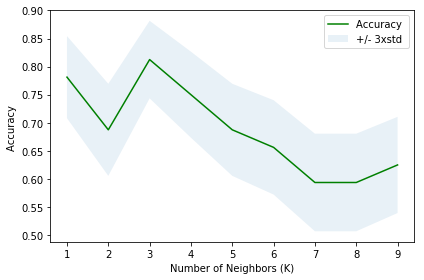

The best accuracy was  0.8125 with k= 3


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#try different values for K and plot the results
Ks = 10
Kmean_acc = np.zeros((Ks-1))
Kstd_acc = np.zeros((Ks-1))
KConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    Kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat1=Kneigh.predict(X_test_norm)
    Kmean_acc[n-1] = metrics.accuracy_score(y_test, yhat1)

    
    Kstd_acc[n-1]=np.std(yhat1==y_test)/np.sqrt(yhat1.shape[0])

Kmean_acc
plt.plot(range(1,Ks),Kmean_acc,'g')
plt.fill_between(range(1,Ks),Kmean_acc - 1 * Kstd_acc,Kmean_acc + 1 * Kstd_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was ", Kmean_acc.max(), "with k=", Kmean_acc.argmax()+1) 

### Decision Tree

In [24]:
#create the model
# import DT
from sklearn.tree import DecisionTreeClassifier
# run on the previously "Split" data
NeighborhoodTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
NeighborhoodTree #
NeighborhoodTree.fit(X_train_norm,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:

# Predict and evaluate
predTree = NeighborhoodTree.predict(X_test_norm)
print (predTree [0:5])
print (y_test [0:5])
# evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


[1 0 1 1 0]
[1 1 1 1 0]
DecisionTrees's Accuracy:  0.75


### SVM

In [27]:
#import the library and use the default function, RBF
from sklearn import svm
#fit the model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_norm, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
#make predictions
yhat2 = clf.predict(X_test_norm)
yhat2 [0:5]

array([0, 0, 1, 1, 0])

In [29]:
#evaluate and plot
#get libraries
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [30]:
# use the confusion matrix plotter function from the lab
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.69      0.79      0.73        14
          1       0.81      0.72      0.76        18

avg / total       0.76      0.75      0.75        32

Confusion matrix, without normalization
[[11  3]
 [ 5 13]]


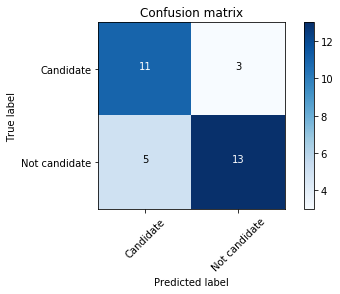

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Candidate','Not candidate'],normalize= False,  title='Confusion matrix')

### Logistic Regression

In [32]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_norm,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
#predict
yhat3 = LR.predict(X_test_norm)
yhat3

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0])

In [34]:
#get probabilities
yhat3_prob = LR.predict_proba(X_test_norm)
yhat3_prob

array([[ 0.63,  0.37],
       [ 0.54,  0.46],
       [ 0.39,  0.61],
       [ 0.35,  0.65],
       [ 0.73,  0.27],
       [ 0.55,  0.45],
       [ 0.51,  0.49],
       [ 0.41,  0.59],
       [ 0.64,  0.36],
       [ 0.64,  0.36],
       [ 0.46,  0.54],
       [ 0.34,  0.66],
       [ 0.28,  0.72],
       [ 0.64,  0.36],
       [ 0.56,  0.44],
       [ 0.58,  0.42],
       [ 0.6 ,  0.4 ],
       [ 0.46,  0.54],
       [ 0.56,  0.44],
       [ 0.41,  0.59],
       [ 0.33,  0.67],
       [ 0.64,  0.36],
       [ 0.5 ,  0.5 ],
       [ 0.26,  0.74],
       [ 0.32,  0.68],
       [ 0.47,  0.53],
       [ 0.65,  0.35],
       [ 0.44,  0.56],
       [ 0.36,  0.64],
       [ 0.75,  0.25],
       [ 0.59,  0.41],
       [ 0.53,  0.47]])

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [36]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
                             random_state=0)
clf.fit(X_train_norm, y_train)

#print(clf.feature_importances_)

y_pred=clf.predict(X_test_norm)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8125


### This is the highest Accuracy, so I'll use it to predict for my candidate cities
### The methodology for each city will be as follows:
### 1. split off the neighborhood name as a vector, to be matched up to the predictions later
### 2. run the city data through the trainied model
### 3. restore the neighborhood names
### 4. assemble a complete results matrix that can be sorted to give the winning neighborhoods.

In [38]:
#Read Des Moines top 25 csv

# Fetch the file
my_file = project.get_file("Des_Moines_final_model_input.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
des_moines_top_25 = pd.read_csv(my_file)
des_moines_top_25

Neighborhood  Coffee Shop  American Restaurant      Café  \
0                       Accent     0.000000             0.000000  0.000000   
1                   Beaverdale     0.000000             0.000000  0.000000   
2                 Capitol East     0.000000             0.052632  0.000000   
3                 Capitol Park     0.000000             0.000000  0.000000   
4           Capitol View South     0.000000             0.200000  0.000000   
5                    Carpenter     0.050000             0.000000  0.050000   
6              Chautauqua Park     0.000000             0.000000  0.000000   
7                 Cheatom Park     0.000000             0.000000  0.000000   
8                Douglas Acres     0.000000             0.000000  0.000000   
9          Downtown Des Moines     0.083333             0.041667  0.041667   
10                       Drake     0.066667             0.000000  0.066667   
11                  Drake Park     0.071429             0.000000  0.000000   
12                East Village     0.019608             0.039216  0.019608   
13                  Fairground     0.000000             0.000000  0.000000   
14               Fairmont Park     0.000000             0.000000  0.000000   
15                Frisbie Park     0.055556             0.027778  0.000000   
16                 Garton West     0.000000             0.000000  0.000000   
17                Gray's Woods     0.000000             0.000000  0.000000   
18          Greater South Side     0.000000             0.000000  0.000000   
19                   Greenwood     0.000000             0.000000  0.000000   
20               Highland Park     0.000000             0.000000  0.000000   
21             Indianola Hills     0.000000             0.000000  0.000000   
22              Ingersoll Park     0.000000             0.000000  0.000000   
23                 Jordan Park     0.000000             0.000000  0.000000   
24               Kirkwood Glen     0.000000             0.000000  0.000000   
25                 Laurel Hill     0.000000             0.000000  0.000000   
26              Linden Heights     0.000000             0.000000  0.000000   
27                Lower Beaver     0.000000             0.500000  0.000000   
28               Magnolia Park     0.000000             0.000000  0.000000   
29  Martin Luther King Jr Park     0.000000             0.000000  0.000000   
30             McKinley School     0.000000             0.285714  0.000000   
31                    Meredith     0.045455             0.000000  0.000000   
32                   Merle Hay     0.000000             0.000000  0.000000   
33        Mondamin Presidentia     0.000000             0.000000  0.000000   
34                  New Vision     0.000000             0.000000  0.000000   
35              North Of Grand     0.000000             0.000000  0.125000   
36                    Oak Park     0.000000             0.000000  0.000000   
37                  River Bend     0.000000             0.000000  0.000000   
38              Salisbury Oaks     0.000000             0.000000  0.000000   
39                Sherman Hill     0.333333             0.000000  0.000000   
40                    Somerset     0.000000             0.000000  0.000000   
41                  South Park     0.000000             0.000000  0.000000   
42                  Union Park     0.000000             0.000000  0.000000   
43           Valley High Manor     0.000000             0.000000  0.000000   
44                   Waterbury     0.000000             0.000000  0.000000   
45               Waveland Park     0.000000             0.000000  0.000000   
46              Waveland Woods     0.000000             0.000000  0.000000   
47                    Westwood     0.000000             0.000000  0.000000   
48            Woodland Heights     0.000000             0.000000  0.000000   

         Gym  Italian Restaurant  Pizza Place  Sandwich Place     Hotel  \
0   0.000000            0.000000     0.000

In [39]:
Des_Moines_neighborhoods = des_moines_top_25.filter(['Neighborhood'])
Des_Moines_neighborhoods

Neighborhood
0                       Accent
1                   Beaverdale
2                 Capitol East
3                 Capitol Park
4           Capitol View South
5                    Carpenter
6              Chautauqua Park
7                 Cheatom Park
8                Douglas Acres
9          Downtown Des Moines
10                       Drake
11                  Drake Park
12                East Village
13                  Fairground
14               Fairmont Park
15                Frisbie Park
16                 Garton West
17                Gray's Woods
18          Greater South Side
19                   Greenwood
20               Highland Park
21             Indianola Hills
22              Ingersoll Park
23                 Jordan Park
24               Kirkwood Glen
25                 Laurel Hill
26              Linden Heights
27                Lower Beaver
28               Magnolia Park
29  Martin Luther King Jr Park
30             McKinley School
31                    Meredith
32                   Merle Hay
33        Mondamin Presidentia
34                  New Vision
35              North Of Grand
36                    Oak Park
37                  River Bend
38              Salisbury Oaks
39                Sherman Hill
40                    Somerset
41                  South Park
42                  Union Park
43           Valley High Manor
44                   Waterbury
45               Waveland Park
46              Waveland Woods
47                    Westwood
48            Woodland Heights

In [40]:
Des_Moines_eval = des_moines_top_25.filter(['Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])
Des_Moines_eval

Coffee Shop  American Restaurant      Café       Gym  Italian Restaurant  \
0      0.000000             0.000000  0.000000  0.000000            0.000000   
1      0.000000             0.000000  0.000000  0.000000            0.000000   
2      0.000000             0.052632  0.000000  0.000000            0.000000   
3      0.000000             0.000000  0.000000  0.000000            0.000000   
4      0.000000             0.200000  0.000000  0.000000            0.000000   
5      0.050000             0.000000  0.050000  0.000000            0.000000   
6      0.000000             0.000000  0.000000  0.000000            0.000000   
7      0.000000             0.000000  0.000000  0.000000            0.000000   
8      0.000000             0.000000  0.000000  1.000000            0.000000   
9      0.083333             0.041667  0.041667  0.000000            0.000000   
10     0.066667             0.000000  0.066667  0.000000            0.000000   
11     0.071429             0.000000  0.000000  0.000000            0.000000   
12     0.019608             0.039216  0.019608  0.000000            0.019608   
13     0.000000             0.000000  0.000000  0.000000            0.000000   
14     0.000000             0.000000  0.000000  0.000000            0.000000   
15     0.055556             0.027778  0.000000  0.000000            0.000000   
16     0.000000             0.000000  0.000000  0.000000            0.000000   
17     0.000000             0.000000  0.000000  0.000000            0.000000   
18     0.000000             0.000000  0.000000  0.000000            0.000000   
19     0.000000             0.000000  0.000000  0.000000            0.000000   
20     0.000000             0.000000  0.000000  0.000000            0.125000   
21     0.000000             0.000000  0.000000  0.000000            0.125000   
22     0.000000             0.000000  0.000000  0.000000            0.000000   
23     0.000000             0.000000  0.000000  0.000000            0.000000   
24     0.000000             0.000000  0.000000  0.000000            0.000000   
25     0.000000             0.000000  0.000000  0.000000            0.000000   
26     0.000000             0.000000  0.000000  0.000000            0.000000   
27     0.000000             0.500000  0.000000  0.000000            0.000000   
28     0.000000             0.000000  0.000000  0.000000            0.000000   
29     0.000000             0.000000  0.000000  0.000000            0.000000   
30     0.000000             0.285714  0.000000  0.000000            0.142857   
31     0.045455             0.000000  0.000000  0.045455            0.000000   
32     0.000000             0.000000  0.000000  0.000000            0.000000   
33     0.000000             0.000000  0.000000  0.000000            0.000000   
34     0.000000             0.000000  0.000000  0.000000            0.000000   
35     0.000000             0.000000  0.125000  0.000000            0.000000   
36     0.000000             0.000000  0.000000  0.000000            0.000000   
37     0.000000             0.000000  0.000000  0.000000            0.000000   
38     0.000000             0.000000  0.000000  0.000000            0.000000   
39     0.333333             0.000000  0.000000  0.000000            0.000000   
40     0.000000             0.000000  0.000000  0.000000            0.000000   
41     0.000000             0.000000  0.000000  0.000000            0.000000   
42     0.000000             0.000000  0.000000  0.000000            0.000000   
43     0.000000             0.000000  0.000000  0.000000            0.000000   
44     0.000000             0.000000  0.000000  0.000000            0.000000   
45     0.000000             0.000000  0.000000  0.000000            0.000000   
46     0.000000             0.000000  0.000000  0.000000            0.000000   
47     0.000000             0.000000  0.000000  0.000000            0.000000   
48     0.000000             0.000000  0.000000  0.000000            0.000000   

   

In [41]:
# normalize
X_eval= preprocessing.StandardScaler().fit(Des_Moines_eval).transform(Des_Moines_eval)
X_eval

array([[-0.29, -0.28, -0.29, ...,  0.  ,  0.  ,  0.  ],
       [-0.29, -0.28, -0.29, ...,  0.  ,  0.  ,  0.  ],
       [-0.29,  0.34, -0.29, ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [-0.29, -0.28, -0.29, ...,  0.  ,  0.  ,  0.  ],
       [-0.29, -0.28, -0.29, ...,  0.  ,  0.  ,  0.  ],
       [-0.29, -0.28, -0.29, ...,  0.  ,  0.  ,  0.  ]])

In [42]:
# predict
y_pred_Des_Moines=clf.predict(X_eval)
y_pred_Des_Moines

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [43]:
# put this array into a dataframe
pd_pred = pd.DataFrame(y_pred_Des_Moines)
pd_pred

0
0   0
1   0
2   1
3   0
4   1
5   1
6   0
7   0
8   1
9   1
10  1
11  1
12  1
13  0
14  0
15  1
16  0
17  0
18  0
19  0
20  0
21  0
22  0
23  0
24  0
25  0
26  0
27  1
28  1
29  1
30  1
31  1
32  0
33  0
34  0
35  1
36  0
37  0
38  0
39  1
40  0
41  0
42  0
43  0
44  0
45  0
46  0
47  0
48  0

In [44]:
# reassemble
Des_Moines_P = pd.DataFrame(np.concatenate([Des_Moines_neighborhoods, pd_pred], axis = 1))
Des_Moines_P

0  1
0                       Accent  0
1                   Beaverdale  0
2                 Capitol East  1
3                 Capitol Park  0
4           Capitol View South  1
5                    Carpenter  1
6              Chautauqua Park  0
7                 Cheatom Park  0
8                Douglas Acres  1
9          Downtown Des Moines  1
10                       Drake  1
11                  Drake Park  1
12                East Village  1
13                  Fairground  0
14               Fairmont Park  0
15                Frisbie Park  1
16                 Garton West  0
17                Gray's Woods  0
18          Greater South Side  0
19                   Greenwood  0
20               Highland Park  0
21             Indianola Hills  0
22              Ingersoll Park  0
23                 Jordan Park  0
24               Kirkwood Glen  0
25                 Laurel Hill  0
26              Linden Heights  0
27                Lower Beaver  1
28               Magnolia Park  1
29  Martin Luther King Jr Park  1
30             McKinley School  1
31                    Meredith  1
32                   Merle Hay  0
33        Mondamin Presidentia  0
34                  New Vision  0
35              North Of Grand  1
36                    Oak Park  0
37                  River Bend  0
38              Salisbury Oaks  0
39                Sherman Hill  1
40                    Somerset  0
41                  South Park  0
42                  Union Park  0
43           Valley High Manor  0
44                   Waterbury  0
45               Waveland Park  0
46              Waveland Woods  0
47                    Westwood  0
48            Woodland Heights  0

In [45]:
Des_Moines_P.insert(0,'City', 'Des Moines')
Des_Moines_P

City                           0  1
0   Des Moines                      Accent  0
1   Des Moines                  Beaverdale  0
2   Des Moines                Capitol East  1
3   Des Moines                Capitol Park  0
4   Des Moines          Capitol View South  1
5   Des Moines                   Carpenter  1
6   Des Moines             Chautauqua Park  0
7   Des Moines                Cheatom Park  0
8   Des Moines               Douglas Acres  1
9   Des Moines         Downtown Des Moines  1
10  Des Moines                       Drake  1
11  Des Moines                  Drake Park  1
12  Des Moines                East Village  1
13  Des Moines                  Fairground  0
14  Des Moines               Fairmont Park  0
15  Des Moines                Frisbie Park  1
16  Des Moines                 Garton West  0
17  Des Moines                Gray's Woods  0
18  Des Moines          Greater South Side  0
19  Des Moines                   Greenwood  0
20  Des Moines               Highland Park  0
21  Des Moines             Indianola Hills  0
22  Des Moines              Ingersoll Park  0
23  Des Moines                 Jordan Park  0
24  Des Moines               Kirkwood Glen  0
25  Des Moines                 Laurel Hill  0
26  Des Moines              Linden Heights  0
27  Des Moines                Lower Beaver  1
28  Des Moines               Magnolia Park  1
29  Des Moines  Martin Luther King Jr Park  1
30  Des Moines             McKinley School  1
31  Des Moines                    Meredith  1
32  Des Moines                   Merle Hay  0
33  Des Moines        Mondamin Presidentia  0
34  Des Moines                  New Vision  0
35  Des Moines              North Of Grand  1
36  Des Moines                    Oak Park  0
37  Des Moines                  River Bend  0
38  Des Moines              Salisbury Oaks  0
39  Des Moines                Sherman Hill  1
40  Des Moines                    Somerset  0
41  Des Moines                  South Park  0
42  Des Moines                  Union Park  0
43  Des Moines           Valley High Manor  0
44  Des Moines                   Waterbury  0
45  Des Moines               Waveland Park  0
46  Des Moines              Waveland Woods  0
47  Des Moines                    Westwood  0
48  Des Moines            Woodland Heights  0

In [46]:
Des_Moines_out = Des_Moines_P.rename(index=str, columns={0: "Neighborhood", 1: "Result"})
Des_Moines_out

City                Neighborhood Result
0   Des Moines                      Accent      0
1   Des Moines                  Beaverdale      0
2   Des Moines                Capitol East      1
3   Des Moines                Capitol Park      0
4   Des Moines          Capitol View South      1
5   Des Moines                   Carpenter      1
6   Des Moines             Chautauqua Park      0
7   Des Moines                Cheatom Park      0
8   Des Moines               Douglas Acres      1
9   Des Moines         Downtown Des Moines      1
10  Des Moines                       Drake      1
11  Des Moines                  Drake Park      1
12  Des Moines                East Village      1
13  Des Moines                  Fairground      0
14  Des Moines               Fairmont Park      0
15  Des Moines                Frisbie Park      1
16  Des Moines                 Garton West      0
17  Des Moines                Gray's Woods      0
18  Des Moines          Greater South Side      0
19  Des Moines                   Greenwood      0
20  Des Moines               Highland Park      0
21  Des Moines             Indianola Hills      0
22  Des Moines              Ingersoll Park      0
23  Des Moines                 Jordan Park      0
24  Des Moines               Kirkwood Glen      0
25  Des Moines                 Laurel Hill      0
26  Des Moines              Linden Heights      0
27  Des Moines                Lower Beaver      1
28  Des Moines               Magnolia Park      1
29  Des Moines  Martin Luther King Jr Park      1
30  Des Moines             McKinley School      1
31  Des Moines                    Meredith      1
32  Des Moines                   Merle Hay      0
33  Des Moines        Mondamin Presidentia      0
34  Des Moines                  New Vision      0
35  Des Moines              North Of Grand      1
36  Des Moines                    Oak Park      0
37  Des Moines                  River Bend      0
38  Des Moines              Salisbury Oaks      0
39  Des Moines                Sherman Hill      1
40  Des Moines                    Somerset      0
41  Des Moines                  South Park      0
42  Des Moines                  Union Park      0
43  Des Moines           Valley High Manor      0
44  Des Moines                   Waterbury      0
45  Des Moines               Waveland Park      0
46  Des Moines              Waveland Woods      0
47  Des Moines                    Westwood      0
48  Des Moines            Woodland Heights      0

In [47]:
project.save_data("Des_Moines_result.csv", Des_Moines_out.to_csv(index=False), overwrite=True)

{'asset_id': '3e424405-9b03-40aa-9d52-fd4abcf5ce6c',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'Des_Moines_result.csv',
 'message': 'File saved to project storage.'}

#### run the process for the 10 cities:
#### 1. Wichita KS
#### 2. Des Moines IA
#### 3. Madison WI
#### 4. Boise ID
#### 5. Omaha NE
#### 6. Greenville SC
#### 7. Lancaster PA
#### 8. Albany NY
#### 9. Fort Myers FL
#### 10. Winston Salem NC

In [48]:
def create_write_final_output(city):


# Fetch the file
    input25_csv = city + "_final_model_input.csv"
    output25_csv = city + "_result.csv"

    my_file = project.get_file(input25_csv)

# Read the CSV data file from the object storage into a pandas DataFrame
    my_file.seek(0)
    import pandas as pd
    city_top_25 = pd.read_csv(my_file)


# split off neighborhoods for later
    city_neighborhoods = city_top_25.filter(['Neighborhood'])

# make the input dataset
    city_eval = city_top_25.filter(['Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])

# standardize the data
    X_eval= preprocessing.StandardScaler().fit(city_eval).transform(city_eval)

# predict using the random forest model
    y_pred_city=clf.predict(X_eval)

# put the predictions into a dataframe
    pd_pred = pd.DataFrame(y_pred_city)


# add the neighborhood names back
    city_P = pd.DataFrame(np.concatenate([city_neighborhoods, pd_pred], axis = 1))

# add the city name so that all the results can be combined later
    city_P.insert(0,'City', city)

# rename the neighborhood and result columns to standardize the output

    city_out = city_P.rename(index=str, columns={0: "Neighborhood", 1: "Result"})
    
    project.save_data(output25_csv, city_out.to_csv(index=False), overwrite=True)
    
    return city_out

In [49]:
create_write_final_output('Wichita')

City            Neighborhood Result
0   Wichita         A Price Woodard      1
1   Wichita          Benjamin Hills      0
2   Wichita             Brookhollow      0
3   Wichita            College Hill      0
4   Wichita      Cottonwood Village      1
5   Wichita        Country Overlook      0
6   Wichita               Courtland      0
7   Wichita       Crestview Heights      0
8   Wichita     Crown Heights North      0
9   Wichita     Crown Heights South      1
10  Wichita                  Delano      0
11  Wichita                Downtown      1
12  Wichita              East Front      1
13  Wichita         East Mt. Vernon      0
14  Wichita               Eastridge      0
15  Wichita                Fabrique      0
16  Wichita               Fairmount      0
17  Wichita            Forest Hills      0
18  Wichita       Grandview Heights      1
19  Wichita                 Hilltop      0
20  Wichita  Indian Hills Riverbend      0
21  Wichita                    K-15      1
22  Wichita                 Ken-Mar      0
23  Wichita         La Placita Park      0
24  Wichita               Lambsdale      0
25  Wichita                 Linwood      0
26  Wichita                Longview      0
27  Wichita               MacDonald      0
28  Wichita                 McAdams      0
29  Wichita                    Mead      0
..      ...                     ...    ...
32  Wichita               New Salem      0
33  Wichita         North Riverside      0
34  Wichita       Northeast Heights      0
35  Wichita       Northeast Millair      0
36  Wichita     Northwest Big River      0
37  Wichita                 Oakview      0
38  Wichita            Orchard Park      0
39  Wichita            Park Meadows      0
40  Wichita        Planeview United      0
41  Wichita                   Power      0
42  Wichita               Riverside      0
43  Wichita               Riverview      0
44  Wichita               Rockhurst      0
45  Wichita               Schweiter      0
46  Wichita          Schweiter East      0
47  Wichita           Sherwood Glen      0
48  Wichita           Sleepy Hollow      1
49  Wichita              South Area      1
50  Wichita           South Central      0
51  Wichita              South City      0
52  Wichita            South Seneca      0
53  Wichita       Southwest Wichita      0
54  Wichita            Stanley/Aley      0
55  Wichita               Sunflower      0
56  Wichita              Sunnybrook      0
57  Wichita               Sunnyside      0
58  Wichita                 The Elm      0
59  Wichita                The Hyde      1
60  Wichita                  Uptown      0
61  Wichita                Westlink      0

[62 rows x 3 columns]

In [50]:
create_write_final_output('Des_Moines')

City                Neighborhood Result
0   Des_Moines                      Accent      0
1   Des_Moines                  Beaverdale      0
2   Des_Moines                Capitol East      1
3   Des_Moines                Capitol Park      0
4   Des_Moines          Capitol View South      1
5   Des_Moines                   Carpenter      1
6   Des_Moines             Chautauqua Park      0
7   Des_Moines                Cheatom Park      0
8   Des_Moines               Douglas Acres      1
9   Des_Moines         Downtown Des Moines      1
10  Des_Moines                       Drake      1
11  Des_Moines                  Drake Park      1
12  Des_Moines                East Village      1
13  Des_Moines                  Fairground      0
14  Des_Moines               Fairmont Park      0
15  Des_Moines                Frisbie Park      1
16  Des_Moines                 Garton West      0
17  Des_Moines                Gray's Woods      0
18  Des_Moines          Greater South Side      0
19  Des_Moines                   Greenwood      0
20  Des_Moines               Highland Park      0
21  Des_Moines             Indianola Hills      0
22  Des_Moines              Ingersoll Park      0
23  Des_Moines                 Jordan Park      0
24  Des_Moines               Kirkwood Glen      0
25  Des_Moines                 Laurel Hill      0
26  Des_Moines              Linden Heights      0
27  Des_Moines                Lower Beaver      1
28  Des_Moines               Magnolia Park      1
29  Des_Moines  Martin Luther King Jr Park      1
30  Des_Moines             McKinley School      1
31  Des_Moines                    Meredith      1
32  Des_Moines                   Merle Hay      0
33  Des_Moines        Mondamin Presidentia      0
34  Des_Moines                  New Vision      0
35  Des_Moines              North Of Grand      1
36  Des_Moines                    Oak Park      0
37  Des_Moines                  River Bend      0
38  Des_Moines              Salisbury Oaks      0
39  Des_Moines                Sherman Hill      1
40  Des_Moines                    Somerset      0
41  Des_Moines                  South Park      0
42  Des_Moines                  Union Park      0
43  Des_Moines           Valley High Manor      0
44  Des_Moines                   Waterbury      0
45  Des_Moines               Waveland Park      0
46  Des_Moines              Waveland Woods      0
47  Des_Moines                    Westwood      0
48  Des_Moines            Woodland Heights      0

In [51]:
create_write_final_output('Madison')

City                      Neighborhood Result
0   Madison                  Allied Community      0
1   Madison                       Arbor Hills      0
2   Madison                         Bay Creek      0
3   Madison                           Bayview      0
4   Madison                      Berkley Oaks      0
5   Madison                         Blackhawk      0
6   Madison                   Bram's Addition      0
7   Madison                 Brentwood Village      0
8   Madison                Broadway-Lakepoint      0
9   Madison                     Burke Heights      0
10  Madison                         Burr Oaks      0
11  Madison                           Capitol      1
12  Madison              Capitol View Heights      0
13  Madison                Carpenter-Ridgeway      0
14  Madison                   Cherokee Garden      0
15  Madison                     Cherokee Park      0
16  Madison                    Dudgeon-Monroe      0
17  Madison                      Dunn's Marsh      0
18  Madison                        East Bluff      0
19  Madison                      East Buckeye      0
20  Madison                       Eastmorland      0
21  Madison                         Eken Park      0
22  Madison                          Elvehjem      0
23  Madison                      Emerson East      0
24  Madison                         Faircrest      1
25  Madison                     Glacier Ridge      0
26  Madison                    Glen Oak Hills      0
27  Madison                          Glendale      0
28  Madison                         Greenbush      0
29  Madison                         Greentree      0
..      ...                               ...    ...
64  Madison                        Radio Park      0
65  Madison                    Reston Heights      0
66  Madison                         Ridgewood      0
67  Madison                   Rolling Meadows      0
68  Madison                        Sauk Creek      1
69  Madison                     Schenk-Atwood      1
70  Madison  Schenk-Atwood-Starkweather-Yahar      0
71  Madison                 Sheridan Triangle      0
72  Madison                           Sherman      0
73  Madison                   Sherman Terrace      0
74  Madison                   Sherman Village      0
75  Madison                     Spring Harbor      0
76  Madison                      Sunset Hills      0
77  Madison                    Sunset Village      0
78  Madison                   Tamarack Trails      0
79  Madison                     Tenney-Lapham      1
80  Madison                      Trinity Park      0
81  Madison                             Truax      0
82  Madison                        Vera Court      0
83  Madison                             Vilas      0
84  Madison                      Walnut Grove      0
85  Madison                           Waunona      0
86  Madison               Westchester Gardens      0
87  Madison                  Westhaven Trails      0
88  Madison                       Westmorland      1
89  Madison                           Wexford      1
90  Madison                   Whitetail Ridge      0
91  Madison                    Woodland Hills      0
92  Madison                  Worthington Park      0
93  Madison                         Wyndemere      0

[94 rows x 3 columns]

In [52]:
create_write_final_output('Boise')

City          Neighborhood Result
0   Boise         Central Bench      0
1   Boise           Central Rim      0
2   Boise             Collister      0
3   Boise           Depot Bench      0
4   Boise              Downtown      0
5   Boise              East End      0
6   Boise     Franklin Randolph      1
7   Boise          Harris Ranch      0
8   Boise         Harrison Blvd      0
9   Boise             Highlands      0
10  Boise             Hillcrest      0
11  Boise  Maple Grove-Franklin      0
12  Boise           Morris Hill      0
13  Boise             North End      0
14  Boise             Northwest      0
15  Boise               Pioneer      1
16  Boise           Quail Ridge      1
17  Boise        Riverland East      0
18  Boise   South Boise Village      0
19  Boise       Southeast Boise      0
20  Boise         Southwest Ada      0
21  Boise         Stewart Gulch      0
22  Boise           Sunrise Rim      1
23  Boise                Sunset      0
24  Boise         Veterans Park      1
25  Boise                 Vista      1
26  Boise     Warm Springs Mesa      0
27  Boise            West Bench      0
28  Boise       West Cloverdale      0
29  Boise           West Valley      0
30  Boise         Winstead Park      0

In [53]:
create_write_final_output('Omaha')

City                                Neighborhood Result
0   Omaha                            Aksarben Village      1
1   Omaha                       Aksarben/Elmwood Park      1
2   Omaha                                   Applewood      0
3   Omaha                                 Baker Place      0
4   Omaha                                  Bemis Park      0
5   Omaha                                      Benson      1
6   Omaha                                  Bent Creek      0
7   Omaha                                   Boys Town      0
8   Omaha                                 Briar Hills      0
9   Omaha                                  Bridlewood      0
10  Omaha                                  Brookhaven      0
11  Omaha                             Burlington Road      0
12  Omaha                              Burnt District      1
13  Omaha                                 Carter Lake      0
14  Omaha                             Conestoga Place      1
15  Omaha                                Country Club      0
16  Omaha                                     Dahlman      1
17  Omaha                                   Deer Park      0
18  Omaha                                      Dundee      1
19  Omaha                                Elmwood Park      1
20  Omaha                                   Fairacres      1
21  Omaha                                  Field Club      1
22  Omaha                First National Business Park      1
23  Omaha                                Gifford Park      0
24  Omaha                                Hanscom Park      0
25  Omaha                                Hillsborough      0
26  Omaha                             Huntington Park      0
27  Omaha                                   Irvington      1
28  Omaha                                    Keystone      0
29  Omaha                               Kountze Place      0
..    ...                                         ...    ...
39  Omaha                                 Miller Park      0
40  Omaha                         Mockingbird Heights      0
41  Omaha                              Morton Meadows      0
42  Omaha                             Near North Side      0
43  Omaha                                 Oak Heights      0
44  Omaha                Old Market Historic District      1
45  Omaha                                  Omaha View      0
46  Omaha                                Orchard Hill      0
47  Omaha                                 Park Avenue      0
48  Omaha                                   Park East      0
49  Omaha                               Prospect Hill      0
50  Omaha                                     Ralston      1
51  Omaha                                  Raven Oaks      0
52  Omaha                                     Regency      1
53  Omaha                                     Roanoke      1
54  Omaha                                  Robin Hill      0
55  Omaha                                     Roxbury      0
56  Omaha                           Royalwood Estates      0
57  Omaha                                    Saratoga      0
58  Omaha                                 South Omaha      0
59  Omaha                           Sporting District      0
60  Omaha                                 Spring Lake      0
61  Omaha                                 Sunny Slope      0
62  Omaha                                      Valley      0
63  Omaha  Vinton Street Commercial Historic District      0
64  Omaha                                 Walnut Hill      1
65  Omaha                                    Waterloo      0
66  Omaha                    West Farnam neighborhood      1
67  Omaha                                    Westgate      0
68  Omaha                                    Westside      0

[69 rows x 3 columns]

In [54]:
create_write_final_output('Greenville')

City           Neighborhood Result
0   Greenville          Arcadia Hills      0
1   Greenville           Augusta Road      0
2   Greenville             Brutontown      0
3   Greenville       Cherrydale Point      1
4   Greenville              City View      0
5   Greenville               Downtown      1
6   Greenville                 Dunean      1
7   Greenville  Greenline-Spartanburg      0
8   Greenville         Haynie-Sirrine      1
9   Greenville           Haywood Road      1
10  Greenville                 Judson      0
11  Greenville             Nicholtown      0
12  Greenville              Overbrook      0
13  Greenville             Park Place      1
14  Greenville            Payne-Logan      0
15  Greenville            Pelham Road      0
16  Greenville        Pleasant Valley      0
17  Greenville    Roper Mountain Road      0
18  Greenville             Sans Souci      0
19  Greenville           Simpsonville      0
20  Greenville           Southernside      0
21  Greenville         Travelers Rest      0
22  Greenville           Viola Street      0
23  Greenville        West Greenville      1
24  Greenville          Woodruff Road      0

In [55]:
create_write_final_output('Lancaster')

City               Neighborhood Result
0   Lancaster               Cabbage Hill      1
1   Lancaster  Central Business District      1
2   Lancaster              Chestnut Hill      0
3   Lancaster                Churchtowne      0
4   Lancaster               College Park      0
5   Lancaster          Conestoga Heights      0
6   Lancaster                  East Side      0
7   Lancaster                Musser Park      1
8   Lancaster                 Mussertown      1
9   Lancaster           Prospect Heights      0
10  Lancaster                       Ross      1
11  Lancaster                 South Side      1
12  Lancaster           Stadium District      0
13  Lancaster                   West End      0

In [56]:
create_write_final_output('Albany')

City                           Neighborhood Result
0   Albany                             Arbor Hill      0
1   Albany                              Beverwyck      1
2   Albany                          Bishop's Gate      0
3   Albany                        Buckingham Lake      0
4   Albany                          Center Square      0
5   Albany                        Delaware Avenue      0
6   Albany                        Downtown Albany      1
7   Albany                             Eagle Hill      0
8   Albany                             Helderberg      0
9   Albany                            Hudson/Park      0
10  Albany                             Krank Park      0
11  Albany                      Manning Boulevard      0
12  Albany                       Mansion District      0
13  Albany                             Mount Hope      0
14  Albany                  New Scotland/Woodlawn      0
15  Albany                            Normanskill      0
16  Albany                           Normansville      0
17  Albany                           North Albany      1
18  Albany                             Park South      1
19  Albany                               Pastures      1
20  Albany                             Pine Hills      1
21  Albany  Rapp Road Community Historic District      0
22  Albany                          Second Avenue      0
23  Albany                        Sheridan Hollow      1
24  Albany                              South End      0
25  Albany                              The Dunes      0
26  Albany                     University Heights      1
27  Albany                Upper Washington Avenue      0
28  Albany                        Washington Park      0
29  Albany                      Washington Square      1
30  Albany                            West Albany      0
31  Albany                              West Hill      0
32  Albany                              Whitehall      0

In [57]:
create_write_final_output('Fort_Myers')

City                   Neighborhood Result
0   Fort_Myers                 Altamont Manor      1
1   Fort_Myers                         Argyle      0
2   Fort_Myers                     Beach Club      0
3   Fort_Myers           Boardwalk Park Place      0
4   Fort_Myers                 Botanica Lakes      0
5   Fort_Myers                  Bowling Green      0
6   Fort_Myers                Broadway Circle      0
7   Fort_Myers                      Brookhill      0
8   Fort_Myers                 Campbell Acres      0
9   Fort_Myers                Castlebar Court      0
10  Fort_Myers                  Colonial Oaks      0
11  Fort_Myers                   Country Club      0
12  Fort_Myers                  Cypress Court      0
13  Fort_Myers    Dean Park Historic District      0
14  Fort_Myers     Downtown Historic District      0
15  Fort_Myers                East 1st Street      0
16  Fort_Myers                    East Dunbar      0
17  Fort_Myers               Eastwood Village      0
18  Fort_Myers                       Edgewood      1
19  Fort_Myers  Edison Park Historic District      1
20  Fort_Myers                  Franklin Park      0
21  Fort_Myers                    Harbor East      0
22  Fort_Myers                   Harlem Lakes      1
23  Fort_Myers                 Hope's Gardens      0
24  Fort_Myers                    Lagg Avenue      0
25  Fort_Myers               Michigan Housing      1
26  Fort_Myers                  Michigan Park      1
27  Fort_Myers                     New Street      0
28  Fort_Myers                 Olympia Pointe      0
29  Fort_Myers                  Palm Lee Park      0
30  Fort_Myers                          Palms      0
31  Fort_Myers               Piedmont Gardens      0
32  Fort_Myers                 Poinciana Park      0
33  Fort_Myers                Poinsettia Park      0
34  Fort_Myers                 Riverside Park      0
35  Fort_Myers                     Sable Palm      0
36  Fort_Myers                    Serena Park      0
37  Fort_Myers                        Shriver      0
38  Fort_Myers              Southward Village      0
39  Fort_Myers                    Sunset Park      0
40  Fort_Myers                         Towles      1
41  Fort_Myers                Velasco Village      0
42  Fort_Myers                West 1st Street      1
43  Fort_Myers                        Winkler      1

In [58]:
create_write_final_output('Winston_Salem')

City         Neighborhood Result
0   Winston_Salem             Alspaugh      0
1   Winston_Salem              Arcadia      0
2   Winston_Salem              Ardmore      1
3   Winston_Salem         Atwood Acres      0
4   Winston_Salem          Mount Tabor      0
5   Winston_Salem              Oldtown      0
6   Winston_Salem                Salem      0
7   Winston_Salem         Stanleyville      0
8   Winston_Salem            Waughtown      0
9   Winston_Salem       West Highlands      0
10  Winston_Salem            West Oaks      0
11  Winston_Salem           West Salem      0
12  Winston_Salem             Westview      0
13  Winston_Salem  Williamsburg Square      1
14  Winston_Salem             Wilshire      0

### Issue: Of the 437 potential neighborhoods, the random forest model recommended 103 of them!
### This makes the binary output less useful than hoped.
### Probability outputs would allow selecting only the very top scores.
### One possible solution that comes to mind is to use deep learning, setting up a multi-layer neural network with a softmax output in order to get a probability for each output.
### However, we saw an easier method to get probabilities in the classification exercise.
### I'll repeat the process using the logistic regression probability prediction as shown above in the LR section¶

In [60]:
def create_write_prob_output(city):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    

# Fetch the file
    input25_csv = city + "_final_model_input.csv"
    output25_csv = city + "_prob_result.csv"

    my_file = project.get_file(input25_csv)

# Read the CSV data file from the object storage into a pandas DataFrame
    my_file.seek(0)
    import pandas as pd
    city_top_25 = pd.read_csv(my_file)


# split off neighborhoods for later
    city_neighborhoods = city_top_25.filter(['Neighborhood'])

# make the input dataset
    city_eval = city_top_25.filter(['Coffee Shop','American Restaurant','Café','Gym','Italian Restaurant','Pizza Place','Sandwich Place','Hotel','Bakery','Gym / Fitness Center','Food Truck','Mexican Restaurant','Mediterranean Restaurant','New American Restaurant','Park','Bar','Seafood Restaurant','Cocktail Bar','Burger Joint','Restaurant','Sushi Restaurant','Vegetarian / Vegan Restaurant','Salad Place','Yoga Studio','Juice Bar'])

# standardize the data
    X_eval= preprocessing.StandardScaler().fit(city_eval).transform(city_eval)

# predict using the Logistic Regression, then get the probabilities

    y_prob_city=LR.predict_proba(X_eval)

# put the predictions into a dataframe
    pd_pred = pd.DataFrame(y_prob_city)


# add the neighborhood names back
    city_P = pd.DataFrame(np.concatenate([city_neighborhoods, pd_pred], axis = 1))

# add the city name so that all the results can be combined later
    city_P.insert(0,'City', city)

# rename the neighborhood and result columns to standardize the output

    city_out = city_P.rename(index=str, columns={0: "Neighborhood", 1: "Prob 0", 2: "Prob 1"})
    
    project.save_data(output25_csv, city_out.to_csv(index=False), overwrite=True)
    
    return city_out

### run the probability process for the 10 cities

In [61]:
create_write_prob_output('Wichita')

City            Neighborhood    Prob 0    Prob 1
0   Wichita         A Price Woodard  0.192048  0.807952
1   Wichita          Benjamin Hills  0.533062  0.466938
2   Wichita             Brookhollow  0.518928  0.481072
3   Wichita            College Hill  0.487146  0.512854
4   Wichita      Cottonwood Village  0.325588  0.674412
5   Wichita        Country Overlook  0.533062  0.466938
6   Wichita               Courtland  0.397369  0.602631
7   Wichita       Crestview Heights  0.533062  0.466938
8   Wichita     Crown Heights North  0.535869  0.464131
9   Wichita     Crown Heights South  0.418225  0.581775
10  Wichita                  Delano  0.544928  0.455072
11  Wichita                Downtown  0.360568  0.639432
12  Wichita              East Front  0.424783  0.575217
13  Wichita         East Mt. Vernon  0.533062  0.466938
14  Wichita               Eastridge   0.58107   0.41893
15  Wichita                Fabrique  0.533062  0.466938
16  Wichita               Fairmount  0.500302  0.499698
17  Wichita            Forest Hills  0.533062  0.466938
18  Wichita       Grandview Heights  0.482623  0.517377
19  Wichita                 Hilltop  0.627591  0.372409
20  Wichita  Indian Hills Riverbend  0.403117  0.596883
21  Wichita                    K-15  0.418369  0.581631
22  Wichita                 Ken-Mar  0.489169  0.510831
23  Wichita         La Placita Park  0.566492  0.433508
24  Wichita               Lambsdale  0.627591  0.372409
25  Wichita                 Linwood  0.557087  0.442913
26  Wichita                Longview  0.533062  0.466938
27  Wichita               MacDonald  0.533062  0.466938
28  Wichita                 McAdams  0.492942  0.507058
29  Wichita                    Mead   0.50281   0.49719
..      ...                     ...       ...       ...
32  Wichita               New Salem  0.548371  0.451629
33  Wichita         North Riverside  0.533062  0.466938
34  Wichita       Northeast Heights  0.533062  0.466938
35  Wichita       Northeast Millair  0.492942  0.507058
36  Wichita     Northwest Big River  0.391532  0.608468
37  Wichita                 Oakview  0.551273  0.448727
38  Wichita            Orchard Park  0.533062  0.466938
39  Wichita            Park Meadows  0.594309  0.405691
40  Wichita        Planeview United  0.533062  0.466938
41  Wichita                   Power  0.533062  0.466938
42  Wichita               Riverside   0.58107   0.41893
43  Wichita               Riverview  0.580169  0.419831
44  Wichita               Rockhurst  0.533062  0.466938
45  Wichita               Schweiter  0.606966  0.393034
46  Wichita          Schweiter East   0.58107   0.41893
47  Wichita           Sherwood Glen   0.58107   0.41893
48  Wichita           Sleepy Hollow  0.185422  0.814578
49  Wichita              South Area  0.386547  0.613453
50  Wichita           South Central  0.462902  0.537098
51  Wichita              South City  0.592648  0.407352
52  Wichita            South Seneca  0.533062  0.466938
53  Wichita       Southwest Wichita  0.612006  0.387994
54  Wichita            Stanley/Aley  0.544928  0.455072
55  Wichita               Sunflower  0.483112  0.516888
56  Wichita              Sunnybrook  0.604905  0.395095
57  Wichita               Sunnyside  0.533062  0.466938
58  Wichita                 The Elm  0.478196  0.521804
59  Wichita                The Hyde  0.407833  0.592167
60  Wichita                  Uptown  0.492929  0.507071
61  Wichita                Westlink  0.533062  0.466938

[62 rows x 4 columns]

In [62]:
create_write_prob_output('Des_Moines')

City                Neighborhood    Prob 0    Prob 1
0   Des_Moines                      Accent  0.538079  0.461921
1   Des_Moines                  Beaverdale  0.612682  0.387318
2   Des_Moines                Capitol East  0.552183  0.447817
3   Des_Moines                Capitol Park  0.533857  0.466143
4   Des_Moines          Capitol View South  0.505423  0.494577
5   Des_Moines                   Carpenter  0.384079  0.615921
6   Des_Moines             Chautauqua Park  0.533857  0.466143
7   Des_Moines                Cheatom Park  0.503131  0.496869
8   Des_Moines               Douglas Acres  0.390204  0.609796
9   Des_Moines         Downtown Des Moines  0.250658  0.749342
10  Des_Moines                       Drake  0.508299  0.491701
11  Des_Moines                  Drake Park  0.355419  0.644581
12  Des_Moines                East Village  0.189928  0.810072
13  Des_Moines                  Fairground  0.550951  0.449049
14  Des_Moines               Fairmont Park  0.533857  0.466143
15  Des_Moines                Frisbie Park   0.50556   0.49444
16  Des_Moines                 Garton West  0.533857  0.466143
17  Des_Moines                Gray's Woods  0.549307  0.450693
18  Des_Moines          Greater South Side  0.533857  0.466143
19  Des_Moines                   Greenwood  0.533857  0.466143
20  Des_Moines               Highland Park   0.56455   0.43545
21  Des_Moines             Indianola Hills   0.49485   0.50515
22  Des_Moines              Ingersoll Park  0.495356  0.504644
23  Des_Moines                 Jordan Park  0.533857  0.466143
24  Des_Moines               Kirkwood Glen  0.533857  0.466143
25  Des_Moines                 Laurel Hill  0.579895  0.420105
26  Des_Moines              Linden Heights  0.533857  0.466143
27  Des_Moines                Lower Beaver  0.377322  0.622678
28  Des_Moines               Magnolia Park  0.465718  0.534282
29  Des_Moines  Martin Luther King Jr Park  0.468201  0.531799
30  Des_Moines             McKinley School  0.483465  0.516535
31  Des_Moines                    Meredith  0.451241  0.548759
32  Des_Moines                   Merle Hay  0.533857  0.466143
33  Des_Moines        Mondamin Presidentia  0.533857  0.466143
34  Des_Moines                  New Vision  0.498001  0.501999
35  Des_Moines              North Of Grand  0.441259  0.558741
36  Des_Moines                    Oak Park  0.572809  0.427191
37  Des_Moines                  River Bend  0.577288  0.422712
38  Des_Moines              Salisbury Oaks  0.612682  0.387318
39  Des_Moines                Sherman Hill  0.413005  0.586995
40  Des_Moines                    Somerset  0.546348  0.453652
41  Des_Moines                  South Park  0.593356  0.406644
42  Des_Moines                  Union Park  0.622217  0.377783
43  Des_Moines           Valley High Manor  0.533857  0.466143
44  Des_Moines                   Waterbury  0.533857  0.466143
45  Des_Moines               Waveland Park   0.58479   0.41521
46  Des_Moines              Waveland Woods  0.533857  0.466143
47  Des_Moines                    Westwood  0.593356  0.406644
48  Des_Moines            Woodland Heights  0.455579  0.544421

In [63]:
create_write_prob_output('Madison')

City                      Neighborhood    Prob 0    Prob 1
0   Madison                  Allied Community  0.527607  0.472393
1   Madison                       Arbor Hills   0.60556   0.39444
2   Madison                         Bay Creek  0.474703  0.525297
3   Madison                           Bayview  0.482894  0.517106
4   Madison                      Berkley Oaks  0.503607  0.496393
5   Madison                         Blackhawk  0.578337  0.421663
6   Madison                   Bram's Addition  0.577114  0.422886
7   Madison                 Brentwood Village  0.527607  0.472393
8   Madison                Broadway-Lakepoint  0.498989  0.501011
9   Madison                     Burke Heights  0.455041  0.544959
10  Madison                         Burr Oaks  0.616635  0.383365
11  Madison                           Capitol  0.275139  0.724861
12  Madison              Capitol View Heights  0.527607  0.472393
13  Madison                Carpenter-Ridgeway  0.559171  0.440829
14  Madison                   Cherokee Garden  0.437982  0.562018
15  Madison                     Cherokee Park  0.577298  0.422702
16  Madison                    Dudgeon-Monroe  0.436064  0.563936
17  Madison                      Dunn's Marsh  0.482839  0.517161
18  Madison                        East Bluff  0.533675  0.466325
19  Madison                      East Buckeye  0.555802  0.444198
20  Madison                       Eastmorland  0.584085  0.415915
21  Madison                         Eken Park  0.271794  0.728206
22  Madison                          Elvehjem  0.424999  0.575001
23  Madison                      Emerson East  0.402284  0.597716
24  Madison                         Faircrest  0.419197  0.580803
25  Madison                     Glacier Ridge  0.555802  0.444198
26  Madison                    Glen Oak Hills   0.60556   0.39444
27  Madison                          Glendale  0.559171  0.440829
28  Madison                         Greenbush   0.55192   0.44808
29  Madison                         Greentree  0.527607  0.472393
..      ...                               ...       ...       ...
64  Madison                        Radio Park  0.620652  0.379348
65  Madison                    Reston Heights  0.527607  0.472393
66  Madison                         Ridgewood  0.553936  0.446064
67  Madison                   Rolling Meadows    0.5393    0.4607
68  Madison                        Sauk Creek  0.405504  0.594496
69  Madison                     Schenk-Atwood  0.425558  0.574442
70  Madison  Schenk-Atwood-Starkweather-Yahar  0.498156  0.501844
71  Madison                 Sheridan Triangle   0.60556   0.39444
72  Madison                           Sherman  0.578495  0.421505
73  Madison                   Sherman Terrace  0.545186  0.454814
74  Madison                   Sherman Village  0.642851  0.357149
75  Madison                     Spring Harbor  0.577114  0.422886
76  Madison                      Sunset Hills  0.519368  0.480632
77  Madison                    Sunset Village  0.552556  0.447444
78  Madison                   Tamarack Trails  0.575594  0.424406
79  Madison                     Tenney-Lapham  0.397526  0.602474
80  Madison                      Trinity Park  0.510317  0.489683
81  Madison                             Truax  0.527607  0.472393
82  Madison                        Vera Court  0.587785  0.412215
83  Madison                             Vilas  0.481311  0.518689
84  Madison                      Walnut Grove  0.559171  0.440829
85  Madison                           Waunona  0.527607  0.472393
86  Madison               Westchester Gardens  0.574072  0.425928
87  Madison                  Westhaven Trails  0.575899  0.424101
88  Madison                       Westmorland    0.3618    0.6382
89  Madison                           Wexford  0.407839  0.592161
90  Madison                   Whitetail Ridge   0.52595   0.47405
91  Madison                    Woodland Hills  0.544487  0.455513
92  Madison                  Worthington Park  

In [64]:
create_write_prob_output('Boise')

City          Neighborhood    Prob 0    Prob 1
0   Boise         Central Bench  0.532057  0.467943
1   Boise           Central Rim  0.506658  0.493342
2   Boise             Collister  0.532057  0.467943
3   Boise           Depot Bench  0.467272  0.532728
4   Boise              Downtown  0.525401  0.474599
5   Boise              East End  0.596831  0.403169
6   Boise     Franklin Randolph  0.371277  0.628723
7   Boise          Harris Ranch  0.532057  0.467943
8   Boise         Harrison Blvd  0.532057  0.467943
9   Boise             Highlands  0.564125  0.435875
10  Boise             Hillcrest   0.46681   0.53319
11  Boise  Maple Grove-Franklin  0.622614  0.377386
12  Boise           Morris Hill   0.47984   0.52016
13  Boise             North End  0.444042  0.555958
14  Boise             Northwest  0.622614  0.377386
15  Boise               Pioneer  0.400288  0.599712
16  Boise           Quail Ridge  0.379046  0.620954
17  Boise        Riverland East  0.532057  0.467943
18  Boise   South Boise Village  0.532057  0.467943
19  Boise       Southeast Boise  0.501694  0.498306
20  Boise         Southwest Ada  0.577991  0.422009
21  Boise         Stewart Gulch  0.532057  0.467943
22  Boise           Sunrise Rim    0.3504    0.6496
23  Boise                Sunset  0.545324  0.454676
24  Boise         Veterans Park   0.40079   0.59921
25  Boise                 Vista  0.309924  0.690076
26  Boise     Warm Springs Mesa  0.532057  0.467943
27  Boise            West Bench  0.553481  0.446519
28  Boise       West Cloverdale  0.622614  0.377386
29  Boise           West Valley  0.532057  0.467943
30  Boise         Winstead Park  0.532057  0.467943

In [65]:
create_write_prob_output('Omaha')

City                                Neighborhood    Prob 0    Prob 1
0   Omaha                            Aksarben Village  0.160702  0.839298
1   Omaha                       Aksarben/Elmwood Park  0.285767  0.714233
2   Omaha                                   Applewood  0.584825  0.415175
3   Omaha                                 Baker Place  0.544918  0.455082
4   Omaha                                  Bemis Park  0.565184  0.434816
5   Omaha                                      Benson  0.521404  0.478596
6   Omaha                                  Bent Creek  0.544918  0.455082
7   Omaha                                   Boys Town  0.544918  0.455082
8   Omaha                                 Briar Hills  0.722815  0.277185
9   Omaha                                  Bridlewood  0.583175  0.416825
10  Omaha                                  Brookhaven  0.544918  0.455082
11  Omaha                             Burlington Road  0.559928  0.440072
12  Omaha                              Burnt District  0.327426  0.672574
13  Omaha                                 Carter Lake  0.576855  0.423145
14  Omaha                             Conestoga Place  0.454015  0.545985
15  Omaha                                Country Club  0.395199  0.604801
16  Omaha                                     Dahlman  0.480157  0.519843
17  Omaha                                   Deer Park  0.542883  0.457117
18  Omaha                                      Dundee  0.516632  0.483368
19  Omaha                                Elmwood Park  0.285767  0.714233
20  Omaha                                   Fairacres  0.453193  0.546807
21  Omaha                                  Field Club  0.539237  0.460763
22  Omaha                First National Business Park  0.349152  0.650848
23  Omaha                                Gifford Park  0.565903  0.434097
24  Omaha                                Hanscom Park  0.544918  0.455082
25  Omaha                                Hillsborough  0.544918  0.455082
26  Omaha                             Huntington Park  0.608163  0.391837
27  Omaha                                   Irvington  0.473618  0.526382
28  Omaha                                    Keystone  0.641356  0.358644
29  Omaha                               Kountze Place   0.50048   0.49952
..    ...                                         ...       ...       ...
39  Omaha                                 Miller Park   0.56556   0.43444
40  Omaha                         Mockingbird Heights  0.597996  0.402004
41  Omaha                              Morton Meadows  0.544918  0.455082
42  Omaha                             Near North Side  0.544918  0.455082
43  Omaha                                 Oak Heights  0.514794  0.485206
44  Omaha                Old Market Historic District  0.377306  0.622694
45  Omaha                                  Omaha View  0.544918  0.455082
46  Omaha                                Orchard Hill  0.544918  0.455082
47  Omaha                                 Park Avenue  0.612174  0.387826
48  Omaha                                   Park East  0.587116  0.412884
49  Omaha                               Prospect Hill  0.544918  0.455082
50  Omaha                                     Ralston  0.449816  0.550184
51  Omaha                                  Raven Oaks  0.544918  0.455082
52  Omaha                                     Regency  0.478143  0.521857
53  Omaha                                     Roanoke  0.475426  0.524574
54  Omaha                                  Robin Hill  0.553633  0.446367
55  Omaha                                     Roxbury  0.592603  0.407397
56  Omaha                           Royalwood Estates   0.48665   0.51335
57  Omaha                                    Saratoga  0.544918  0.455082
58  Omaha                                 South Omaha  0.552593  0.447407
59  Omaha                           Sporting District  0.552593  0.447407
60  Omaha                                 Spring Lake  0.557772  0.442228
61  Omaha

In [66]:
create_write_prob_output('Greenville')

City           Neighborhood    Prob 0    Prob 1
0   Greenville          Arcadia Hills  0.565587  0.434413
1   Greenville           Augusta Road  0.537765  0.462235
2   Greenville             Brutontown  0.567858  0.432142
3   Greenville       Cherrydale Point  0.438402  0.561598
4   Greenville              City View  0.685603  0.314397
5   Greenville               Downtown  0.262313  0.737687
6   Greenville                 Dunean  0.398972  0.601028
7   Greenville  Greenline-Spartanburg  0.485973  0.514027
8   Greenville         Haynie-Sirrine  0.402598  0.597402
9   Greenville           Haywood Road  0.441941  0.558059
10  Greenville                 Judson  0.537765  0.462235
11  Greenville             Nicholtown  0.537765  0.462235
12  Greenville              Overbrook  0.489676  0.510324
13  Greenville             Park Place  0.464935  0.535065
14  Greenville            Payne-Logan  0.547519  0.452481
15  Greenville            Pelham Road  0.537765  0.462235
16  Greenville        Pleasant Valley  0.537765  0.462235
17  Greenville    Roper Mountain Road  0.537765  0.462235
18  Greenville             Sans Souci  0.537765  0.462235
19  Greenville           Simpsonville  0.537765  0.462235
20  Greenville           Southernside  0.504445  0.495555
21  Greenville         Travelers Rest  0.437981  0.562019
22  Greenville           Viola Street  0.561212  0.438788
23  Greenville        West Greenville  0.477243  0.522757
24  Greenville          Woodruff Road   0.57284   0.42716

In [67]:
create_write_prob_output('Lancaster')

City               Neighborhood    Prob 0    Prob 1
0   Lancaster               Cabbage Hill  0.467481  0.532519
1   Lancaster  Central Business District  0.436964  0.563036
2   Lancaster              Chestnut Hill  0.545484  0.454516
3   Lancaster                Churchtowne  0.544547  0.455453
4   Lancaster               College Park  0.575998  0.424002
5   Lancaster          Conestoga Heights  0.553747  0.446253
6   Lancaster                  East Side  0.536663  0.463337
7   Lancaster                Musser Park  0.473528  0.526472
8   Lancaster                 Mussertown  0.375894  0.624106
9   Lancaster           Prospect Heights   0.59257   0.40743
10  Lancaster                       Ross  0.433204  0.566796
11  Lancaster                 South Side  0.499342  0.500658
12  Lancaster           Stadium District  0.474078  0.525922
13  Lancaster                   West End  0.544547  0.455453

In [68]:
create_write_prob_output('Fort_Myers')

City                   Neighborhood    Prob 0    Prob 1
0   Fort_Myers                 Altamont Manor  0.418196  0.581804
1   Fort_Myers                         Argyle  0.521632  0.478368
2   Fort_Myers                     Beach Club  0.521632  0.478368
3   Fort_Myers           Boardwalk Park Place  0.521632  0.478368
4   Fort_Myers                 Botanica Lakes  0.546353  0.453647
5   Fort_Myers                  Bowling Green  0.521632  0.478368
6   Fort_Myers                Broadway Circle   0.54019   0.45981
7   Fort_Myers                      Brookhill  0.625363  0.374637
8   Fort_Myers                 Campbell Acres  0.521632  0.478368
9   Fort_Myers                Castlebar Court  0.521632  0.478368
10  Fort_Myers                  Colonial Oaks  0.444331  0.555669
11  Fort_Myers                   Country Club  0.521632  0.478368
12  Fort_Myers                  Cypress Court  0.521632  0.478368
13  Fort_Myers    Dean Park Historic District  0.521632  0.478368
14  Fort_Myers     Downtown Historic District  0.513487  0.486513
15  Fort_Myers                East 1st Street  0.521632  0.478368
16  Fort_Myers                    East Dunbar  0.558636  0.441364
17  Fort_Myers               Eastwood Village  0.442887  0.557113
18  Fort_Myers                       Edgewood  0.389154  0.610846
19  Fort_Myers  Edison Park Historic District  0.469501  0.530499
20  Fort_Myers                  Franklin Park  0.521632  0.478368
21  Fort_Myers                    Harbor East   0.54512   0.45488
22  Fort_Myers                   Harlem Lakes  0.443854  0.556146
23  Fort_Myers                 Hope's Gardens  0.521632  0.478368
24  Fort_Myers                    Lagg Avenue  0.521632  0.478368
25  Fort_Myers               Michigan Housing  0.405743  0.594257
26  Fort_Myers                  Michigan Park  0.405743  0.594257
27  Fort_Myers                     New Street  0.521632  0.478368
28  Fort_Myers                 Olympia Pointe  0.521632  0.478368
29  Fort_Myers                  Palm Lee Park  0.521632  0.478368
30  Fort_Myers                          Palms  0.534482  0.465518
31  Fort_Myers               Piedmont Gardens  0.541217  0.458783
32  Fort_Myers                 Poinciana Park  0.521632  0.478368
33  Fort_Myers                Poinsettia Park  0.521632  0.478368
34  Fort_Myers                 Riverside Park  0.417411  0.582589
35  Fort_Myers                     Sable Palm  0.521632  0.478368
36  Fort_Myers                    Serena Park  0.625363  0.374637
37  Fort_Myers                        Shriver  0.521632  0.478368
38  Fort_Myers              Southward Village  0.521632  0.478368
39  Fort_Myers                    Sunset Park  0.625363  0.374637
40  Fort_Myers                         Towles  0.383175  0.616825
41  Fort_Myers                Velasco Village  0.521632  0.478368
42  Fort_Myers                West 1st Street  0.424765  0.575235
43  Fort_Myers                        Winkler   0.39163   0.60837

In [69]:
create_write_prob_output('Winston_Salem')

City         Neighborhood    Prob 0    Prob 1
0   Winston_Salem             Alspaugh  0.513536  0.486464
1   Winston_Salem              Arcadia  0.504929  0.495071
2   Winston_Salem              Ardmore  0.450081  0.549919
3   Winston_Salem         Atwood Acres   0.45562   0.54438
4   Winston_Salem          Mount Tabor  0.453721  0.546279
5   Winston_Salem              Oldtown  0.535436  0.464564
6   Winston_Salem                Salem  0.596758  0.403242
7   Winston_Salem         Stanleyville  0.535436  0.464564
8   Winston_Salem            Waughtown  0.535436  0.464564
9   Winston_Salem       West Highlands  0.535436  0.464564
10  Winston_Salem            West Oaks  0.491584  0.508416
11  Winston_Salem           West Salem  0.568033  0.431967
12  Winston_Salem             Westview  0.508831  0.491169
13  Winston_Salem  Williamsburg Square  0.340591  0.659409
14  Winston_Salem             Wilshire  0.535436  0.464564

### Offline examination of the Logistic Regression probability results shows that the majority of the "1's" from the Random Forest model correspond to Logistic Regression results that are near 50% probability for either option.
### For example, records that have 48% probabability of 0 and 52% probability of 1
### A handful of records of this type are also the only disagreements between the two models.
### There is no disagreement when 0 or 1 is rated above 70% probability
### choosing the top 10 probability 1 neighborhoods from the Logistic regression model gives all records above 70%.
### I will include the top 10 1's in my presentation.
### But first, since this is a Python exercise, I'll combine and sort the ouput data to display the top 10 records.

In [70]:
my_file = project.get_file("Albany_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
city1_prob_results = pd.read_csv(my_file)
city1_prob_results

City                           Neighborhood    Prob 0    Prob 1
0   Albany                             Arbor Hill  0.466981  0.533019
1   Albany                              Beverwyck  0.430904  0.569096
2   Albany                          Bishop's Gate  0.669103  0.330897
3   Albany                        Buckingham Lake  0.544024  0.455976
4   Albany                          Center Square  0.520230  0.479770
5   Albany                        Delaware Avenue  0.578878  0.421122
6   Albany                        Downtown Albany  0.411266  0.588734
7   Albany                             Eagle Hill  0.544024  0.455976
8   Albany                             Helderberg  0.544024  0.455976
9   Albany                            Hudson/Park  0.520230  0.479770
10  Albany                             Krank Park  0.646351  0.353649
11  Albany                      Manning Boulevard  0.544024  0.455976
12  Albany                       Mansion District  0.542261  0.457739
13  Albany                             Mount Hope  0.520659  0.479341
14  Albany                  New Scotland/Woodlawn  0.500123  0.499877
15  Albany                            Normanskill  0.544024  0.455976
16  Albany                           Normansville  0.544024  0.455976
17  Albany                           North Albany  0.307484  0.692516
18  Albany                             Park South  0.392086  0.607914
19  Albany                               Pastures  0.393240  0.606760
20  Albany                             Pine Hills  0.485231  0.514769
21  Albany  Rapp Road Community Historic District  0.544024  0.455976
22  Albany                          Second Avenue  0.608341  0.391659
23  Albany                        Sheridan Hollow  0.351895  0.648105
24  Albany                              South End  0.544024  0.455976
25  Albany                              The Dunes  0.544024  0.455976
26  Albany                     University Heights  0.483667  0.516333
27  Albany                Upper Washington Avenue  0.544024  0.455976
28  Albany                        Washington Park  0.441704  0.558296
29  Albany                      Washington Square  0.398297  0.601703
30  Albany                            West Albany  0.445448  0.554552
31  Albany                              West Hill  0.601628  0.398372
32  Albany                              Whitehall  0.473759  0.526241

In [71]:
my_file = project.get_file("Boise_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city2_prob_results = pd.read_csv(my_file)
city12 = city1_prob_results.append(city2_prob_results, ignore_index = True)
city12

City                           Neighborhood    Prob 0    Prob 1
0   Albany                             Arbor Hill  0.466981  0.533019
1   Albany                              Beverwyck  0.430904  0.569096
2   Albany                          Bishop's Gate  0.669103  0.330897
3   Albany                        Buckingham Lake  0.544024  0.455976
4   Albany                          Center Square  0.520230  0.479770
5   Albany                        Delaware Avenue  0.578878  0.421122
6   Albany                        Downtown Albany  0.411266  0.588734
7   Albany                             Eagle Hill  0.544024  0.455976
8   Albany                             Helderberg  0.544024  0.455976
9   Albany                            Hudson/Park  0.520230  0.479770
10  Albany                             Krank Park  0.646351  0.353649
11  Albany                      Manning Boulevard  0.544024  0.455976
12  Albany                       Mansion District  0.542261  0.457739
13  Albany                             Mount Hope  0.520659  0.479341
14  Albany                  New Scotland/Woodlawn  0.500123  0.499877
15  Albany                            Normanskill  0.544024  0.455976
16  Albany                           Normansville  0.544024  0.455976
17  Albany                           North Albany  0.307484  0.692516
18  Albany                             Park South  0.392086  0.607914
19  Albany                               Pastures  0.393240  0.606760
20  Albany                             Pine Hills  0.485231  0.514769
21  Albany  Rapp Road Community Historic District  0.544024  0.455976
22  Albany                          Second Avenue  0.608341  0.391659
23  Albany                        Sheridan Hollow  0.351895  0.648105
24  Albany                              South End  0.544024  0.455976
25  Albany                              The Dunes  0.544024  0.455976
26  Albany                     University Heights  0.483667  0.516333
27  Albany                Upper Washington Avenue  0.544024  0.455976
28  Albany                        Washington Park  0.441704  0.558296
29  Albany                      Washington Square  0.398297  0.601703
..     ...                                    ...       ...       ...
34   Boise                            Central Rim  0.506658  0.493342
35   Boise                              Collister  0.532057  0.467943
36   Boise                            Depot Bench  0.467272  0.532728
37   Boise                               Downtown  0.525401  0.474599
38   Boise                               East End  0.596831  0.403169
39   Boise                      Franklin Randolph  0.371277  0.628723
40   Boise                           Harris Ranch  0.532057  0.467943
41   Boise                          Harrison Blvd  0.532057  0.467943
42   Boise                              Highlands  0.564125  0.435875
43   Boise                              Hillcrest  0.466810  0.533190
44   Boise                   Maple Grove-Franklin  0.622614  0.377386
45   Boise                            Morris Hill  0.479840  0.520160
46   Boise                              North End  0.444042  0.555958
47   Boise                              Northwest  0.622614  0.377386
48   Boise                                Pioneer  0.400288  0.599712
49   Boise                            Quail Ridge  0.379046  0.620954
50   Boise                         Riverland East  0.532057  0.467943
51   Boise                    South Boise Village  0.532057  0.467943
52   Boise                        Southeast Boise  0.501694  0.498306
53   Boise                          Southwest Ada  0.577991  0.422009
54   Boise                          Stewart Gulch  0.532057  0.467943
55   Boise                            Sunrise Rim  0.350400  0.649600
56   Boise                                 Sunset  0.545324  0.454676
57   Boise                          Veterans Park  0.400790  0.599210
58   Boise                                  Vista  0.309924  0.690076
59   Boise      

In [72]:
my_file = project.get_file("Des_Moines_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city3_prob_results = pd.read_csv(my_file)
city1_3 = city12.append(city3_prob_results, ignore_index = True)
city1_3

City                           Neighborhood    Prob 0    Prob 1
0        Albany                             Arbor Hill  0.466981  0.533019
1        Albany                              Beverwyck  0.430904  0.569096
2        Albany                          Bishop's Gate  0.669103  0.330897
3        Albany                        Buckingham Lake  0.544024  0.455976
4        Albany                          Center Square  0.520230  0.479770
5        Albany                        Delaware Avenue  0.578878  0.421122
6        Albany                        Downtown Albany  0.411266  0.588734
7        Albany                             Eagle Hill  0.544024  0.455976
8        Albany                             Helderberg  0.544024  0.455976
9        Albany                            Hudson/Park  0.520230  0.479770
10       Albany                             Krank Park  0.646351  0.353649
11       Albany                      Manning Boulevard  0.544024  0.455976
12       Albany                       Mansion District  0.542261  0.457739
13       Albany                             Mount Hope  0.520659  0.479341
14       Albany                  New Scotland/Woodlawn  0.500123  0.499877
15       Albany                            Normanskill  0.544024  0.455976
16       Albany                           Normansville  0.544024  0.455976
17       Albany                           North Albany  0.307484  0.692516
18       Albany                             Park South  0.392086  0.607914
19       Albany                               Pastures  0.393240  0.606760
20       Albany                             Pine Hills  0.485231  0.514769
21       Albany  Rapp Road Community Historic District  0.544024  0.455976
22       Albany                          Second Avenue  0.608341  0.391659
23       Albany                        Sheridan Hollow  0.351895  0.648105
24       Albany                              South End  0.544024  0.455976
25       Albany                              The Dunes  0.544024  0.455976
26       Albany                     University Heights  0.483667  0.516333
27       Albany                Upper Washington Avenue  0.544024  0.455976
28       Albany                        Washington Park  0.441704  0.558296
29       Albany                      Washington Square  0.398297  0.601703
..          ...                                    ...       ...       ...
83   Des_Moines                              Greenwood  0.533857  0.466143
84   Des_Moines                          Highland Park  0.564550  0.435450
85   Des_Moines                        Indianola Hills  0.494850  0.505150
86   Des_Moines                         Ingersoll Park  0.495356  0.504644
87   Des_Moines                            Jordan Park  0.533857  0.466143
88   Des_Moines                          Kirkwood Glen  0.533857  0.466143
89   Des_Moines                            Laurel Hill  0.579895  0.420105
90   Des_Moines                         Linden Heights  0.533857  0.466143
91   Des_Moines                           Lower Beaver  0.377322  0.622678
92   Des_Moines                          Magnolia Park  0.465718  0.534282
93   Des_Moines             Martin Luther King Jr Park  0.468201  0.531799
94   Des_Moines                        McKinley School  0.483465  0.516535
95   Des_Moines                               Meredith  0.451241  0.548759
96   Des_Moines                              Merle Hay  0.533857  0.466143
97   Des_Moines                   Mondamin Presidentia  0.533857  0.466143
98   Des_Moines                             New Vision  0.498001  0.501999
99   Des_Moines                         North Of Grand  0.441259  0.558741
100  Des_Moines                               Oak Park  0.572809  0.427191
101  Des_Moines                             River Bend  0.577288  0.422712
102  Des_Moines                         Salisbury Oaks  0.612682  0.387318
103  Des_Moines                           Sherman Hill  0.413005  0.586995
104  Des_Moines                     

In [73]:
my_file = project.get_file("Fort_Myers_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city4_prob_results = pd.read_csv(my_file)
city1_4 = city1_3.append(city4_prob_results, ignore_index = True)
city1_4

City                           Neighborhood    Prob 0    Prob 1
0        Albany                             Arbor Hill  0.466981  0.533019
1        Albany                              Beverwyck  0.430904  0.569096
2        Albany                          Bishop's Gate  0.669103  0.330897
3        Albany                        Buckingham Lake  0.544024  0.455976
4        Albany                          Center Square  0.520230  0.479770
5        Albany                        Delaware Avenue  0.578878  0.421122
6        Albany                        Downtown Albany  0.411266  0.588734
7        Albany                             Eagle Hill  0.544024  0.455976
8        Albany                             Helderberg  0.544024  0.455976
9        Albany                            Hudson/Park  0.520230  0.479770
10       Albany                             Krank Park  0.646351  0.353649
11       Albany                      Manning Boulevard  0.544024  0.455976
12       Albany                       Mansion District  0.542261  0.457739
13       Albany                             Mount Hope  0.520659  0.479341
14       Albany                  New Scotland/Woodlawn  0.500123  0.499877
15       Albany                            Normanskill  0.544024  0.455976
16       Albany                           Normansville  0.544024  0.455976
17       Albany                           North Albany  0.307484  0.692516
18       Albany                             Park South  0.392086  0.607914
19       Albany                               Pastures  0.393240  0.606760
20       Albany                             Pine Hills  0.485231  0.514769
21       Albany  Rapp Road Community Historic District  0.544024  0.455976
22       Albany                          Second Avenue  0.608341  0.391659
23       Albany                        Sheridan Hollow  0.351895  0.648105
24       Albany                              South End  0.544024  0.455976
25       Albany                              The Dunes  0.544024  0.455976
26       Albany                     University Heights  0.483667  0.516333
27       Albany                Upper Washington Avenue  0.544024  0.455976
28       Albany                        Washington Park  0.441704  0.558296
29       Albany                      Washington Square  0.398297  0.601703
..          ...                                    ...       ...       ...
127  Fort_Myers             Downtown Historic District  0.513487  0.486513
128  Fort_Myers                        East 1st Street  0.521632  0.478368
129  Fort_Myers                            East Dunbar  0.558636  0.441364
130  Fort_Myers                       Eastwood Village  0.442887  0.557113
131  Fort_Myers                               Edgewood  0.389154  0.610846
132  Fort_Myers          Edison Park Historic District  0.469501  0.530499
133  Fort_Myers                          Franklin Park  0.521632  0.478368
134  Fort_Myers                            Harbor East  0.545120  0.454880
135  Fort_Myers                           Harlem Lakes  0.443854  0.556146
136  Fort_Myers                         Hope's Gardens  0.521632  0.478368
137  Fort_Myers                            Lagg Avenue  0.521632  0.478368
138  Fort_Myers                       Michigan Housing  0.405743  0.594257
139  Fort_Myers                          Michigan Park  0.405743  0.594257
140  Fort_Myers                             New Street  0.521632  0.478368
141  Fort_Myers                         Olympia Pointe  0.521632  0.478368
142  Fort_Myers                          Palm Lee Park  0.521632  0.478368
143  Fort_Myers                                  Palms  0.534482  0.465518
144  Fort_Myers                       Piedmont Gardens  0.541217  0.458783
145  Fort_Myers                         Poinciana Park  0.521632  0.478368
146  Fort_Myers                        Poinsettia Park  0.521632  0.478368
147  Fort_Myers                         Riverside Park  0.417411  0.582589
148  Fort_Myers                     

In [74]:
my_file = project.get_file("Greenville_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city5_prob_results = pd.read_csv(my_file)
city1_5 = city1_4.append(city5_prob_results, ignore_index = True)
city1_5

City                           Neighborhood    Prob 0    Prob 1
0        Albany                             Arbor Hill  0.466981  0.533019
1        Albany                              Beverwyck  0.430904  0.569096
2        Albany                          Bishop's Gate  0.669103  0.330897
3        Albany                        Buckingham Lake  0.544024  0.455976
4        Albany                          Center Square  0.520230  0.479770
5        Albany                        Delaware Avenue  0.578878  0.421122
6        Albany                        Downtown Albany  0.411266  0.588734
7        Albany                             Eagle Hill  0.544024  0.455976
8        Albany                             Helderberg  0.544024  0.455976
9        Albany                            Hudson/Park  0.520230  0.479770
10       Albany                             Krank Park  0.646351  0.353649
11       Albany                      Manning Boulevard  0.544024  0.455976
12       Albany                       Mansion District  0.542261  0.457739
13       Albany                             Mount Hope  0.520659  0.479341
14       Albany                  New Scotland/Woodlawn  0.500123  0.499877
15       Albany                            Normanskill  0.544024  0.455976
16       Albany                           Normansville  0.544024  0.455976
17       Albany                           North Albany  0.307484  0.692516
18       Albany                             Park South  0.392086  0.607914
19       Albany                               Pastures  0.393240  0.606760
20       Albany                             Pine Hills  0.485231  0.514769
21       Albany  Rapp Road Community Historic District  0.544024  0.455976
22       Albany                          Second Avenue  0.608341  0.391659
23       Albany                        Sheridan Hollow  0.351895  0.648105
24       Albany                              South End  0.544024  0.455976
25       Albany                              The Dunes  0.544024  0.455976
26       Albany                     University Heights  0.483667  0.516333
27       Albany                Upper Washington Avenue  0.544024  0.455976
28       Albany                        Washington Park  0.441704  0.558296
29       Albany                      Washington Square  0.398297  0.601703
..          ...                                    ...       ...       ...
152  Fort_Myers                            Sunset Park  0.625363  0.374637
153  Fort_Myers                                 Towles  0.383175  0.616825
154  Fort_Myers                        Velasco Village  0.521632  0.478368
155  Fort_Myers                        West 1st Street  0.424765  0.575235
156  Fort_Myers                                Winkler  0.391630  0.608370
157  Greenville                          Arcadia Hills  0.565587  0.434413
158  Greenville                           Augusta Road  0.537765  0.462235
159  Greenville                             Brutontown  0.567858  0.432142
160  Greenville                       Cherrydale Point  0.438402  0.561598
161  Greenville                              City View  0.685603  0.314397
162  Greenville                               Downtown  0.262313  0.737687
163  Greenville                                 Dunean  0.398972  0.601028
164  Greenville                  Greenline-Spartanburg  0.485973  0.514027
165  Greenville                         Haynie-Sirrine  0.402598  0.597402
166  Greenville                           Haywood Road  0.441941  0.558059
167  Greenville                                 Judson  0.537765  0.462235
168  Greenville                             Nicholtown  0.537765  0.462235
169  Greenville                              Overbrook  0.489676  0.510324
170  Greenville                             Park Place  0.464935  0.535065
171  Greenville                            Payne-Logan  0.547519  0.452481
172  Greenville                            Pelham Road  0.537765  0.462235
173  Greenville                     

In [75]:
my_file = project.get_file("Lancaster_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city6_prob_results = pd.read_csv(my_file)
city1_6 = city1_5.append(city6_prob_results, ignore_index = True)
city1_6

City                           Neighborhood    Prob 0    Prob 1
0        Albany                             Arbor Hill  0.466981  0.533019
1        Albany                              Beverwyck  0.430904  0.569096
2        Albany                          Bishop's Gate  0.669103  0.330897
3        Albany                        Buckingham Lake  0.544024  0.455976
4        Albany                          Center Square  0.520230  0.479770
5        Albany                        Delaware Avenue  0.578878  0.421122
6        Albany                        Downtown Albany  0.411266  0.588734
7        Albany                             Eagle Hill  0.544024  0.455976
8        Albany                             Helderberg  0.544024  0.455976
9        Albany                            Hudson/Park  0.520230  0.479770
10       Albany                             Krank Park  0.646351  0.353649
11       Albany                      Manning Boulevard  0.544024  0.455976
12       Albany                       Mansion District  0.542261  0.457739
13       Albany                             Mount Hope  0.520659  0.479341
14       Albany                  New Scotland/Woodlawn  0.500123  0.499877
15       Albany                            Normanskill  0.544024  0.455976
16       Albany                           Normansville  0.544024  0.455976
17       Albany                           North Albany  0.307484  0.692516
18       Albany                             Park South  0.392086  0.607914
19       Albany                               Pastures  0.393240  0.606760
20       Albany                             Pine Hills  0.485231  0.514769
21       Albany  Rapp Road Community Historic District  0.544024  0.455976
22       Albany                          Second Avenue  0.608341  0.391659
23       Albany                        Sheridan Hollow  0.351895  0.648105
24       Albany                              South End  0.544024  0.455976
25       Albany                              The Dunes  0.544024  0.455976
26       Albany                     University Heights  0.483667  0.516333
27       Albany                Upper Washington Avenue  0.544024  0.455976
28       Albany                        Washington Park  0.441704  0.558296
29       Albany                      Washington Square  0.398297  0.601703
..          ...                                    ...       ...       ...
166  Greenville                           Haywood Road  0.441941  0.558059
167  Greenville                                 Judson  0.537765  0.462235
168  Greenville                             Nicholtown  0.537765  0.462235
169  Greenville                              Overbrook  0.489676  0.510324
170  Greenville                             Park Place  0.464935  0.535065
171  Greenville                            Payne-Logan  0.547519  0.452481
172  Greenville                            Pelham Road  0.537765  0.462235
173  Greenville                        Pleasant Valley  0.537765  0.462235
174  Greenville                    Roper Mountain Road  0.537765  0.462235
175  Greenville                             Sans Souci  0.537765  0.462235
176  Greenville                           Simpsonville  0.537765  0.462235
177  Greenville                           Southernside  0.504445  0.495555
178  Greenville                         Travelers Rest  0.437981  0.562019
179  Greenville                           Viola Street  0.561212  0.438788
180  Greenville                        West Greenville  0.477243  0.522757
181  Greenville                          Woodruff Road  0.572840  0.427160
182   Lancaster                           Cabbage Hill  0.467481  0.532519
183   Lancaster              Central Business District  0.436964  0.563036
184   Lancaster                          Chestnut Hill  0.545484  0.454516
185   Lancaster                            Churchtowne  0.544547  0.455453
186   Lancaster                           College Park  0.575998  0.424002
187   Lancaster                     

In [76]:
my_file = project.get_file("Madison_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city7_prob_results = pd.read_csv(my_file)
city1_7 = city1_6.append(city7_prob_results, ignore_index = True)
city1_7

City                           Neighborhood    Prob 0    Prob 1
0     Albany                             Arbor Hill  0.466981  0.533019
1     Albany                              Beverwyck  0.430904  0.569096
2     Albany                          Bishop's Gate  0.669103  0.330897
3     Albany                        Buckingham Lake  0.544024  0.455976
4     Albany                          Center Square  0.520230  0.479770
5     Albany                        Delaware Avenue  0.578878  0.421122
6     Albany                        Downtown Albany  0.411266  0.588734
7     Albany                             Eagle Hill  0.544024  0.455976
8     Albany                             Helderberg  0.544024  0.455976
9     Albany                            Hudson/Park  0.520230  0.479770
10    Albany                             Krank Park  0.646351  0.353649
11    Albany                      Manning Boulevard  0.544024  0.455976
12    Albany                       Mansion District  0.542261  0.457739
13    Albany                             Mount Hope  0.520659  0.479341
14    Albany                  New Scotland/Woodlawn  0.500123  0.499877
15    Albany                            Normanskill  0.544024  0.455976
16    Albany                           Normansville  0.544024  0.455976
17    Albany                           North Albany  0.307484  0.692516
18    Albany                             Park South  0.392086  0.607914
19    Albany                               Pastures  0.393240  0.606760
20    Albany                             Pine Hills  0.485231  0.514769
21    Albany  Rapp Road Community Historic District  0.544024  0.455976
22    Albany                          Second Avenue  0.608341  0.391659
23    Albany                        Sheridan Hollow  0.351895  0.648105
24    Albany                              South End  0.544024  0.455976
25    Albany                              The Dunes  0.544024  0.455976
26    Albany                     University Heights  0.483667  0.516333
27    Albany                Upper Washington Avenue  0.544024  0.455976
28    Albany                        Washington Park  0.441704  0.558296
29    Albany                      Washington Square  0.398297  0.601703
..       ...                                    ...       ...       ...
260  Madison                             Radio Park  0.620652  0.379348
261  Madison                         Reston Heights  0.527607  0.472393
262  Madison                              Ridgewood  0.553936  0.446064
263  Madison                        Rolling Meadows  0.539300  0.460700
264  Madison                             Sauk Creek  0.405504  0.594496
265  Madison                          Schenk-Atwood  0.425558  0.574442
266  Madison       Schenk-Atwood-Starkweather-Yahar  0.498156  0.501844
267  Madison                      Sheridan Triangle  0.605560  0.394440
268  Madison                                Sherman  0.578495  0.421505
269  Madison                        Sherman Terrace  0.545186  0.454814
270  Madison                        Sherman Village  0.642851  0.357149
271  Madison                          Spring Harbor  0.577114  0.422886
272  Madison                           Sunset Hills  0.519368  0.480632
273  Madison                         Sunset Village  0.552556  0.447444
274  Madison                        Tamarack Trails  0.575594  0.424406
275  Madison                          Tenney-Lapham  0.397526  0.602474
276  Madison                           Trinity Park  0.510317  0.489683
277  Madison                                  Truax  0.527607  0.472393
278  Madison                             Vera Court  0.587785  0.412215
279  Madison                                  Vilas  0.481311  0.518689
280  Madison                           Walnut Grove  0.559171  0.440829
281  Madison                                Waunona  0.527607  0.472393
282  Madison                    Westchester Gardens  0.574072  0.425928
283  Madison                       Westhaven Tra

In [77]:
my_file = project.get_file("Omaha_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city8_prob_results = pd.read_csv(my_file)
city1_8 = city1_7.append(city8_prob_results, ignore_index = True)
city1_8

City                                Neighborhood    Prob 0    Prob 1
0    Albany                                  Arbor Hill  0.466981  0.533019
1    Albany                                   Beverwyck  0.430904  0.569096
2    Albany                               Bishop's Gate  0.669103  0.330897
3    Albany                             Buckingham Lake  0.544024  0.455976
4    Albany                               Center Square  0.520230  0.479770
5    Albany                             Delaware Avenue  0.578878  0.421122
6    Albany                             Downtown Albany  0.411266  0.588734
7    Albany                                  Eagle Hill  0.544024  0.455976
8    Albany                                  Helderberg  0.544024  0.455976
9    Albany                                 Hudson/Park  0.520230  0.479770
10   Albany                                  Krank Park  0.646351  0.353649
11   Albany                           Manning Boulevard  0.544024  0.455976
12   Albany                            Mansion District  0.542261  0.457739
13   Albany                                  Mount Hope  0.520659  0.479341
14   Albany                       New Scotland/Woodlawn  0.500123  0.499877
15   Albany                                 Normanskill  0.544024  0.455976
16   Albany                                Normansville  0.544024  0.455976
17   Albany                                North Albany  0.307484  0.692516
18   Albany                                  Park South  0.392086  0.607914
19   Albany                                    Pastures  0.393240  0.606760
20   Albany                                  Pine Hills  0.485231  0.514769
21   Albany       Rapp Road Community Historic District  0.544024  0.455976
22   Albany                               Second Avenue  0.608341  0.391659
23   Albany                             Sheridan Hollow  0.351895  0.648105
24   Albany                                   South End  0.544024  0.455976
25   Albany                                   The Dunes  0.544024  0.455976
26   Albany                          University Heights  0.483667  0.516333
27   Albany                     Upper Washington Avenue  0.544024  0.455976
28   Albany                             Washington Park  0.441704  0.558296
29   Albany                           Washington Square  0.398297  0.601703
..      ...                                         ...       ...       ...
329   Omaha                                 Miller Park  0.565560  0.434440
330   Omaha                         Mockingbird Heights  0.597996  0.402004
331   Omaha                              Morton Meadows  0.544918  0.455082
332   Omaha                             Near North Side  0.544918  0.455082
333   Omaha                                 Oak Heights  0.514794  0.485206
334   Omaha                Old Market Historic District  0.377306  0.622694
335   Omaha                                  Omaha View  0.544918  0.455082
336   Omaha                                Orchard Hill  0.544918  0.455082
337   Omaha                                 Park Avenue  0.612174  0.387826
338   Omaha                                   Park East  0.587116  0.412884
339   Omaha                               Prospect Hill  0.544918  0.455082
340   Omaha                                     Ralston  0.449816  0.550184
341   Omaha                                  Raven Oaks  0.544918  0.455082
342   Omaha                                     Regency  0.478143  0.521857
343   Omaha                                     Roanoke  0.475426  0.524574
344   Omaha                                  Robin Hill  0.553633  0.446367
345   Omaha                                     Roxbury  0.592603  0.407397
346   Omaha                           Royalwood Estates  0.486650  0.513350
347   Omaha                                    Saratoga  0.544918  0.455082
348   Omaha                                 South Omaha  0.552593  0.447407
349   Omaha                           Sporting District

In [78]:
my_file = project.get_file("Wichita_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city9_prob_results = pd.read_csv(my_file)
city1_9 = city1_8.append(city9_prob_results, ignore_index = True)
city1_9

City                           Neighborhood    Prob 0    Prob 1
0     Albany                             Arbor Hill  0.466981  0.533019
1     Albany                              Beverwyck  0.430904  0.569096
2     Albany                          Bishop's Gate  0.669103  0.330897
3     Albany                        Buckingham Lake  0.544024  0.455976
4     Albany                          Center Square  0.520230  0.479770
5     Albany                        Delaware Avenue  0.578878  0.421122
6     Albany                        Downtown Albany  0.411266  0.588734
7     Albany                             Eagle Hill  0.544024  0.455976
8     Albany                             Helderberg  0.544024  0.455976
9     Albany                            Hudson/Park  0.520230  0.479770
10    Albany                             Krank Park  0.646351  0.353649
11    Albany                      Manning Boulevard  0.544024  0.455976
12    Albany                       Mansion District  0.542261  0.457739
13    Albany                             Mount Hope  0.520659  0.479341
14    Albany                  New Scotland/Woodlawn  0.500123  0.499877
15    Albany                            Normanskill  0.544024  0.455976
16    Albany                           Normansville  0.544024  0.455976
17    Albany                           North Albany  0.307484  0.692516
18    Albany                             Park South  0.392086  0.607914
19    Albany                               Pastures  0.393240  0.606760
20    Albany                             Pine Hills  0.485231  0.514769
21    Albany  Rapp Road Community Historic District  0.544024  0.455976
22    Albany                          Second Avenue  0.608341  0.391659
23    Albany                        Sheridan Hollow  0.351895  0.648105
24    Albany                              South End  0.544024  0.455976
25    Albany                              The Dunes  0.544024  0.455976
26    Albany                     University Heights  0.483667  0.516333
27    Albany                Upper Washington Avenue  0.544024  0.455976
28    Albany                        Washington Park  0.441704  0.558296
29    Albany                      Washington Square  0.398297  0.601703
..       ...                                    ...       ...       ...
391  Wichita                              New Salem  0.548371  0.451629
392  Wichita                        North Riverside  0.533062  0.466938
393  Wichita                      Northeast Heights  0.533062  0.466938
394  Wichita                      Northeast Millair  0.492942  0.507058
395  Wichita                    Northwest Big River  0.391532  0.608468
396  Wichita                                Oakview  0.551273  0.448727
397  Wichita                           Orchard Park  0.533062  0.466938
398  Wichita                           Park Meadows  0.594309  0.405691
399  Wichita                       Planeview United  0.533062  0.466938
400  Wichita                                  Power  0.533062  0.466938
401  Wichita                              Riverside  0.581070  0.418930
402  Wichita                              Riverview  0.580169  0.419831
403  Wichita                              Rockhurst  0.533062  0.466938
404  Wichita                              Schweiter  0.606966  0.393034
405  Wichita                         Schweiter East  0.581070  0.418930
406  Wichita                          Sherwood Glen  0.581070  0.418930
407  Wichita                          Sleepy Hollow  0.185422  0.814578
408  Wichita                             South Area  0.386547  0.613453
409  Wichita                          South Central  0.462902  0.537098
410  Wichita                             South City  0.592648  0.407352
411  Wichita                           South Seneca  0.533062  0.466938
412  Wichita                      Southwest Wichita  0.612006  0.387994
413  Wichita                           Stanley/Aley  0.544928  0.455072
414  Wichita                              Sunflo

In [79]:
my_file = project.get_file("Winston_Salem_prob_result.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

city10_prob_results = pd.read_csv(my_file)
city1_10 = city1_9.append(city10_prob_results, ignore_index = True)
city1_10

City                           Neighborhood    Prob 0    Prob 1
0           Albany                             Arbor Hill  0.466981  0.533019
1           Albany                              Beverwyck  0.430904  0.569096
2           Albany                          Bishop's Gate  0.669103  0.330897
3           Albany                        Buckingham Lake  0.544024  0.455976
4           Albany                          Center Square  0.520230  0.479770
5           Albany                        Delaware Avenue  0.578878  0.421122
6           Albany                        Downtown Albany  0.411266  0.588734
7           Albany                             Eagle Hill  0.544024  0.455976
8           Albany                             Helderberg  0.544024  0.455976
9           Albany                            Hudson/Park  0.520230  0.479770
10          Albany                             Krank Park  0.646351  0.353649
11          Albany                      Manning Boulevard  0.544024  0.455976
12          Albany                       Mansion District  0.542261  0.457739
13          Albany                             Mount Hope  0.520659  0.479341
14          Albany                  New Scotland/Woodlawn  0.500123  0.499877
15          Albany                            Normanskill  0.544024  0.455976
16          Albany                           Normansville  0.544024  0.455976
17          Albany                           North Albany  0.307484  0.692516
18          Albany                             Park South  0.392086  0.607914
19          Albany                               Pastures  0.393240  0.606760
20          Albany                             Pine Hills  0.485231  0.514769
21          Albany  Rapp Road Community Historic District  0.544024  0.455976
22          Albany                          Second Avenue  0.608341  0.391659
23          Albany                        Sheridan Hollow  0.351895  0.648105
24          Albany                              South End  0.544024  0.455976
25          Albany                              The Dunes  0.544024  0.455976
26          Albany                     University Heights  0.483667  0.516333
27          Albany                Upper Washington Avenue  0.544024  0.455976
28          Albany                        Washington Park  0.441704  0.558296
29          Albany                      Washington Square  0.398297  0.601703
..             ...                                    ...       ...       ...
406        Wichita                          Sherwood Glen  0.581070  0.418930
407        Wichita                          Sleepy Hollow  0.185422  0.814578
408        Wichita                             South Area  0.386547  0.613453
409        Wichita                          South Central  0.462902  0.537098
410        Wichita                             South City  0.592648  0.407352
411        Wichita                           South Seneca  0.533062  0.466938
412        Wichita                      Southwest Wichita  0.612006  0.387994
413        Wichita                           Stanley/Aley  0.544928  0.455072
414        Wichita                              Sunflower  0.483112  0.516888
415        Wichita                             Sunnybrook  0.604905  0.395095
416        Wichita                              Sunnyside  0.533062  0.466938
417        Wichita                                The Elm  0.478196  0.521804
418        Wichita                               The Hyde  0.407833  0.592167
419        Wichita                                 Uptown  0.492929  0.507071
420        Wichita                               Westlink  0.533062  0.466938
421  Winston_Salem                               Alspaugh  0.513536  0.486464
422  Winston_Salem                                Arcadia  0.504929  0.495071
423  Winston_Salem                                Ardmore  0.450081  0.549919
424  Winston_Salem                           Atwood Acres  0.455620  0.544380
425  Winston_Salem                  

In [80]:
project.save_data("All_candidate_city_prob_result.csv", city1_10.to_csv(index=False), overwrite=True)

{'asset_id': '7f381ecc-c695-4a3c-8bd1-f476852a67af',
 'bucket_name': 'courseracapstone-donotdelete-pr-lunkyb7mlx1d2b',
 'file_name': 'All_candidate_city_prob_result.csv',
 'message': 'File saved to project storage.'}

In [81]:
sorted_df = city1_10.sort_values(by=['Prob 1'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [82]:
sorted_df

City                  Neighborhood    Prob 0    Prob 1
229        Madison                 High Crossing  0.109272  0.890728
290          Omaha              Aksarben Village  0.160702  0.839298
407        Wichita                 Sleepy Hollow  0.185422  0.814578
76      Des_Moines                  East Village  0.189928  0.810072
359        Wichita               A Price Woodard  0.192048  0.807952
73      Des_Moines           Downtown Des Moines  0.250658  0.749342
162     Greenville                      Downtown  0.262313  0.737687
217        Madison                     Eken Park  0.271794  0.728206
207        Madison                       Capitol  0.275139  0.724861
326          Omaha                       Midtown  0.284191  0.715809
291          Omaha         Aksarben/Elmwood Park  0.285767  0.714233
309          Omaha                  Elmwood Park  0.285767  0.714233
17          Albany                  North Albany  0.307484  0.692516
58           Boise                         Vista  0.309924  0.690076
259        Madison                Parkwood Hills  0.313253  0.686747
363        Wichita            Cottonwood Village  0.325588  0.674412
302          Omaha                Burnt District  0.327426  0.672574
434  Winston_Salem           Williamsburg Square  0.340591  0.659409
354          Omaha                   Walnut Hill  0.342275  0.657725
312          Omaha  First National Business Park  0.349152  0.650848
55           Boise                   Sunrise Rim  0.350400  0.649600
23          Albany               Sheridan Hollow  0.351895  0.648105
75      Des_Moines                    Drake Park  0.355419  0.644581
241        Madison                 Maple-Prairie  0.356572  0.643428
370        Wichita                      Downtown  0.360568  0.639432
284        Madison                   Westmorland  0.361800  0.638200
39           Boise             Franklin Randolph  0.371277  0.628723
190      Lancaster                    Mussertown  0.375894  0.624106
334          Omaha  Old Market Historic District  0.377306  0.622694
91      Des_Moines                  Lower Beaver  0.377322  0.622678
..             ...                           ...       ...       ...
415        Wichita                    Sunnybrook  0.604905  0.395095
239        Madison                  Lerdahl Park  0.605560  0.394440
222        Madison                Glen Oak Hills  0.605560  0.394440
197        Madison                   Arbor Hills  0.605560  0.394440
267        Madison             Sheridan Triangle  0.605560  0.394440
404        Wichita                     Schweiter  0.606966  0.393034
316          Omaha               Huntington Park  0.608163  0.391837
22          Albany                 Second Avenue  0.608341  0.391659
412        Wichita             Southwest Wichita  0.612006  0.387994
337          Omaha                   Park Avenue  0.612174  0.387826
65      Des_Moines                    Beaverdale  0.612682  0.387318
102     Des_Moines                Salisbury Oaks  0.612682  0.387318
206        Madison                     Burr Oaks  0.616635  0.383365
260        Madison                    Radio Park  0.620652  0.379348
106     Des_Moines                    Union Park  0.622217  0.377783
61           Boise               West Cloverdale  0.622614  0.377386
47           Boise                     Northwest  0.622614  0.377386
44           Boise          Maple Grove-Franklin  0.622614  0.377386
152     Fort_Myers                   Sunset Park  0.625363  0.374637
149     Fort_Myers                   Serena Park  0.625363  0.374637
120     Fort_Myers                     Brookhill  0.625363  0.374637
383        Wichita                     Lambsdale  0.627591  0.372409
378        Wichita                       Hilltop  0.627591  0.372409
318          Omaha                      Keystone  0.641356  0.358644
270        Madison               Sherman Village  0.642851  0.357149
10          Albany                    Krank Park  0.646351  0.353649
2           

### So, the top 10 closest matches to the competitor neighborhoods, i.e. neighborhoods most likely to be "1"
### Madison, WI, High Crossing 0.890728
### Omaha, NE, Aksarben Village 0.839298
### Wichita, KS, Sleepy Hollow 0.814578
### Des_Moines, IA, East Village 0.810072
### Wichita, KS, A Price Woodard 0.807952
### Des_Moines, IA, Downtown Des Moines 0.749342¶
### Greenville, SC, Downtown 0.737687
### Madison, WI, Eken Park 0.728206
### Madison, WI, Capitol 0.724861
### Omaha, NE Midtown 0.715809
### These are the neighborhoods that will be recommended to the client for further study